<a href="https://colab.research.google.com/github/ea-analisisdatos/Programa_Inteligencia_Artificial/blob/main/Proyecto_Final_DeteccionFraudeTarjetaCredito_ErikaSamaraAlvaresAngelim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

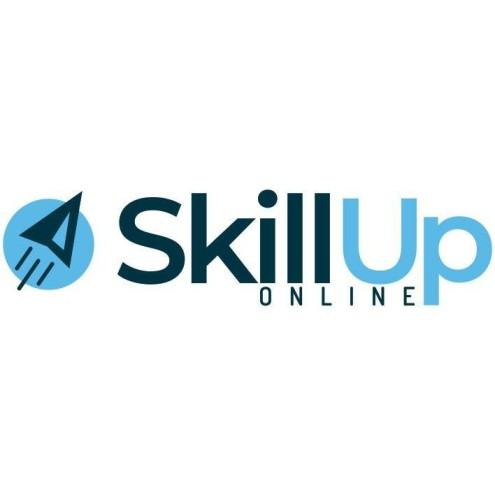

**Alumna:** Erika Samara Alvares Angelim <br>


**Web Personal:** https://www.erikaalvares.es/ <br>


**Github:** https://github.com/ea-analisisdatos/Programa_Inteligencia_Artificial

# **Detección de fraudes con tarjetas de crédito**<a name="detección-de-fraudes-con-tarjetas-de-crédito"></a>


Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Índice<a name="índice"></a>

- [**Detección de fraudes con tarjetas de crédito**](#detección-de-fraudes-con-tarjetas-de-crédito)
- [**Índice**](#índice)
- [**Introducción**](#introducción)
  - [Objetivo del Proyecto](#objetivo-del-proyecto)
  - [Descripción del Problema](#descripción-del-problema)
- [**Metodología**](#metodología)
- [**Configuracion del Ambiente**](#configuracion-del-ambiente)
  - [Instalar las bibliotecas necesarias](#instalar-las-bibliotecas-necesarias)
  - [Importar las bibliotecas necesarias](#importar-las-bibliotecas-necesarias)
  - [Configurar el entorno](#configurar-el-entorno)
  - [Configurar Drive](#configurar-drive)
  - [Importar y organizar el dataset](#importar-y-organizar-el-dataset)
- [**Exploración de Datos**](#exploración-de-datos)
  - [Preguntas de Negocio](#preguntas-de-negocio)
  - [Análisis de los datos](#análisis-de-los-datos)
- [**Visualización Inicial de Datos**](#visualización-inicial-de-datos)
  - [Preguntas de Negocio](#preguntas-de-negocio-1)
- [**Preprocesamiento**](#preprocesamiento)
  - [Limpieza de Datos](#limpieza-de-datos)
    - [Distribución de la variable "Class" antes del proceso de limpieza](#distribución-de-la-variable-class-antes-del-proceso-de-limpieza)
    - [Valores perdidos](#valores-perdidos)
    - [Datos duplicados](#datos-duplicados)
    - [Corrección de Sesgos (Skewness) en Características Numéricas](#corrección-de-sesgos-skewness-en-características-numéricas)
    - [Detección de anomalías (método: Isolation Forest)](#detección-de-anomalías-método-isolation-forest)
    - [Regenerar gráficas con datos limpios](#regenerar-gráficas-con-datos-limpios)
    - [Eliminación de columnas irrelevantes](#eliminación-de-columnas-irrelevantes)
    - [Escalado de Características](#escalado-de-características)
- [**Evaluación Comparativa de Modelos**](#evaluación-comparativa-de-modelos)
  - [Separa el dataset](#separa-el-dataset)
  - [**Técnicas**](#técnicas)
    - [Técnica 1: Entrenamiento sobre el Dataset Original](#técnica-1-entrenamiento-sobre-el-dataset-original)
    - [Técnica 2: Balanceado con SMOTE](#técnica-2-balanceado-con-smote)
    - [Técnica 3: Balanceado con RandomUnderSampler](#técnica-3-balanceado-con-randomundersampler)
    - [Técnica 4: Validación Cruzada de Mejores Modelos (Balanceado con SMOTE)](#técnica-4-validación-cruzada-de-mejores-modelos-balanceado-con-smote)
    - [Técnica 5: Validación Cruzada de Mejores Modelos (dataset original)](#técnica-5-validación-cruzada-de-mejores-modelos-dataset-original)
    - [Técnica 6: Ensembles con SMOTE](#técnica-6-ensembles-con-smote)
    - [Técnica 7: Ensembles con dataset original (clean_data)](#técnica-7-ensembles-con-dataset-original-clean_data)
  - [Tabla Resumen de Resultados](#tabla-resumen-de-resultados)
  - [Evaluar el impacto del tiempo de procesamiento con SMOTE](#evaluar-el-impacto-del-tiempo-de-procesamiento-con-smote)
- [**Mejores Modelos con AUPRC > 80%**](#mejores-modelos-con-auprc--80)
  - [Identificar las Métricas Candidatas al Mejor Modelo](#identificar-las-métricas-candidatas-al-mejor-modelo)
    - [Gráfico de Dispersión (AUPRC vs Recall)](#gráfico-de-dispersión-auprc-vs-recall)
    - [Comparación de Métricas Clave](#comparación-de-métricas-clave)
    - [Tabla Resumen de la Tasa de Falsos Negativos (FNR)](#tabla-resumen-de-la-tasa-de-falsos-negativos-fnr)
    - [Comparación de la Tasa de Falsos Negativos (FNR)](#comparación-de-la-tasa-de-falsos-negativos-fnr)
    - [FNR vs Recall](#fnr-vs-recall)
  - [Resultados y Análisis](#resultados-y-análisis)
- [**Selección de Algoritmos/Modelos para ponerlo en producción**](#selección-de-algoritmosmodelos-para-ponerlo-en-producción)
  - [Función para Entrenamiento, Evaluación y Detección de Sobreajuste (Overfitting)](#función-para-entrenamiento-evaluación-y-detección-de-sobreajuste-overfitting)
    - [Validación Cruzada con cross_val_score (ADASYN)](#validación-cruzada-con-cross_val_score-adasyn)
    - [Validación Cruzada con cross_val_score (con SMOTE)](#validación-cruzada-con-cross_val_score-con-smote)
    - [Validación Cruzada con cross_val_score (SIN SMOTE)](#validación-cruzada-con-cross_val_score-sin-smote)
    - [Optimización de Hiperparámetros con GridSearchCV (con SMOTE)](#optimización-de-hiperparámetros-con-gridsearchcv-con-smote)
    - [Optimización de Hiperparámetros con Optuna (con SMOTE)](#optimización-de-hiperparámetros-con-optuna-con-smote)
  - [Consolidación de las métricas y los hiperparámetros de los modelos](#consolidación-de-las-métricas-y-los-hiperparámetros-de-los-modelos)
  - [Seleccionar el Modelo Ganador](#seleccionar-el-modelo-ganador)
  - [Cargar el Modelo Más Reciente](#cargar-el-modelo-más-reciente)
  - [Realizar Predicciones](#realizar-predicciones)
- [**Informe de Clasificación y Métricas**](#informe-de-clasificación-y-métricas)
- [**Aplicación para probar el modelo con datos nuevos**](#aplicación-para-probar-el-modelo-con-datos-nuevos)
  - [Generar datos simulados en un archivo CSV](#generar-datos-simulados-en-un-archivo-csv)
  - [Predicción interactiva: Importar CSV y predecir nuevos datos](#predicción-interactiva-importar-csv-y-predecir-nuevos-datos)
  - [Visualizaciones](#visualizaciones)
- [**Conclusiones**](#conclusiones)
- [**Código Completo para Generar el PDF Dinámico**](#código-completo-para-generar-el-pdf-dinámico)
- [**Exportar cuaderno a formato HTML y a formato PDF**](#exportar-cuaderno-a-formato-html-y-a-formato-pdf)
  - [Descarga el archivo generado directamente desde Colab](#descarga-el-archivo-generado-directamente-desde-colab)


## **Introducción**<a name="introducción"></a>

**Visión general del proyecto:** El proyecto está diseñado para dotar a los participantes de las habilidades y conocimientos necesarios para
utilizar eficazmente la IA en la detección de actividades fraudulentas en las transacciones con tarjetas de crédito.<br>


### 🎯 **Objetivo del Proyecto**<a name="objetivo-del-proyecto"></a>

1. **Explorar el conjunto de datos**  
   Realizar un análisis exploratorio de datos (EDA) para comprender la estructura del conjunto de datos, identificar las características principales y detectar patrones iniciales en las variables.<br>

2. **Visualizar diferencias entre clases**  
   Generar gráficos comparativos para identificar diferencias clave entre transacciones **fraudulentas** y **no fraudulentas**, enfocándose en distribuciones, valores atípicos y comportamientos específicos.

3. **Corregir el desequilibrio de clases**  
   Aplicar técnicas de balanceo de datos para tratar el marcado **desequilibrio de clases**, asegurando que los modelos puedan aprender de manera efectiva y mejorar su capacidad de detección de fraudes.

4. **Desarrollar un modelo predictivo**  
   Entrenar y evaluar modelos de **Machine Learning** con el objetivo de detectar fraudes en transacciones con **alta precisión**, priorizando un rendimiento robusto.

5. **Minimizar falsos positivos y negativos**  
   Optimizar los modelos para reducir la tasa de **falsos positivos** (detectar fraudes donde no existen) y **falsos negativos** (no detectar fraudes reales), mitigando riesgos y costos asociados.

6. **Seleccionar el mejor modelo**  
   Comparar el desempeño de los modelos utilizando métricas clave como **AUPRC**, **Recall** y **FNR (Tasa de Falsos Negativos)**, para seleccionar el modelo con el mejor equilibrio entre precisión y capacidad de generalización.

7. **Proponer soluciones prácticas**  
   Ofrecer un modelo implementable que permita la **detección automática de fraudes**, contribuyendo a la toma de decisiones informadas y a la reducción de pérdidas económicas.


### **Descripción del Problema**<a name="descripción-del-problema"></a>

En la detección de **fraudes con tarjetas de crédito**, el principal desafío para las compañías es **proteger a los clientes** de cargos no autorizados y **reducir pérdidas económicas** 💸.

📊 **Descripción del Conjunto de Datos**
- Este conjunto de datos incluye transacciones anónimas realizadas en Europa en septiembre de 2013, etiquetadas como fraudulentas o genuinas (No-Fraudulentas).
- Dado que los fraudes representan solo un 0.172% del total de transacciones (492 de 284,807), el conjunto de datos está altamente desbalanceado, lo cual presenta un gran reto para los modelos de detección.

📋 **Características de los Datos**
- Componentes principales (V1, V2, … V28): Transformados usando PCA para preservar la confidencialidad.
- ⏰ **Tiempo (Time):** Segundos transcurridos desde la primera transacción.
- 💵 **Cantidad (Amount):** Monto (importe) de la transacción, útil para aprendizaje sensible al costo.
- 🎯 **Clase (Class):** Variable objetivo, donde 1 indica fraude y 0 indica transacción genuina.

🚀 **Desafíos y Recomendaciones para abordar el problema:**
1. Se recomienda usar métricas especializadas como el Área Bajo la Curva de ***precisión-recuperación (Precision-Recall: AUPRC/AUC-PR)***, ya que la ***precisión de la matriz de confusión*** no es significativa en conjuntos de datos desequilibrados.<br>
La ***métrica UPRC/AUC-PR*** es usada en escenarios como la detección de fraudes. El ***Recall*** es crucial porque queremos minimizar los casos en los que no detectamos un fraude (Falsos Negativos).<br>
Un ***Precision alto*** también es importante para evitar clasificar transacciones legítimas como fraudulentas (Falsos Positivos).<br>

2. Los modelos deben ser capaces de diferenciar eficazmente entre clases minoritarias y mayoritarias, asegurando una detección fiable sin comprometer la precisión en casos de transacciones genuinas.<br>
Este enfoque permite una detección efectiva de fraudes, protegiendo tanto a los consumidores como a las empresas de transacciones no autorizadas.

## **Metodología**<a name="metodología"></a>

Explicación de técnicas, modelos evaluados, y manejo del desbalance.

**Tecnica: Organización y Propósito** <br>

En este proyecto, las etapas de preprocesamiento y entrenamiento se han estructurado en múltiples técnicas para evaluar de manera sistemática cómo diferentes métodos impactan el rendimiento de los modelos en la detección de fraudes. Este enfoque organizado permite comparar de manera objetiva los resultados obtenidos y seleccionar la combinación más efectiva de técnicas y algoritmos de machine learning.

El proceso se desarrolla en varias fases:

1. **Evaluación inicial de técnicas**:
   - Se utilizan diversas técnicas de preprocesamiento, incluyendo balanceo de clases (Oversampling, Undersampling y SMOTE), y modelos.
   - Los resultados obtenidos se analizan para identificar los algoritmos y técnicas que producen el mejor desempeño según métricas clave, como **AUPRC** para datasets desbalanceados.

2. **Selección de los mejores modelos**:
   - Con base en los resultados de las técnicas, se seleccionan los modelos que obtienen los mejores valores en las métricas evaluadas.

3. **Validación Cruzada**:
   - Los modelos seleccionados se someten a una técnica adicional que implementa validación cruzada. Esto asegura que el rendimiento del modelo es consistente y no depende de divisiones específicas de los datos.

4. **Técnicas de Ensemble**:
   - Se aplican métodos avanzados como **VotingClassifier** y **StackingClassifier** para combinar los modelos seleccionados.
   - **VotingClassifier** combina modelos mediante votación (mayoritaria o promedio ponderado), lo que refuerza la robustez del resultado final.
   - **StackingClassifier** utiliza un modelo meta para aprender a partir de las predicciones de los clasificadores base, mejorando la precisión.

5. **Modelo final y serialización**:
   - Al finalizar todas las etapas, se identifica el modelo con el mejor rendimiento global.
   - Este modelo final se serializa en un archivo `.pkl` para su implementación en entornos de producción.

Este enfoque iterativo y estructurado garantiza que el modelo final no solo sea preciso, sino que también generalice bien en la detección de fraudes.


## ⚙️ **Configuración del Ambiente e Importación de Datos**<a name="configuración-del-ambiente-e-importación-de-datos"></a>
En esta sección, se importan las bibliotecas necesarias para trabajar en el proyecto. Configuramos el entorno para visualizar todas las columnas de la tabla sin que la información se corte. También habilitamos el acceso a Google Drive para la lectura del archivo CSV y, finalmente, importamos y organizamos el conjunto de datos.

### ✔️Instalar las bibliotecas necesarias<a name="instalar-las-bibliotecas-necesarias"></a>

In [3]:
%%time
import sys
import subprocess
from importlib.metadata import version, PackageNotFoundError

# Lista de librerías requeridas
required_libraries = [
    'xgboost', 'catboost', 'lightgbm',
    'imbalanced-learn', 'scikit-learn', 'nbconvert',
    'notebook-as-pdf', 'PyPDF2==2.12.1', 'pyppeteer',
    'adjustText', 'mplcursors', 'joblib', 'optuna',
    'weasyprint', 'dask-expr', 'shap', 'nbconvert[webpdf] pyppeteer',
    'playwright'

]

# Lista de dependencias del sistema necesarias para Pandoc y exportación a PDF
system_dependencies = [
    'texlive-xetex', 'texlive-fonts-recommended', 'pandoc'
]

# Función para instalar dependencias del sistema en Google Colab
def install_system_dependencies(dependencies):
    try:
        print(("Instalando dependencias del sistema necesarias para "
        "Pandoc y nbconvert..."))
        subprocess.check_call(['apt-get', 'update'], stdout=subprocess.DEVNULL,
                              stderr=subprocess.DEVNULL)
        subprocess.check_call(['apt-get', 'install', '-y'] + dependencies,
                              stdout=subprocess.DEVNULL,
                              stderr=subprocess.DEVNULL)
        print("Instalación de dependencias del sistema completada.")
    except subprocess.CalledProcessError as e:
        print(f"Error instalando dependencias del sistema: {e}")
        sys.exit("No se pudieron instalar las dependencias del sistema. "\
         "Verifique los permisos o la configuración de su entorno.")


# Función para instalar librerías de Python faltantes
def install_libraries(libraries):
    for lib in libraries:
        try:
            print(f"Instalando {lib}...")
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', lib])
        except Exception as e:
            print(f"Error instalando {lib}: {e}")

# Verificar qué librerías están faltando
missing_libraries = []
for lib in required_libraries:
    try:
        # Verificar si ya está instalada
        version(lib.split('==')[0])  # Separar si hay versión específica
        print(f"{lib} ya está instalado, versión: \
        {version(lib.split('==')[0])}")
    except PackageNotFoundError:
        print(f"{lib} no está instalado.")
        missing_libraries.append(lib)

# Resolver conflictos de versiones para urllib3 si pyppeteer está en la lista
if 'pyppeteer' in missing_libraries or 'pyppeteer' in required_libraries:
    try:
        print("Resolviendo conflictos con urllib3 para pyppeteer...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'uninstall',
                               'urllib3', '-y'])
        subprocess.check_call([sys.executable, '-m', 'pip', 'install',
                               'urllib3<2.0.0'])
        print("Versión de urllib3 ajustada para compatibilidad con pyppeteer.")
    except Exception as e:
        print(f"Error ajustando urllib3: {e}")

# Instalar dependencias del sistema en Google Colab
install_system_dependencies(system_dependencies)

# Instalar librerías faltantes
if missing_libraries:
    install_libraries(missing_libraries)
else:
    print("Todas las librerías requeridas ya están instaladas.")

# Imprimir las versiones de las librerías instaladas
print("\nVersiones de las librerías instaladas:")
for lib in required_libraries:
    try:
        print(f"{lib}: {version(lib.split('==')[0])}")
    except PackageNotFoundError:
        print(f"{lib}: No instalado")

# Verificar todas las librerías instaladas
#print("\nListado completo de librerías instaladas:")
#!pip list


xgboost ya está instalado, versión:         2.1.3
catboost no está instalado.
lightgbm ya está instalado, versión:         4.5.0
imbalanced-learn ya está instalado, versión:         0.12.4
scikit-learn ya está instalado, versión:         1.6.0
nbconvert ya está instalado, versión:         7.16.4
notebook-as-pdf no está instalado.
PyPDF2==2.12.1 no está instalado.
pyppeteer no está instalado.
adjustText no está instalado.
mplcursors no está instalado.
joblib ya está instalado, versión:         1.4.2
optuna no está instalado.
weasyprint no está instalado.
dask-expr no está instalado.
shap ya está instalado, versión:         0.46.0
nbconvert[webpdf] pyppeteer no está instalado.
playwright ya está instalado, versión:         1.49.1
Resolviendo conflictos con urllib3 para pyppeteer...
Versión de urllib3 ajustada para compatibilidad con pyppeteer.
Instalando dependencias del sistema necesarias para Pandoc y nbconvert...
Instalación de dependencias del sistema completada.
Instalando catboost.

### ✔️Importar las bibliotecas necesarias<a name="importar-las-bibliotecas-necesarias"></a>

In [4]:
# Librerías básicas: Manejo de datos, visualización.
import pandas as pd  # Manejo y manipulación de datos tabulares
import numpy as np  # Operaciones numéricas, matrices y arreglos
import matplotlib.pyplot as plt  # Creación de gráficos y visualizaciones
import seaborn as sns  # Visualización de datos estadísticos
from adjustText import adjust_text  # Evitar solapamiento en gráficos
import mplcursors  # Interacción con gráficos (hover)
import os

# Procesamiento de datos: Preprocesamiento y reducción de dimensiones.
from sklearn.preprocessing import RobustScaler  # Escalado robusto para datos con outliers
from sklearn.decomposition import PCA  # Reducción de dimensionalidad
from sklearn.feature_selection import mutual_info_classif  # Selección de características basada en información mutua

# Validación y división de datos: División en train/test y validación cruzada.
from sklearn.model_selection import (
    train_test_split,  # División en conjuntos de entrenamiento y prueba
    StratifiedKFold,  # Validación cruzada estratificada
    cross_val_score,  # Validación cruzada rápida
    GridSearchCV  # Búsqueda de hiperparámetros mediante cuadrícula
)

# Desbalance de clases: Técnicas de SMOTE, undersampling y combinaciones.
from imblearn.over_sampling import SMOTE  # Oversampling de clases minoritarias
from imblearn.combine import SMOTEENN  # Combinación de SMOTE y undersampling
from imblearn.under_sampling import RandomUnderSampler  # Undersampling de clases mayoritarias
from imblearn.pipeline import Pipeline

# Algoritmos: Modelos de Machine Learning.
from sklearn.ensemble import (
    RandomForestClassifier,  # Bosques aleatorios
    IsolationForest,  # Detección de anomalías
    VotingClassifier,  # Ensemble de votación
    StackingClassifier  # Ensemble de apilamiento
)
from sklearn.linear_model import LogisticRegression  # Regresión logística
from catboost import CatBoostClassifier  # CatBoost para clasificación
from xgboost import XGBClassifier  # XGBoost para clasificación
from lightgbm import LGBMClassifier  # LightGBM para clasificación
from sklearn.model_selection import StratifiedKFold

# Métricas de evaluación: Métricas específicas utilizadas en el proyecto.
from sklearn.metrics import (
    accuracy_score,  # Exactitud del modelo
    precision_score,  # Precisión
    recall_score,  # Sensibilidad o Recall
    f1_score,  # F1-Score: equilibrio entre precisión y recall
    roc_auc_score,  # Área bajo la curva ROC
    average_precision_score,  # Área bajo la curva Precision-Recall
    confusion_matrix,  # Matriz de confusión
    ConfusionMatrixDisplay,  # Visualización de la matriz de confusión
    precision_recall_curve,  # Curva Precision-Recall
    roc_curve,  # Curva ROC
    auc,  # Cálculo del área bajo la curva
    classification_report,  # Resumen completo de métricas
    balanced_accuracy_score,  # Precisión balanceada
    matthews_corrcoef  # Correlación de Matthews
)

# Optimización de hiperparámetros: Herramientas para afinar modelos.
import optuna  # Optimización bayesiana de hiperparámetros
from sklearn.model_selection import GridSearchCV  # Búsqueda exhaustiva de hiperparámetros
import joblib  # Serialización y deserialización de modelos entrenados
import shap

# Librerías adicionales: Estadísticas, selección de características, medición de tiempo.
from scipy.stats import shapiro  # Prueba de normalidad
import time  # Evaluar tiempo de procesamiento

# Estilización: Herramientas para mejorar la visualización en consola.
from termcolor import colored as style  # Colorear texto en la salida de la consola
import dask

### ✔️Configurar el entorno<a name="configurar-el-entorno"></a>

In [5]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.8f}'.format
#pd.set_option('display.width', 1000)

# Ajustar el ancho del contenedor de Jupyter/Colab:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


plt.style.use('ggplot')

#plt.style.use('fivethirtyeight')
#plt.rcParams['figure.figsize'] = (10, 6)

### ✔️Configurar Drive<a name="configurar-drive"></a>

In [6]:
%%time
# Montar el drive para obtener el csv
from google.colab import drive

# Monta Google Drive
drive.mount('/content/drive')

# Acceder al archivo CSV proporcionando la ruta correcta desde tu Google Drive
file_path = '/content/drive/MyDrive/Curso_IA_SkillUp_IBM/creditcard.csv'

Mounted at /content/drive
CPU times: user 1.25 s, sys: 205 ms, total: 1.45 s
Wall time: 22.3 s


### ✔️Importar y organiza el dataset<a name="importar-y-organizar-el-dataset"></a>

In [ ]:
# Organizar los datos en un dataframe
data = pd.read_csv(file_path)

In [ ]:
print("Numero de Filas:", data.shape[0])
print("Numero de Columnas", data.shape[1])

Numero de Filas: 284807
Numero de Columnas 31


In [ ]:
# Identificando los nombre de todas las columnas
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Información de los atributos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Muestra las primeras 5 filas del dataframe
print("Muestra las primeras 5 filas del dataframe:")
print(data.head())


Muestra las primeras 5 filas del dataframe:
        Time          V1          V2         V3          V4          V5  \
0 0.00000000 -1.35980713 -0.07278117 2.53634674  1.37815522 -0.33832077   
1 0.00000000  1.19185711  0.26615071 0.16648011  0.44815408  0.06001765   
2 1.00000000 -1.35835406 -1.34016307 1.77320934  0.37977959 -0.50319813   
3 1.00000000 -0.96627171 -0.18522601 1.79299334 -0.86329128 -0.01030888   
4 2.00000000 -1.15823309  0.87773675 1.54871785  0.40303393 -0.40719338   

           V6          V7          V8          V9         V10         V11  \
0  0.46238778  0.23959855  0.09869790  0.36378697  0.09079417 -0.55159953   
1 -0.08236081 -0.07880298  0.08510165 -0.25542513 -0.16697441  1.61272666   
2  1.80049938  0.79146096  0.24767579 -1.51465432  0.20764287  0.62450146   
3  1.24720317  0.23760894  0.37743587 -1.38702406 -0.05495192 -0.22648726   
4  0.09592146  0.59294075 -0.27053268  0.81773931  0.75307443 -0.82284288   

          V12         V13         V14     

In [ ]:
# Muestra las ultimas 5 filas del dataframe
print("Muestra las ultimas 5 filas del dataframe:")
print(data.tail())

Muestra las ultimas 5 filas del dataframe:
                  Time           V1          V2          V3          V4  \
284802 172786.00000000 -11.88111789 10.07178497 -9.83478346 -2.06665568   
284803 172787.00000000  -0.73278867 -0.05508049  2.03502975 -0.73858858   
284804 172788.00000000   1.91956501 -0.30125385 -3.24963981 -0.55782812   
284805 172788.00000000  -0.24044005  0.53048251  0.70251023  0.68979917   
284806 172792.00000000  -0.53341252 -0.18973334  0.70333737 -0.50627124   

                V5          V6          V7          V8         V9         V10  \
284802 -5.36447278 -2.60683733 -4.91821543  7.30533402 1.91442827  4.35617041   
284803  0.86822940  1.05841527  0.02432970  0.29486870 0.58480002 -0.97592606   
284804  2.63051512  3.03126010 -0.29682653  0.70841718 0.43245405 -0.48478176   
284805 -0.37796113  0.62370772 -0.68617999  0.67914546 0.39208671 -0.39912565   
284806 -0.01254568 -0.64961669  1.57700625 -0.41465041 0.48617951 -0.91542665   

               V11 

## 🕵️‍♀️ **Exploración de Datos**<a name="exploración-de-datos"></a>
En esta sección, se realiza un análisis exploratorio de los datos y se contesta algunas preguntas de negocio.

### **Preguntas de Negocio**<a name="preguntas-de-negocio"></a>



🤔 <font color="blue">Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas y no-fraudulentas en el dataset?</font>



In [ ]:
print('El porcentaje de transacciones no-fraudulentas es de',
      round(data['Class'].value_counts()[0]/len(data) * 100,2),
      '% en el dataset')

print('El porcentaje de transacciones fraudulentas es de',
      round(data['Class'].value_counts()[1]/len(data) * 100,2),
      '% en el dataset')

El porcentaje de transacciones no-fraudulentas es de 99.83 % en el dataset
El porcentaje de transacciones fraudulentas es de 0.17 % en el dataset


📊 **Gráfica: Distribución de Montos de Transacciones por Clase**

**Objetivo:**
Este gráfico permite comparar las distribuciones de los montos de transacciones entre clases fraudulentas y no fraudulentas.

**¿Qué debemos observar?**
1. La mediana (línea dentro de cada caja) indica el monto típico para cada clase.
2. El tamaño de la caja muestra la dispersión (rango intercuartílico, IQR) de los montos.
3. Los puntos fuera de la caja son **outliers** (valores atípicos), que son especialmente importantes en fraudes.
4. Si la clase fraudulenta tiene montos significativamente más altos o más dispersos, esto puede ser un patrón clave para la detección de fraudes.




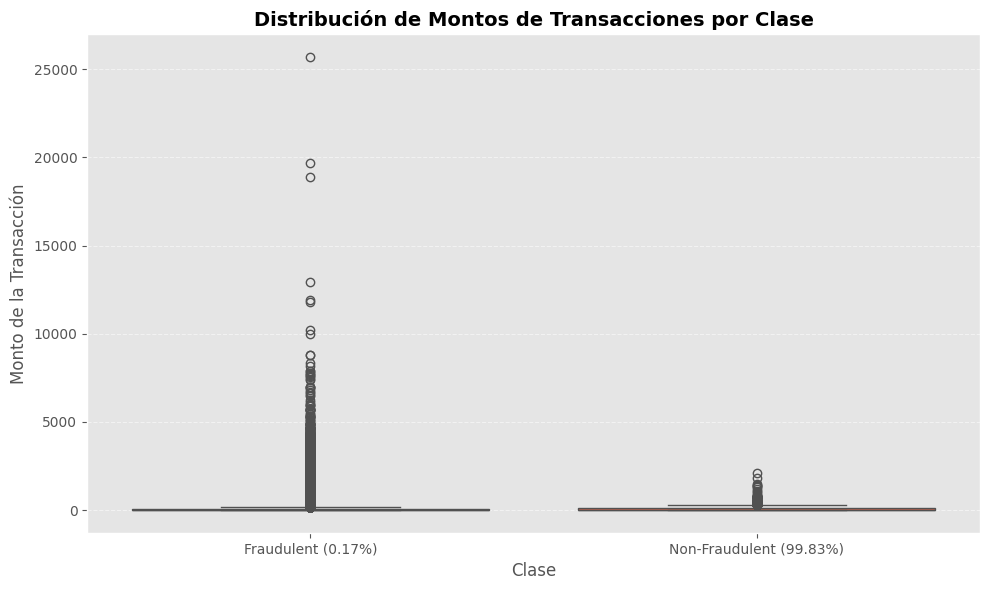


🔍 **Interpretación del Gráfico:**
1. Si la caja de las transacciones fraudulentas es más alta o más dispersa, sugiere que los fraudes tienden a tener montos mayores o más variados.
2. Los **outliers** en la clase fraudulenta son especialmente importantes, ya que representan montos atípicos que podrían ser señales claras de fraude.
3. Compara la posición de la mediana entre ambas clases para identificar diferencias significativas en los montos.


In [ ]:
# Boxplot de Montos de Transacciones por Clase

'''
Esta gráfica complementa bien el análisis y puede servir como entrada para
modelos o reglas de detección de fraudes:

- Permite identificar patrones de comportamiento en los montos de transacciones
fraudulentas.
- Ayuda a entender si los montos fraudulentos son más altos o variables que los
no fraudulentos.
- Proporciona información práctica para definir umbrales de detección de
anomalías.
'''

# Separando los datos para el análisis
fraudulent_data = data[data['Class'] == 1]
non_fraudulent_data = data[data['Class'] == 0]

# Calcular conteos de clases
fraudulent_count = fraudulent_data.shape[0]
non_fraudulent_count = non_fraudulent_data.shape[0]

# Calcular el total de transacciones
total_transactions = fraudulent_count + non_fraudulent_count

# Calcular los porcentajes de transacciones
fraud_percentage = (fraudulent_count / total_transactions) * 100
non_fraud_percentage = (non_fraudulent_count / total_transactions) * 100

# Crear etiquetas con los porcentajes
class_labels = [
    f"Fraudulent ({fraud_percentage:.2f}%)",
    f"Non-Fraudulent ({non_fraud_percentage:.2f}%)"
]

# ---- Texto explicativo inicial ----
print("📊 **Gráfica: Distribución de Montos de Transacciones por Clase**\n")
print("**Objetivo:**")
print("Este gráfico permite comparar las distribuciones de los montos de transacciones entre clases fraudulentas y no fraudulentas.")
print("\n**¿Qué debemos observar?**")
print("1. La mediana (línea dentro de cada caja) indica el monto típico para cada clase.")
print("2. El tamaño de la caja muestra la dispersión (rango intercuartílico, IQR) de los montos.")
print("3. Los puntos fuera de la caja son **outliers** (valores atípicos), que son especialmente importantes en fraudes.")
print("4. Si la clase fraudulenta tiene montos significativamente más altos o más dispersos, esto puede ser un patrón clave para la detección de fraudes.\n\n")

# Crear Boxplot con colores personalizados
plt.figure(figsize=(10, 6))
palette_colors = {'0': '#3498DB', '1': '#FF5733'}  # Colores personalizados para clases
sns.boxplot(x='Class', y='Amount', data=data, palette=palette_colors)

# Configuraciones del gráfico
plt.title("Distribución de Montos de Transacciones por Clase", fontsize=14, fontweight='bold')
plt.xlabel("Clase", fontsize=12)
plt.ylabel("Monto de la Transacción", fontsize=12)
plt.xticks([0, 1], class_labels)  # Reemplazar etiquetas con porcentajes
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# ---- Texto explicativo final ----
print("\n🔍 **Interpretación del Gráfico:**")
print("1. Si la caja de las transacciones fraudulentas es más alta o más dispersa, sugiere que los fraudes tienden a tener montos mayores o más variados.")
print("2. Los **outliers** en la clase fraudulenta son especialmente importantes, ya que representan montos atípicos que podrían ser señales claras de fraude.")
print("3. Compara la posición de la mediana entre ambas clases para identificar diferencias significativas en los montos.")


<blockquote>

---
  <b>👁️ *Observación:*</b><br>
  
- **Clases desbalanceadas:**<br>
  - *Se obseva un gran desbalance entre las clases. El porcentaje de transacciones fraudulentas representa apenas un 0.17% de todo el dataset. Mas adelante en el proyecto se analizará técnicas como sobremuestreo o submuestreo.* <br><br>

 ---

</blockquote>

🤔 <font color="blue">Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas y no-fraudulentas?</font>



In [ ]:
# Separando los datos para el análisis
fraudulent_data = data[data['Class'] == 1]
non_fraudulent_data = data[data['Class'] == 0]

# Calcula el importe medio de las transacciones fraudulentas
average_amount_fraudulent = fraudulent_data['Amount'].mean()

# Calcula el importe medio de las transacciones no-fraudulentas
average_amount_non_fraudulent = non_fraudulent_data['Amount'].mean()

print(f"El importe medio de las transacciones fraudulentas es: ",
round(average_amount_fraudulent,2))

print(f"El importe medio de las transacciones no-fraudulentas (legítimas) es: ",
round(average_amount_non_fraudulent,2))

El importe medio de las transacciones fraudulentas es:  122.21
El importe medio de las transacciones no-fraudulentas (legítimas) es:  88.29


<blockquote>

---
  <b>👁️ *Observación:*</b><br>
  
- **Importe medio de las transaciones:**<br>
  *Se observa que el importe medio de las transacciones fraudulentas es significativamente mayor en comparación con las transacciones no fraudulentas, lo cual puede servir como referencia para establecer umbrales en la detección de anomalías.* <br><br>
---  

</blockquote>

### **Análisis de los datos**<a name="análisis-de-los-datos"></a>

Resumen de las características del dataset.

In [ ]:
# Montos que mas se repiten en las transacciones fraudulentas
#fraudulent_data['Amount'].value_counts()

# Montos (>1) que más se repiten en las transacciones fraudulentas (2 decimales y
#ordenados)
fraudulent_data['Amount'] = fraudulent_data['Amount'].round(2)  # Redondear a 2 decimales

amount_counts = (
    fraudulent_data['Amount']
    .value_counts()
    .sort_values(ascending=False)
)  # Contar y ordenar

# Filtrar solo montos que se repiten más de una vez
repeated_amounts = amount_counts[amount_counts > 1].sort_values(ascending=False)

# Mostrar los resultados con formato de dos decimales
print("Montos (>1) que más se repiten en las transacciones fraudulentas:")
for amount, count in repeated_amounts.items():
    print(f"{amount:.2f}: {count}")


Montos (>1) que más se repiten en las transacciones fraudulentas:
1.00: 113
0.00: 27
99.99: 27
0.76: 17
0.77: 10
0.01: 5
2.00: 4
3.79: 4
1.10: 3
12.31: 3
2.28: 3
1.18: 3
0.68: 3
39.45: 2
30.31: 2
44.90: 2
94.82: 2
1.59: 2
1.63: 2
105.89: 2
101.50: 2
88.23: 2
45.51: 2
104.03: 2
19.02: 2
1.52: 2
78.00: 2
316.06: 2
7.59: 2
8.00: 2
18.96: 2
512.25: 2
0.83: 2
252.92: 2
723.21: 2
188.52: 2
111.70: 2


In [ ]:
# Conteo de transacciones con Amount=0 por clase
amount_zero_fraud = fraudulent_data[fraudulent_data['Amount'] == 0].shape[0]
amount_zero_nonfraud = data[(data['Class'] == 0) & \
                      (data['Amount'] == 0)].shape[0]

# Porcentajes relativos
print("Transacciones fraudulentas con Amount=0:", amount_zero_fraud)
print("Transacciones no fraudulentas con Amount=0:", amount_zero_nonfraud)
print("Porcentaje en fraudulentas:", \
                      (amount_zero_fraud / len(fraudulent_data)) * 100, "%")

print("Porcentaje en no fraudulentas:", \
 (amount_zero_nonfraud / len(data[data['Class'] == 0])) * 100, "%")


Transacciones fraudulentas con Amount=0: 27
Transacciones no fraudulentas con Amount=0: 1798
Porcentaje en fraudulentas: 5.487804878048781 %
Porcentaje en no fraudulentas: 0.6323971651161564 %


<blockquote>

---
  <b>👁️ *Observación:*</b><br>
  
- **Mantener las transacciones con Amount = 0:**<br>
  - *Aunque hay menos transacciones fraudulentas con Amount = 0 en términos absolutos, la proporción más alta dentro de las transacciones fraudulentas hace que sea relevante mantener estos datos en el análisis.*<br>

  - *Podrían representar un patrón importante, como intentos de fraude con transacciones pequeñas o pruebas de tarjeta.* <br><br>

---

</blockquote>

In [ ]:
# Verificando el estadístico de la variable monto para transacciones
# fraudulenas
fraudulent_data[['Amount']].describe()

Amount
count  492.00000000
mean   122.21132114
std    256.68328830
min      0.00000000
25%      1.00000000
50%      9.25000000
75%    105.89000000
max   2125.87000000

In [ ]:
# Verificando el estadístico de la variable monto para transacciones legítimas
# (No-Fraudulentas)
non_fraudulent_data[['Amount']].describe()

Amount
count 284315.00000000
mean      88.29102242
std      250.10509223
min        0.00000000
25%        5.65000000
50%       22.00000000
75%       77.05000000
max    25691.16000000

In [ ]:
# Estadísticas descriptivas del dataset
print(data.describe().T)

                 count           mean            std           min  \
Time   284807.00000000 94813.85957508 47488.14595457    0.00000000   
V1     284807.00000000     0.00000000     1.95869580  -56.40750963   
V2     284807.00000000     0.00000000     1.65130858  -72.71572756   
V3     284807.00000000    -0.00000000     1.51625501  -48.32558936   
V4     284807.00000000     0.00000000     1.41586857   -5.68317120   
V5     284807.00000000     0.00000000     1.38024673 -113.74330671   
V6     284807.00000000     0.00000000     1.33227109  -26.16050594   
V7     284807.00000000    -0.00000000     1.23709360  -43.55724157   
V8     284807.00000000     0.00000000     1.19435290  -73.21671846   
V9     284807.00000000    -0.00000000     1.09863209  -13.43406632   
V10    284807.00000000     0.00000000     1.08884977  -24.58826244   
V11    284807.00000000     0.00000000     1.02071303   -4.79747346   
V12    284807.00000000    -0.00000000     0.99920139  -18.68371463   
V13    284807.000000

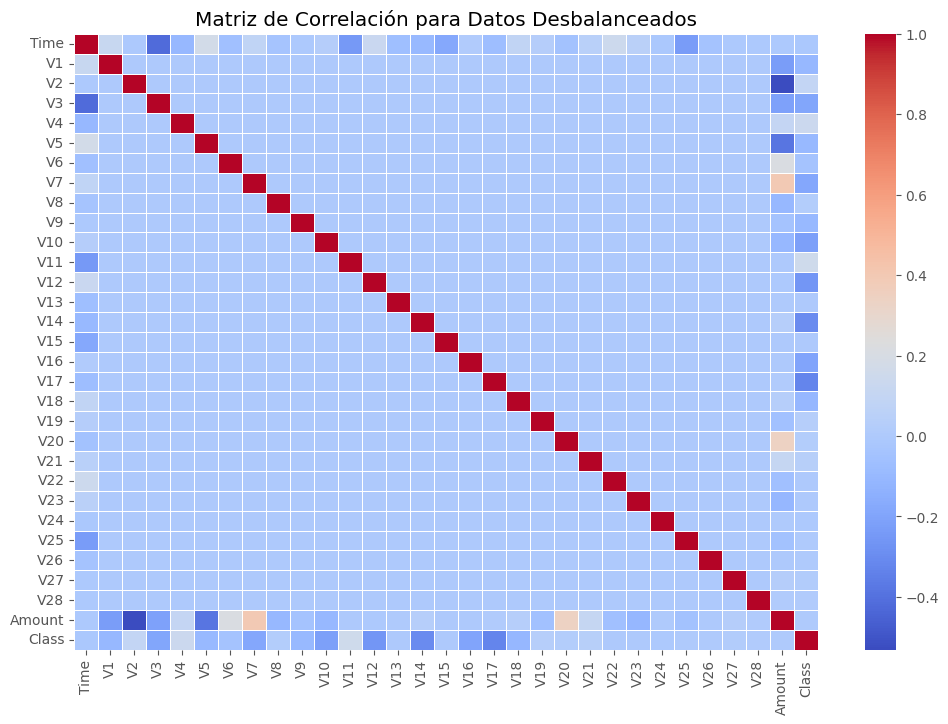

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Oculta los valores redundantes de la matriz de correlación, mostrando solo la
# mitad inferior.
#mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            #mask=mask,
            annot=False,
            cmap='coolwarm',
            linewidths=0.5,
            fmt='.2f')
plt.title("Matriz de Correlación para Datos Desbalanceados")
plt.show()


**Matriz de Correlación - Clase Fraudulenta (Class = 1)**

- Analizamos si hay correlación entre las variables solamente para las clases fraudulentas.

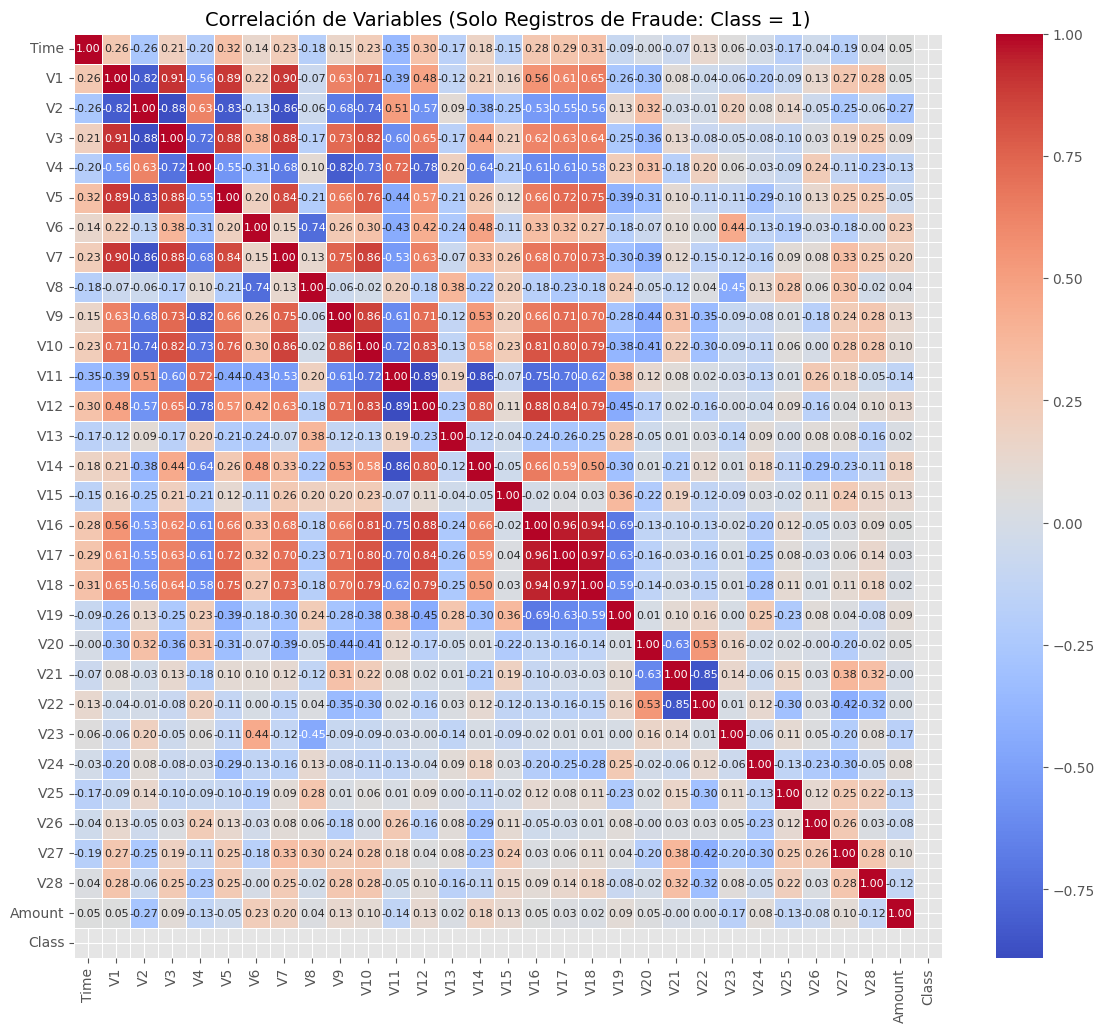

In [ ]:
# ================================
# Filtrar solo los registros de fraude (Class = 1)
# ================================
fraudulent_data = data[data['Class'] == 1]

# ================================
# Calcular la matriz de correlación solo para registros de fraude
# ================================
correlation_matrix  = fraudulent_data.corr()

# ================================
# Crear un heatmap con valores legibles
# ================================
plt.figure(figsize=(14, 12))  # Ajustar tamaño del gráfico
sns.heatmap(
    correlation_matrix, # Matriz de correlación filtrada
    annot=True,         # Mostrar valores numéricos en las celdas
    fmt=".2f",          # Formato para mostrar solo 2 decimales
    #cmap='YlGnBu',      # Paleta de colores amarillo-verde-azul
    cmap='coolwarm',    # Paleta de colores azul-rojo
    cbar=True,          # Mostrar la barra de colores
    linewidths=0.5,     # Separación entre celdas
    annot_kws={"size": 8}  # Reducir tamaño del texto de anotaciones
)

# ================================
# Personalización del gráfico
# ================================
plt.title("Correlación de Variables (Solo Registros de Fraude: Class = 1)", fontsize=14)
#plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=90, ha='center')  # Rotar etiquetas del eje X a 90°
plt.yticks(rotation=0)                # Etiquetas del eje Y horizontales

plt.show()


**Identificar pares de variables con alta correlación (umbral > 0.7 o < -0.7)**

In [ ]:
# Filtrar pares con alta correlación (umbral > 0.7 o < -0.7)
correlated_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_correlation_pairs = correlated_pairs[(correlated_pairs > 0.7) & (correlated_pairs < 1.0)]

print(high_correlation_pairs)


V17  V18   0.97149216
V18  V17   0.97149216
V17  V16   0.96015330
V16  V17   0.96015330
V18  V16   0.94449768
V16  V18   0.94449768
V1   V3    0.90787501
V3   V1    0.90787501
V1   V7    0.89760878
V7   V1    0.89760878
V1   V5    0.89496833
V5   V1    0.89496833
V12  V11   0.88971960
V11  V12   0.88971960
V3   V5    0.88368938
V5   V3    0.88368938
V3   V7    0.88231242
V7   V3    0.88231242
V12  V16   0.88170346
V16  V12   0.88170346
V3   V2    0.87690369
V2   V3    0.87690369
V9   V10   0.86396596
V10  V9    0.86396596
V7   V2    0.86298308
V2   V7    0.86298308
V11  V14   0.86204427
V14  V11   0.86204427
V10  V7    0.85982293
V7   V10   0.85982293
V21  V22   0.85211151
V22  V21   0.85211151
V12  V17   0.84279621
V17  V12   0.84279621
V7   V5    0.83973777
V5   V7    0.83973777
V10  V12   0.83433069
V12  V10   0.83433069
V2   V5    0.82839063
V5   V2    0.82839063
V2   V1    0.81922580
V1   V2    0.81922580
V4   V9    0.81885318
V9   V4    0.81885318
V10  V3    0.81824320
V3   V10  

<blockquote>

---
  <b>👁️ *Observación:*</b><br>
  
**Filtrar pares con alta correlación (umbral > 0.7 o < -0.7):**<br>

El umbral de correlación **> 0.7** o **< -0.7** es un valor comúnmente utilizado en análisis estadístico y machine learning porque:<br>

***Correlación alta***<br>
- Un valor mayor que **0.7** o menor que **-0.7** indica una **relación lineal fuerte** entre las variables.
- Esto puede implicar **redundancia** o **multicolinealidad** en un modelo.
- Las relaciones lineales fuertes pueden afectar negativamente el rendimiento de ciertos modelos, como:
  - **Regresión lineal**
  - Modelos basados en **distancia** (ej., **KNN**).

---

</blockquote>

**VIF (Variance Inflation Factor)**

VIF mide la multicolinealidad entre las características. Si dos variables están altamente correlacionadas, una de ellas puede ser eliminada.

- VIF > 10: Alta multicolinealidad → Eliminar o combinar la variable.
- VIF entre 5-10: Requiere análisis adicional.
- VIF < 5: Multicolinealidad aceptable.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleccionar las columnas no transformadas
X_vif = fraudulent_data[['Time', 'Amount']]

# Calcular VIF para cada característica
vif = pd.DataFrame()
vif['Feature'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("VIF por característica:")
print(vif)


VIF por característica:
  Feature        VIF
0    Time 1.18228779
1  Amount 1.18228779


**Importancia de características usando correlación sobre el datase "data"**<br>

Verificamos si hay correlación absoluta con la variable objetivo antes de realizar la limpieza de los datos.

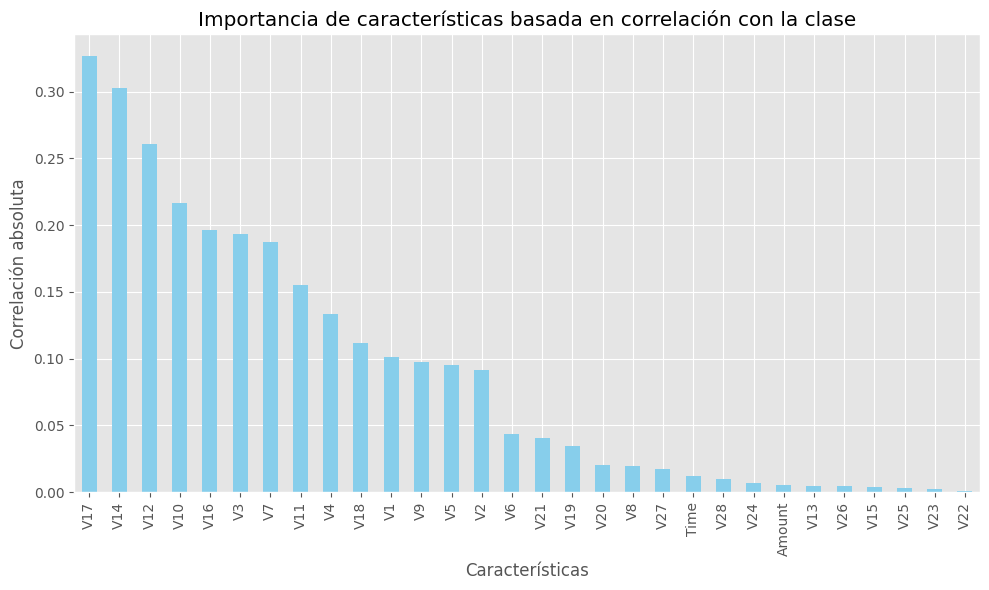

CPU times: user 952 ms, sys: 71.3 ms, total: 1.02 s
Wall time: 2 s


In [ ]:
# Correlación: Cuando tienes datos numéricos y buscas una relación lineal.
%%time

# Calcular la correlación absoluta con la variable objetivo
correlations = data.drop(columns='Class').corrwith(data['Class']).abs()

# Ordenar características por correlación
correlations = correlations.sort_values(ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Importancia de características basada en correlación con la clase')
plt.xlabel('Características')
plt.ylabel('Correlación absoluta')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## 📊 **Visualización Inicial de Datos**<a name="visualización-inicial-de-datos"></a>
En esta sección hacemos una exploración visual de los datos en busca de patrones y problemas que deben ser corregidos antes de trabajar con los modelos.

### **Preguntas de Negocio**<a name="preguntas-de-negocio-1"></a>

Histogramas y gráficas de correlación relevantes para entender la distribución de los datos.

**🤔 <font color="blue">Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)</font>**

In [ ]:
print('Cantidad Transacciones no-fraudulentas (0):',
                                          non_fraudulent_data.shape[0])

print('Cantidad Transacciones fraudulentas (1):', fraudulent_data.shape[0])

Cantidad Transacciones no-fraudulentas (0): 284315
Cantidad Transacciones fraudulentas (1): 492


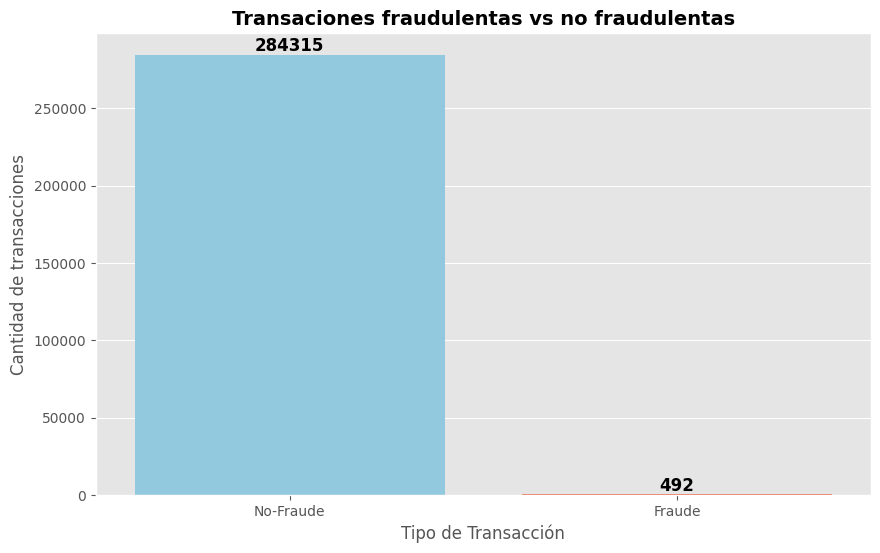

In [ ]:
# Muestra la distribución de las transacciones fraudulentas con respecto de las
# no fraudulentas

#colors = ["blue", "red"]
colors = ["#87CEEB", "#FF6347"]

# Configurar la visualización en una fila
fig, axes = plt.subplots(1, figsize=(10, 6))

# Función para agregar etiquetas dentro de las barras
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2,
                                               p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black',
                    weight='bold')

# Cuenta las veces que ocurre cada clase (0: no fraude, 1: fraude)
ax1 = sns.countplot(x='Class', data=data, palette=colors)
ax1.set_title('Transaciones fraudulentas vs no fraudulentas', fontsize=14,
              fontweight='bold')

ax1.set_xlabel("Tipo de Transacción")
ax1.set_ylabel("Cantidad de transacciones")
add_labels(ax1)

plt.xticks([0, 1], ['No-Fraude', 'Fraude'])
plt.show()

**🤔 <font color="blue">Pregunta 2: ¿Cuál es la distribución de los importes y tiempos de las transacciones Fraudelentas y No-Fraudulentas? ¿Siguen una distribución normal?</font>**


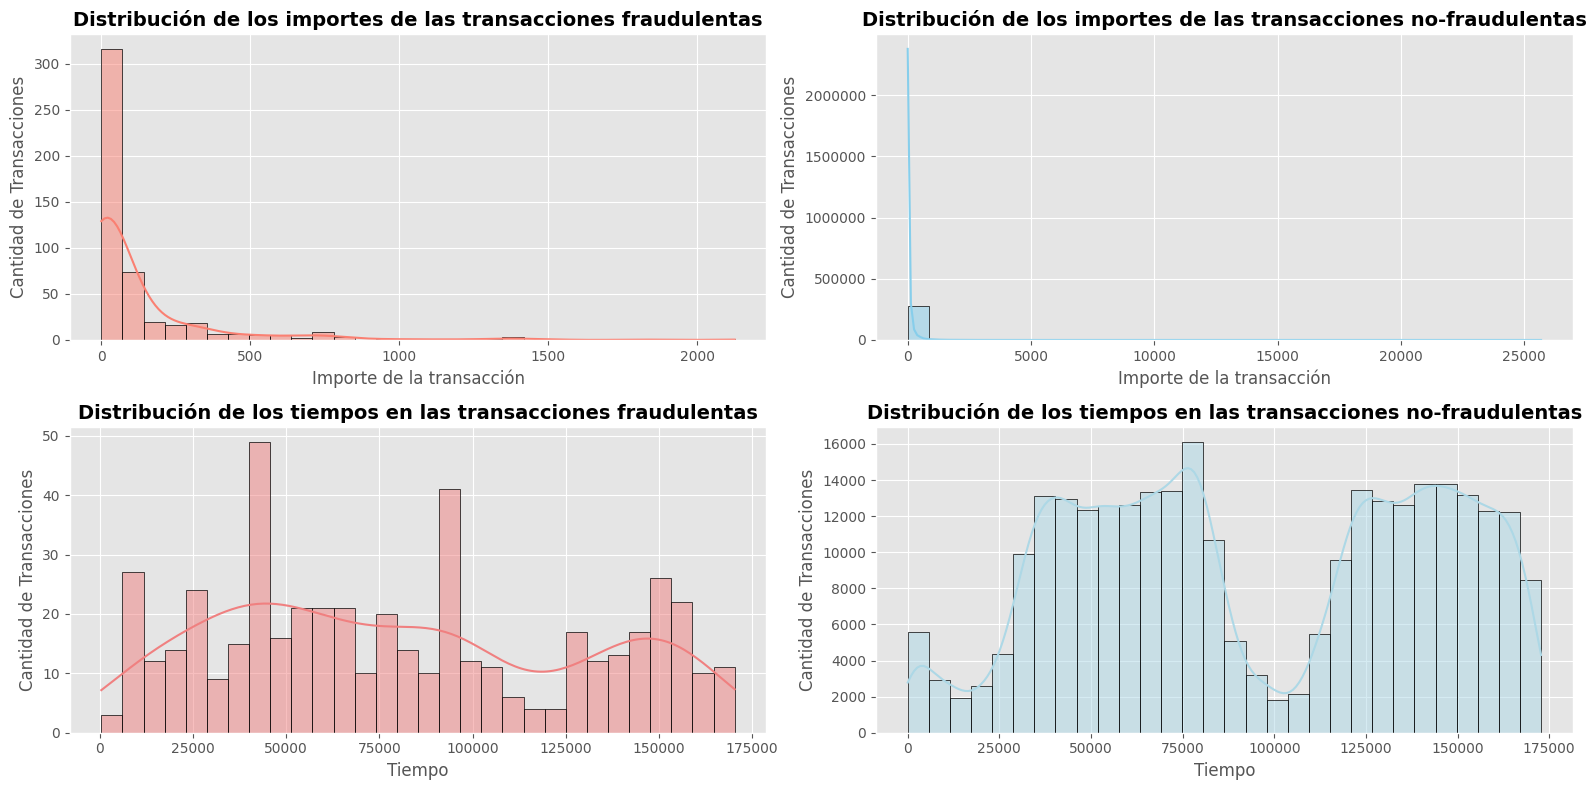

In [ ]:
# 1. Histogramas y KDE Plots

# Configurar el tamaño de la figura con subplots en una cuadrícula de 2x2
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

# Histograma y curva de densidad para Amount en transacciones fraudulentas
sns.histplot(fraudulent_data['Amount'], bins=30, edgecolor='black',
             color='salmon', kde=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('Importe de la transacción')
axs[0, 0].set_ylabel('Cantidad de Transacciones')
axs[0, 0].set_title('Distribución de los importes de las transacciones \
fraudulentas', fontsize=14, fontweight='bold')

# Histograma y curva de densidad para Amount en transacciones no fraudulentas
sns.histplot(non_fraudulent_data['Amount'], bins=30, edgecolor='black',
             color='skyblue', kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('Importe de la transacción')
axs[0, 1].set_ylabel('Cantidad de Transacciones')
axs[0, 1].set_title('Distribución de los importes de las transacciones \
no-fraudulentas', fontsize=14, fontweight='bold')

# Evitar notación científica en el eje y
axs[0, 1].ticklabel_format(style='plain', axis='y')

# Histograma y curva de densidad para Time en transacciones fraudulentas
sns.histplot(fraudulent_data['Time'], bins=30, edgecolor='black',
             color='lightcoral', kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('Tiempo')
axs[1, 0].set_ylabel('Cantidad de Transacciones')
axs[1, 0].set_title('Distribución de los tiempos en las transacciones \
fraudulentas', fontsize=14, fontweight='bold')

# Histograma y curva de densidad para Time en transacciones no fraudulentas
sns.histplot(non_fraudulent_data['Time'], bins=30, edgecolor='black',
             color='lightblue', kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('Tiempo')
axs[1, 1].set_ylabel('Cantidad de Transacciones')
axs[1, 1].set_title('Distribución de los tiempos en las transacciones \
no-fraudulentas', fontsize=14, fontweight='bold')

# Ajustar la presentación para que las gráficas no se solapen
plt.tight_layout()
plt.show()


<blockquote>

---

  <b>👁️ *Observación:*</b><br>
  Los histogramas presentan la distribución de las variables Amount y Time tanto para transacciones fraudulentas como para no fraudulentas.<br>
- **Amount:**<br>
  - *Las transacciones fraudulentas y no-fraudulentas suelen tener montos bajos, aunque la cantidad de transacciones no-fraudulentas es significativamente mayor. Esta diferencia en la frecuencia puede ser un factor clave al momento de construir un modelo de detección de fraudes.*<br>

- **Time:**<br>
  - *Los fraudes no parecen concentrarse en horarios específicos, mientras que las transacciones no-fraudulentas muestran patrones temporales más definidos.* <br><br>
  
  *Este análisis sugiere que para detectar fraudes, los montos bajos deben ser considerados con atención. Además, la variable **Time** podría tener un menor impacto en la detección de fraudes, ya que no presenta un patrón claro para distinguir entre transacciones fraudulentas y no fraudulentas.*

  ---

</blockquote>

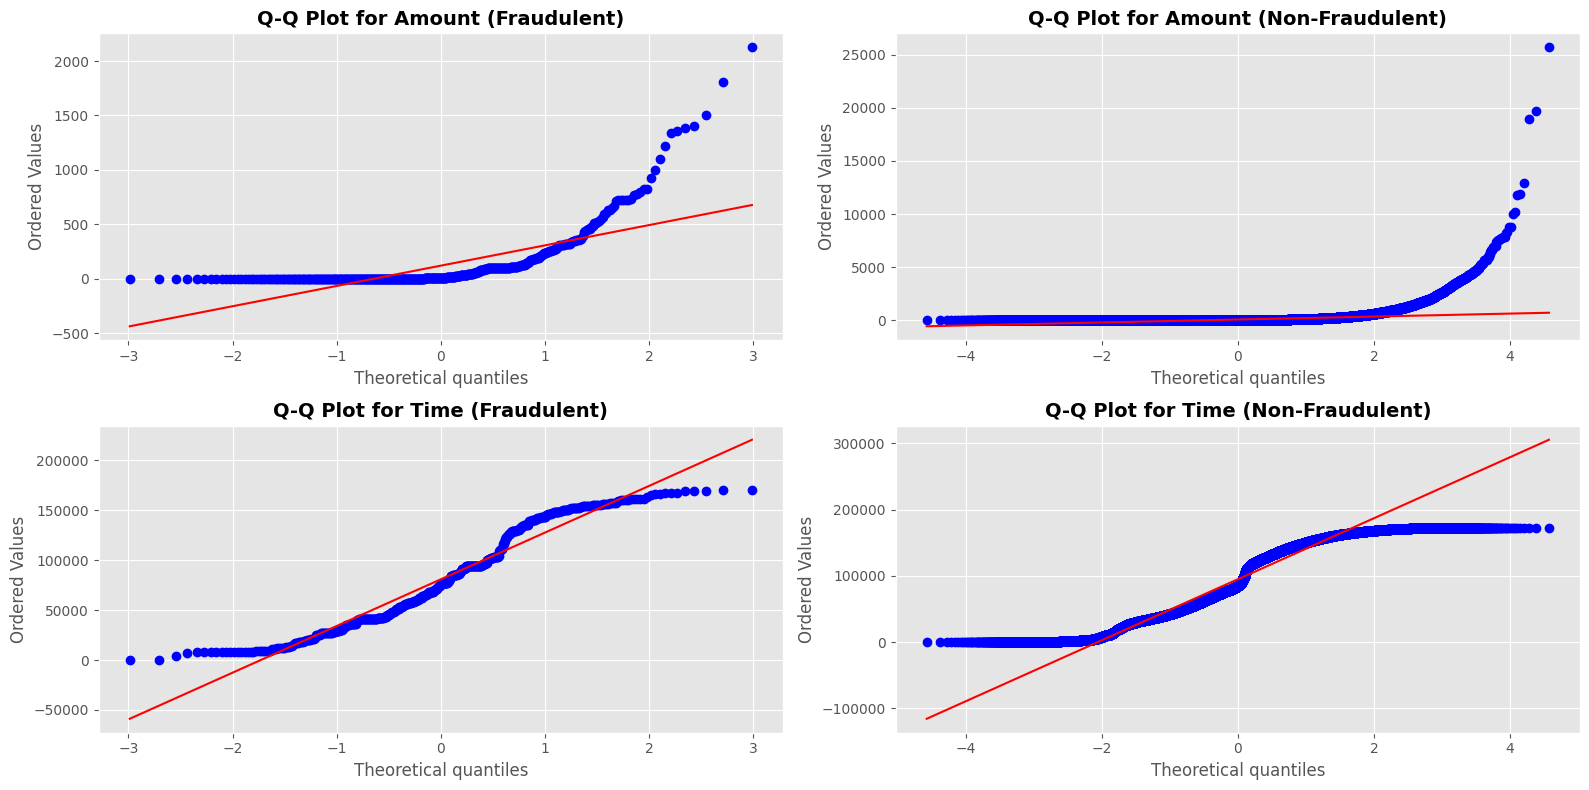

In [ ]:
# 2. Gráfico Q-Q (Quantile-Quantile Plot)
import scipy.stats as stats

# Configurar la figura con subplots en una cuadrícula de 2x2
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

# Q-Q Plot para Amount en transacciones fraudulentas
stats.probplot(fraudulent_data['Amount'], dist="norm", plot=axs[0, 0])
axs[0, 0].set_title("Q-Q Plot for Amount (Fraudulent)", fontsize=14,
                    fontweight='bold')

# Q-Q Plot para Amount en transacciones no fraudulentas
stats.probplot(non_fraudulent_data['Amount'], dist="norm", plot=axs[0, 1])
axs[0, 1].set_title("Q-Q Plot for Amount (Non-Fraudulent)", fontsize=14,
                    fontweight='bold')

# Q-Q Plot para Time en transacciones fraudulentas
stats.probplot(fraudulent_data['Time'], dist="norm", plot=axs[1, 0])
axs[1, 0].set_title("Q-Q Plot for Time (Fraudulent)", fontsize=14,
                    fontweight='bold')

# Q-Q Plot para Time en transacciones no fraudulentas
stats.probplot(non_fraudulent_data['Time'], dist="norm", plot=axs[1, 1])
axs[1, 1].set_title("Q-Q Plot for Time (Non-Fraudulent)", fontsize=14,
                    fontweight='bold')

# Ajuste para que las gráficas no se solapen
plt.tight_layout()
plt.show()

<blockquote>

---
  <b>👁️ *Observación:*</b><br>
  Estas gráficas sugieren que tanto Amount como Time **no siguen** una distribución normal, lo cual es importante al seleccionar métodos de análisis y modelos de machine learning que asuman normalidad..<br>
  
- **Amount:**<br>
  - *Amount no sigue una distribución normal en ninguno de los dos casos (fraudulento y no-fraudulento). Esto es esperado en transacciones monetarias, ya que las cantidades suelen estar sesgadas hacia valores bajos, con algunas transacciones en valores altos que representan eventos raros.*<br>

- **Time:**<br>
  - *Time muestra un ajuste más cercano a una distribución normal en el centro, pero se desvía en las colas. Esto puede ser suficiente para ciertos modelos que no requieren una distribución estrictamente normal, pero debes considerar esta información si planeas aplicar técnicas estadísticas que dependen de la normalidad.* <br>
---

</blockquote>

In [ ]:
# 3. Pruebas Estadísticas (Shapiro-Wilk o Kolmogorov-Smirnov)

# Nivel de significancia
alpha = 0.05

# Prueba de Shapiro-Wilk para Amount en transacciones fraudulentas
stat, p_value = shapiro(fraudulent_data['Amount'])
print("Amount (Fraudulent) - Estadístico:", stat, ", p-value:", p_value)
if p_value > alpha:
    print("Amount (Fraudulent) sigue una distribución normal.")
else:
    print("Amount (Fraudulent) no sigue una distribución normal.")

# Prueba de Shapiro-Wilk para Amount en transacciones no fraudulentas
stat, p_value = shapiro(non_fraudulent_data['Amount'])
print("Amount (Non-Fraudulent) - Estadístico:", stat, ", p-value:", p_value)
if p_value > alpha:
    print("Amount (Non-Fraudulent) sigue una distribución normal.")
else:
    print('Amount (Non-Fraudulent) no sigue una distribución normal. \n')

# Prueba de Shapiro-Wilk para Time en transacciones fraudulentas
stat, p_value = shapiro(fraudulent_data['Time'])
print("Time (Fraudulent) - Estadístico:", stat, ", p-value:", p_value)
if p_value > alpha:
    print("Time (Fraudulent) sigue una distribución normal.")
else:
    print("Time (Fraudulent) no sigue una distribución normal.")

# Prueba de Shapiro-Wilk para Time en transacciones no fraudulentas
stat, p_value = shapiro(non_fraudulent_data['Time'])
print("Time (Non-Fraudulent) - Estadístico:", stat, ", p-value:", p_value)
if p_value > alpha:
    print("Time (Non-Fraudulent) sigue una distribución normal.")
else:
    print("Time (Non-Fraudulent) no sigue una distribución normal.")


Amount (Fraudulent) - Estadístico: 0.5253348984091436 , p-value: 2.8247332909327927e-34
Amount (Fraudulent) no sigue una distribución normal.
Amount (Non-Fraudulent) - Estadístico: 0.30965871086088315 , p-value: 6.851464669833563e-199
Amount (Non-Fraudulent) no sigue una distribución normal. 

Time (Fraudulent) - Estadístico: 0.9426319474778967 , p-value: 7.454733029562764e-13
Time (Fraudulent) no sigue una distribución normal.
Time (Non-Fraudulent) - Estadístico: 0.9400034429247126 , p-value: 7.379668277117668e-119
Time (Non-Fraudulent) no sigue una distribución normal.


**🤔 <font color="blue">Pregunta 3: "¿Existen datos atípicos en el dataset? ¿Cómo están distribuidos estos valores?"</font>**

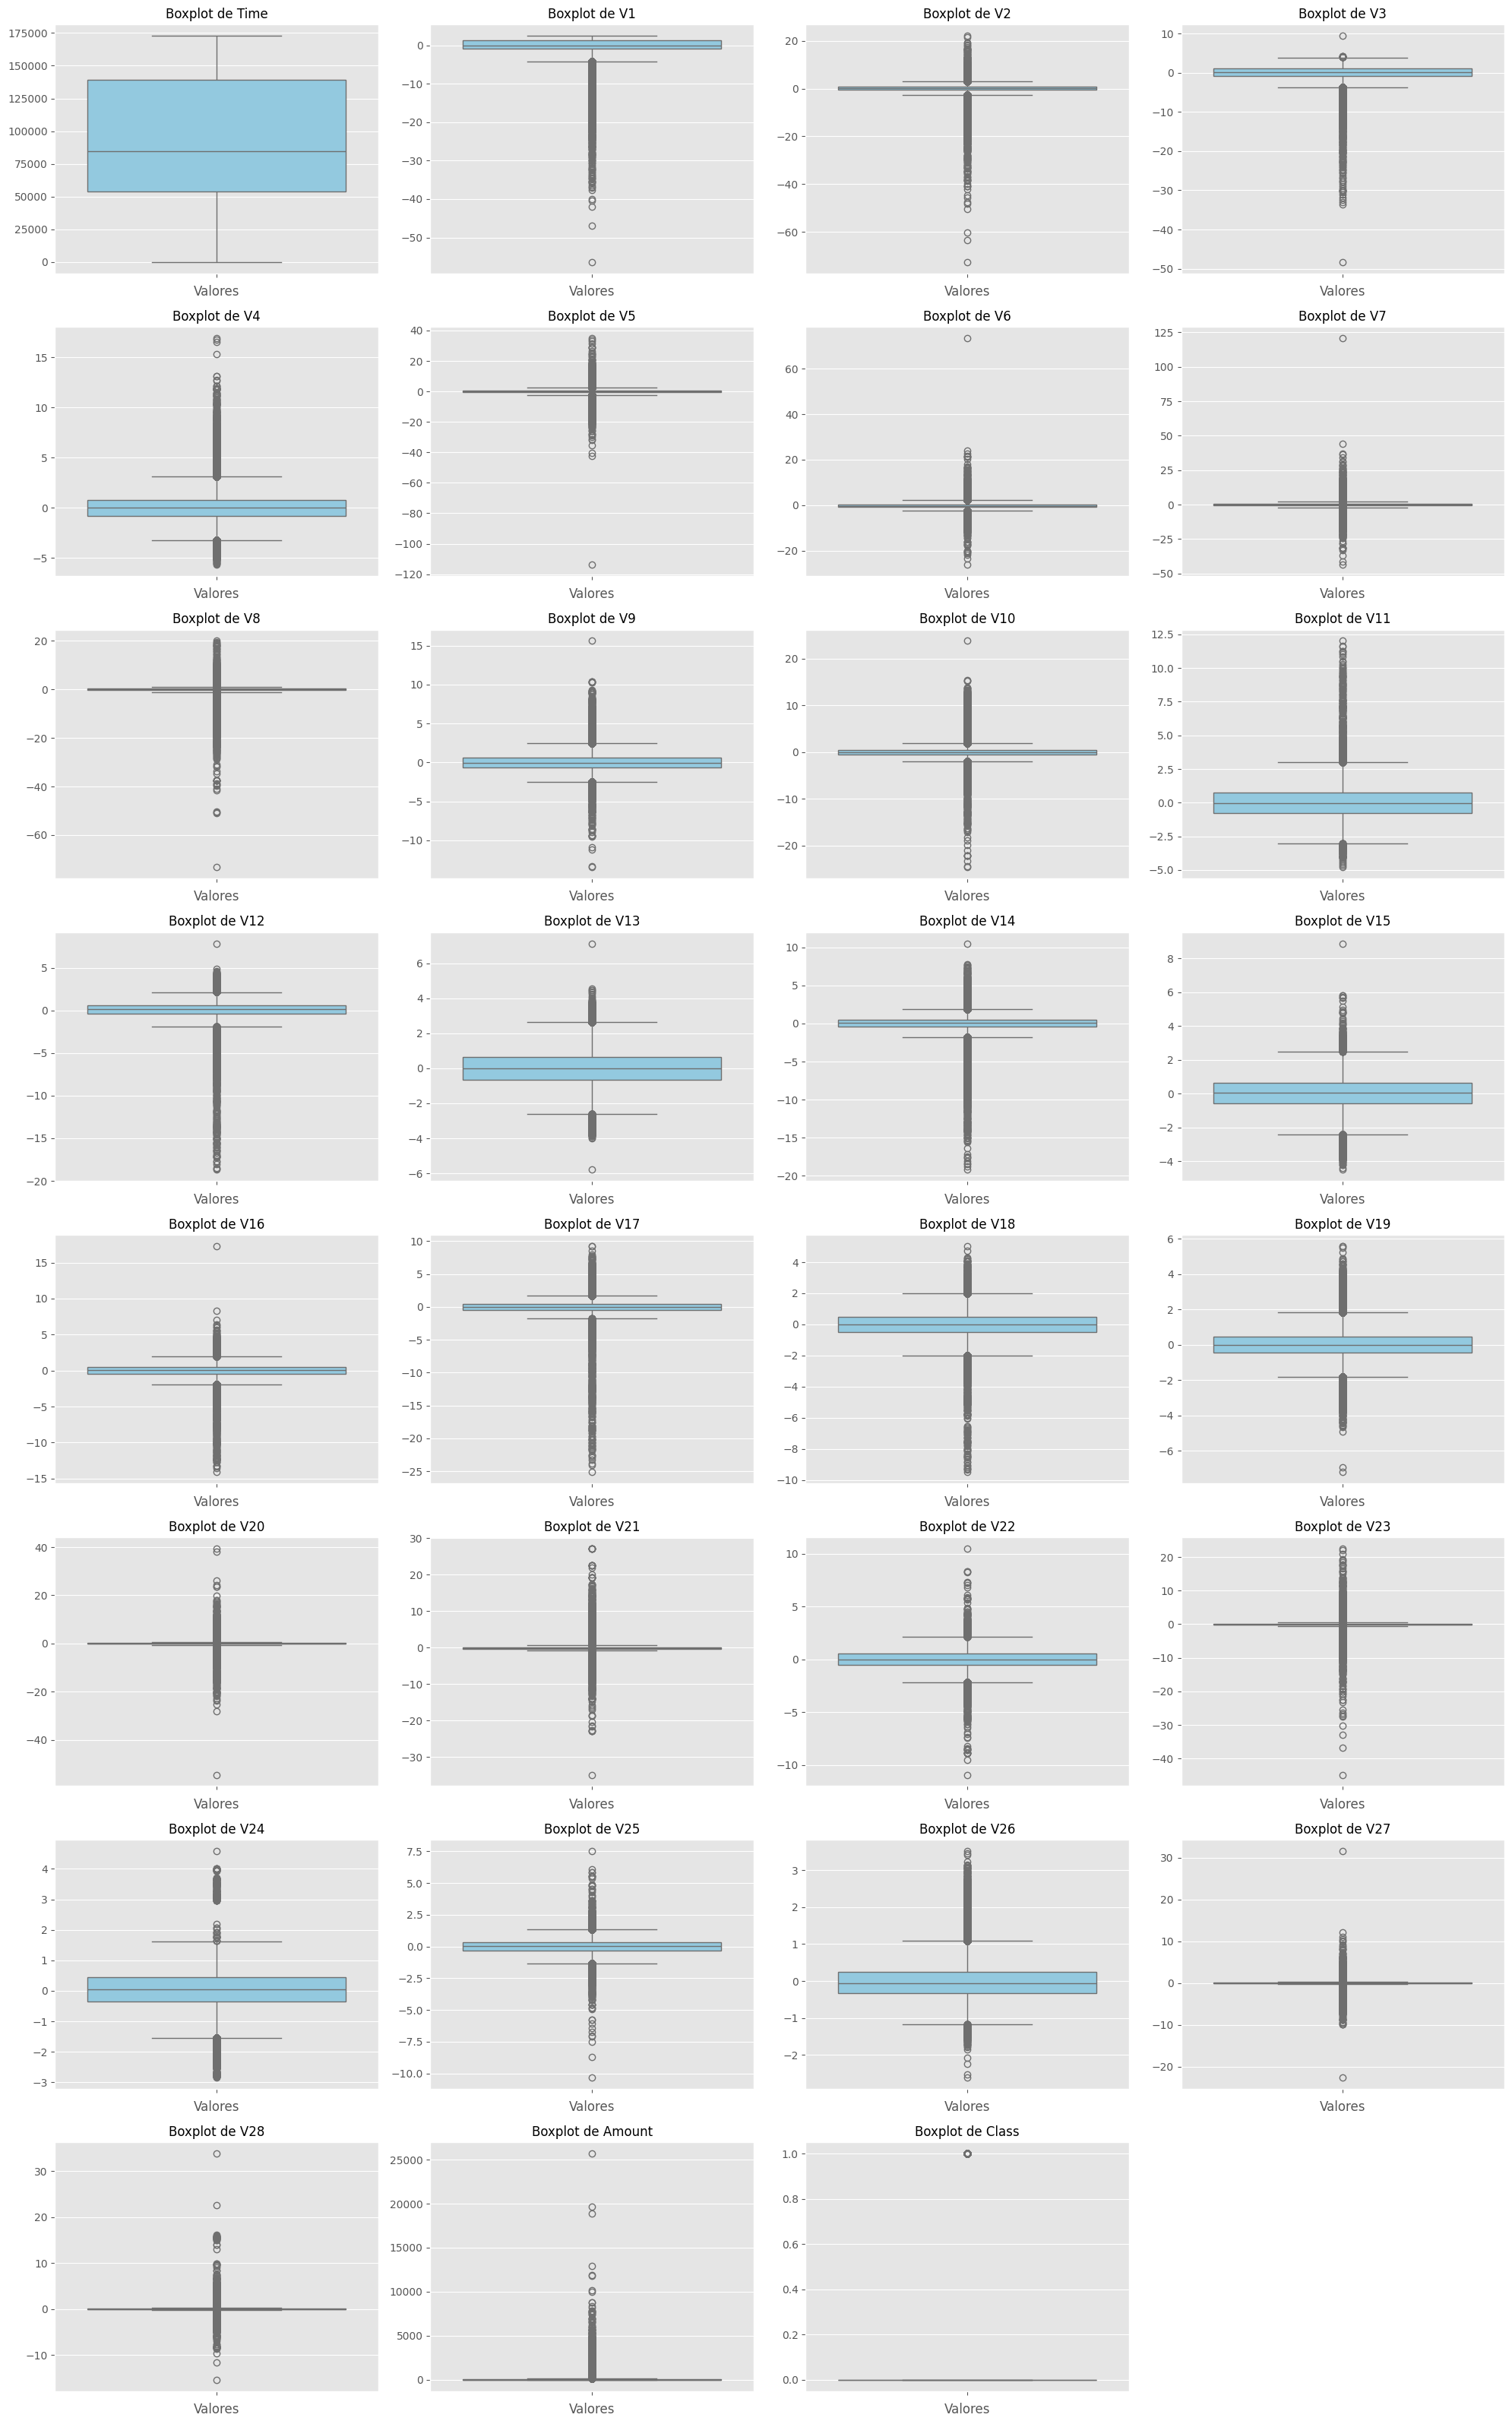

CPU times: user 25.9 s, sys: 546 ms, total: 26.4 s
Wall time: 29.4 s


In [ ]:
# Visualizar distribuciones de Amount y las variables PCA

%%time

# Configurar la cantidad de columnas en los subplots
columns = data.columns
n_cols = 4  # Número de gráficos por fila
n_rows = -(-len(columns) // n_cols)  # Calcular el número de filas necesarias

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Crear un boxplot para cada columna
for i, col in enumerate(columns):
    sns.boxplot(data=data[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot de {col}", fontsize=12)
    axes[i].set_xlabel("Valores")
    axes[i].set_ylabel("")

# Ocultar subplots vacíos si hay más subplots que columnas
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()


<blockquote>

---
  <b>👁️ *Observación:*</b><br>
  
1. **Variables (V1 a V28)**:  
   - La mayoría tienen **valores atípicos** (outliers), representados por puntos fuera del rango de los bigotes.  
   - Las distribuciones tienden a centrarse alrededor de **cero**, lo cual es común en variables transformadas, como ocurre en datos procesados con **PCA**.

2. **Time**:  
   - Presenta una **distribución más amplia y uniforme** sin tantos valores atípicos, indicando que es una variable **temporal** o secuencial.

3. **Amount**:  
   - Muestra **valores atípicos significativos**. Las transacciones con montos elevados son claras **candidatas a ser anomalías** (fraudes), lo cual concuerda con el análisis de fraude.

4. **Class**:  
   - Aquí se confirma la **desbalanceada distribución** entre clases (`0: no fraude`, `1: fraude`).  
     La cantidad de transacciones fraudulentas es **mínima** comparada con las no fraudulentas, lo que afecta al modelo y requiere técnicas para equilibrar las clases.

---

</blockquote>

**🤔 <font color="blue">Pregunta 4: ¿En qué rangos de importes (Amount) se concentran proporcionalmente más las transacciones fraudulentas en comparación con las no-fraudulentas, y qué implicaciones podría tener esto para mejorar los sistemas de detección de fraude?</font>** <br>

- Analizar si ciertos rangos de importes tienen un comportamiento inusual en términos de fraude.

- Mejorar los sistemas de monitoreo: Ajustar los algoritmos de detección para prestar más atención a esos rangos específicos.

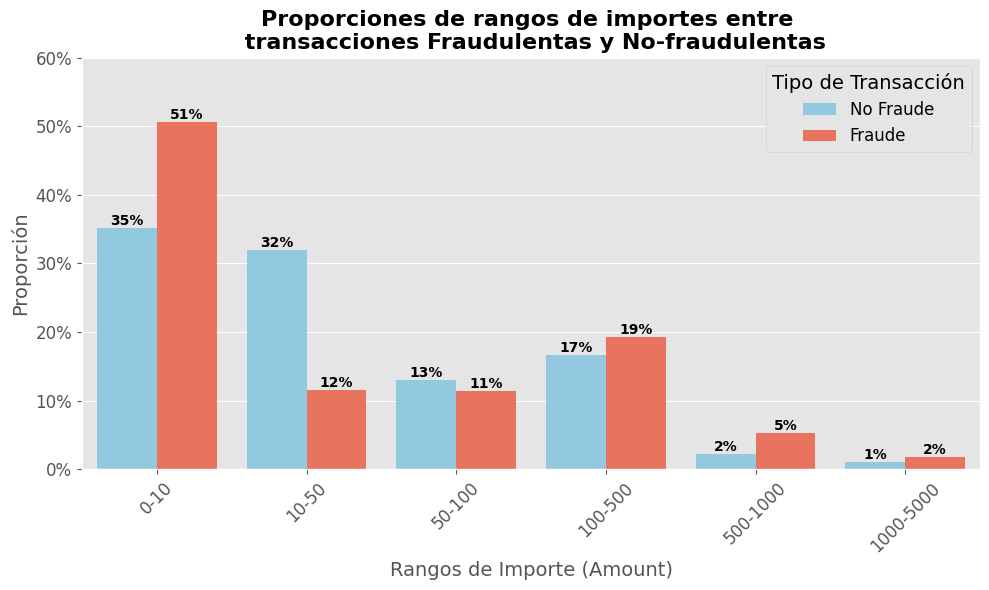

CPU times: user 584 ms, sys: 117 ms, total: 700 ms
Wall time: 715 ms


In [ ]:
%%time
# Crear rangos de valores para Amount
bins = [0, 10, 50, 100, 500, 1000, 5000]  # Define los rangos

# Etiquetas para los rangos
labels = ['0-10', '10-50', '50-100', '100-500', '500-1000', '1000-5000']

data['Amount_range'] = pd.cut(data['Amount'], bins=bins, labels=labels,
                              include_lowest=True)

# Contar las transacciones por rango y clase
range_class_counts = data.groupby(['Amount_range',
                                   'Class']).size().unstack(fill_value=0)

# Calcular proporciones relativas por clase
total_counts = data['Class'].value_counts()
range_proportions = range_class_counts.div(total_counts, axis=1)

# Preparar los datos para el gráfico
range_proportions.reset_index(inplace=True)
range_proportions = range_proportions.melt(id_vars='Amount_range',
                                           var_name='Clase',
                                           value_name='Proporción')

# Cambiar las etiquetas de clase a 'No Fraude' y 'Fraude'
range_proportions['Clase'] = range_proportions['Clase'].replace({0: 'No Fraude',
                                                                 1: 'Fraude'})

# Crear el gráfico de barras dobles
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Amount_range',
    y='Proporción',
    hue='Clase',
    data=range_proportions,
    #palette=['blue', 'red']
    palette=['#87CEEB', '#FF6347']
)

# Añadir etiquetas de valores sobre las barras con formato de porcentaje
for container in ax.containers:
    ax.bar_label(
        container,
        fmt=lambda x: f"{x * 100:.0f}%",  # Convertir a porcentaje y redondear
        label_type='edge',
        color='black',
        fontsize=10,
        fontweight='bold'
    )

# Configurar títulos y etiquetas
plt.title('Proporciones de rangos de importes entre \n transacciones \
Fraudulentas y No-fraudulentas', fontsize=16, fontweight='bold')

plt.xlabel('Rangos de Importe (Amount)', fontsize=14)
plt.ylabel('Proporción', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Rotar etiquetas del eje X

# Configurar el eje Y con formato de porcentaje
yticks = plt.gca().get_yticks()  # Obtener las posiciones de los ticks actuales
plt.gca().set_yticks(yticks)  # Establecer las posiciones
plt.gca().set_yticklabels([f"{int(tick * 100)}%" for tick in yticks],
                          fontsize=12)  # Formatear como porcentaje

# Ajustar la leyenda
plt.legend(title='Tipo de Transacción', title_fontsize=14, fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


**🤔 <font color="blue">Pregunta 5: ¿Los importes (Amount) igual a cero se concentran proporcionalmente más en las transacciones fraudulentas o en las no-fraudulentas?</font>**

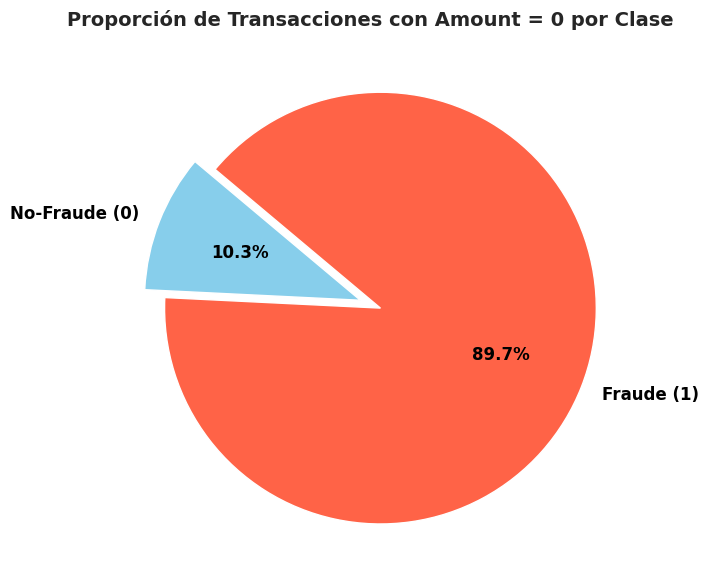

In [ ]:
# Calculate proportions for transactions with Amount = 0
#proportion_amount_zero = data[data['Amount'] == 0]['Class'].value_counts(normalize=True) * 100

# Filtrar solo las transacciones donde Amount es igual a 0
amount_zero_data = data[data['Amount'] == 0]

# Contar cuántas transacciones con Amount = 0 hay en cada clase
count_amount_zero = amount_zero_data['Class'].value_counts()

# Obtener el total de transacciones en cada clase
total_count_per_class = data['Class'].value_counts()

# Calcular la proporción de Amount = 0 en cada clase
proportion_amount_zero = (count_amount_zero / total_count_per_class).fillna(0)

# Reemplazar etiquetas para mayor claridad
labels = {0: "(0) No-Fraude", 1: "(1) Fraude"}
proportion_amount_zero.index = [labels[i] for i in proportion_amount_zero.index]


# Configuración de estilo con Seaborn
sns.set(style="whitegrid")

# Datos de proporción
labels = ['No-Fraude (0)', 'Fraude (1)']
values = proportion_amount_zero.values
colors = ['#87CEEB', '#FF6347']  # Colores personalizados

# Crear gráfico de tarta (pizza)
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',  # Mostrar porcentajes
    startangle=140,
    colors=colors,
    wedgeprops=dict(edgecolor='white'),
    explode=(0.05, 0.05)  # Separar ligeramente las porciones
)

# Personalizar texto
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_color('black')
    text.set_fontweight('bold')

# Título del gráfico
plt.title("Proporción de Transacciones con Amount = 0 por Clase", fontsize=14, fontweight='bold')

# Agregar interacción con mplcursors (hover)
cursor = mplcursors.cursor(wedges, hover=True)
@cursor.connect("add")
def on_hover(sel):
    sel.annotation.set_text(f"{labels[sel.index]}\n{values[sel.index]:.2f}%")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


<blockquote>

---
  <b>👁️ *Observación:*</b><br>
  
- **Mantener las transacciones con Amount = 0:**<br>
  - *Aunque haya menos transacciones fraudulentas con Amount = 0 en términos absolutos, la proporción más alta dentro de las transacciones fraudulentas hace que sea relevante mantener estos datos en el análisis.*<br>

  - *Podrían representar un patrón importante, como intentos de fraude con transacciones pequeñas o pruebas de tarjeta.* <br><br>
  
  ---

</blockquote>

## 🔄 **Preprocesamiento**<a name="preprocesamiento"></a>

Realiza varias operaciones de preprocesamiento y preparación de datos para aplicar modelos de aprendizaje automático.

### 🧹 **Limpieza de datos**<a name="limpieza-de-datos"></a>
En esta sección, se realizam el manejo de valores nulos, eliminación de duplicados, escalado de datos numéricos, etc.

#### Distribución de la variable "Class" antes del proceso de limpieza<a name="distribución-de-la-variable-class-antes-del-proceso-de-limpieza"></a>

In [ ]:
# Distribución de transacciones Fraudulentas (0) y
# transacciones fraudulentas(1)
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

#### Valores perdidos<a name="valores-perdidos"></a>

In [ ]:
# Verifica la cantidad de valores nulos en cada columna
data.isnull().sum()

Time             0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Amount           0
Class            0
Amount_range    55
dtype: int64

In [ ]:
# Elimina los valores nulos (sí hubiera)
data.dropna(inplace=True)

#### Datos duplicados<a name="datos-duplicados"></a>

In [ ]:
# Verifica la cantidad de filas duplicadas en el dataframe
duplicados = data.duplicated()
num_duplicados = duplicados.sum()

print(f"Número de filas duplicadas en el dataset: {num_duplicados}")


Número de filas duplicadas en el dataset: 1081


In [ ]:
# Verifica la cantidad de transacciones no-fraudulentas duplicadas en el dataframe
duplicados_nofraude = data[(data.duplicated()) & (data['Class'] == 0)].shape[0]
print(f"Transacciones Legítimas Duplicadas: {duplicados_nofraude}")

Transacciones Legítimas Duplicadas: 1062


In [ ]:
# Verifica la cantidad de transacciones fraudulentas duplicadas en el dataframe
duplicados_fraude = data[(data.duplicated()) & (data['Class'] == 1)].shape[0]
print(f"Transacciones Fraudulents Duplicadas: {duplicados_fraude}")

Transacciones Fraudulents Duplicadas: 19


In [ ]:
# Listar las filas duplicadas considerando todas las columnas
duplicados_completos = data[data.duplicated(keep=False)]

# Mostrar el número de duplicados completos
print(f"Número de transacciones idénticas en todas las columnas: ",
 {duplicados_completos.shape[0]})
print("Ejemplos de transacciones duplicadas idénticas:")

# Presenta las 5 primeras observaciones duplicadas
print(duplicados_completos.head())

Número de transacciones idénticas en todas las columnas:  {1854}
Ejemplos de transacciones duplicadas idénticas:
           Time          V1         V2         V3         V4         V5  \
32  26.00000000 -0.52991228 0.87389158 1.34724733 0.14545668 0.41420886   
33  26.00000000 -0.52991228 0.87389158 1.34724733 0.14545668 0.41420886   
34  26.00000000 -0.53538776 0.86526781 1.35107629 0.14757547 0.43368021   
35  26.00000000 -0.53538776 0.86526781 1.35107629 0.14757547 0.43368021   
112 74.00000000  1.03837033 0.12748613 0.18445589 1.10994979 0.44169890   

            V6          V7         V8          V9         V10        V11  \
32  0.10022309  0.71120608 0.17606596 -0.28671693 -0.48468768 0.87248959   
33  0.10022309  0.71120608 0.17606596 -0.28671693 -0.48468768 0.87248959   
34  0.08698294  0.69303931 0.17974226 -0.28564186 -0.48247447 0.87179958   
35  0.08698294  0.69303931 0.17974226 -0.28564186 -0.48247447 0.87179958   
112 0.94528253 -0.03671460 0.35099500  0.11894954 -0.243

In [ ]:
# Eliminar filas duplicadas
data = data.drop_duplicates()

In [ ]:
# Distribución de transacciones no-fraudulentas y transacciones fraudulentas
# después de eliminar duplicados
data['Class'].value_counts()

Class
0    283198
1       473
Name: count, dtype: int64

In [ ]:
# Numero total de Filas y Columnas después de la eliminación de los datos
# duplicados
data.shape

(283671, 32)

#### Corrección de Sesgos (Skewness) en Características Numéricas<a name="corrección-de-sesgos-skewness-en-características-numéricas"></a>
En esta sección hacemos tratamiento de los sesgos skewness en todo el dataset "data".<br>

Este proceso identifica columnas numéricas con alta asimetría en sus distribuciones y aplica transformaciones (logaritmo natural o raíz cuadrada) para reducir la skewness. Se comparan visualmente las distribuciones antes y después de la transformación, mostrando una mejora significativa en la simetría de los datos.<br>

Esta corrección mejora el rendimiento y la estabilidad de los modelos de Machine Learning al preparar los datos en un formato más adecuado.

⚠️ Columnas con skewness alta (>|1|):
['V28', 'Amount', 'V21', 'V10', 'V6', 'V16', 'V7', 'V14', 'V3', 'V12', 'V20', 'V27', 'V1', 'V17', 'V2', 'V23', 'V8']


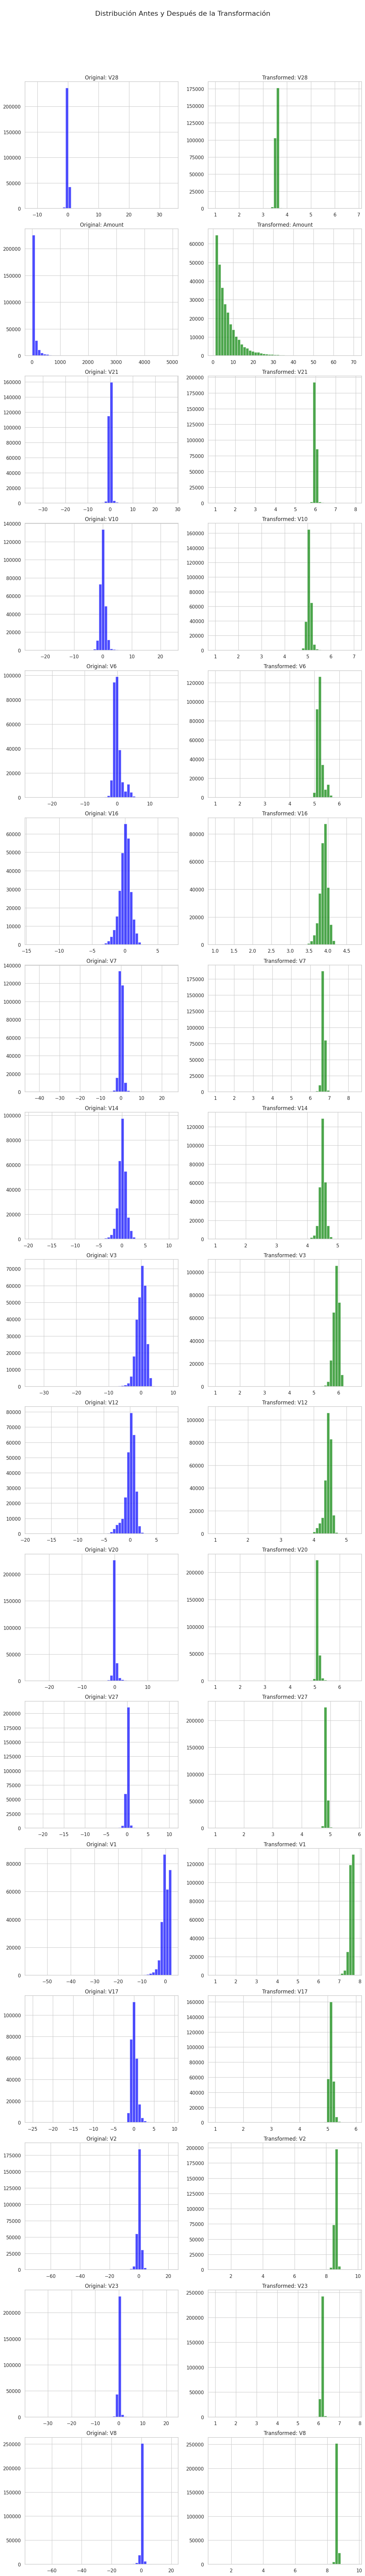


✅ Comparación de Skewness Antes y Después de la Transformación:
    Column  Skewness_Before  Skewness_After
1   Amount       7.96253473      2.61906002
0      V28      12.23872886      2.41836887
4       V6       1.10472746      0.52916589
3      V10       1.28136542     -0.19545718
2      V21       2.92668084     -1.24625006
5      V16      -1.09115200     -1.94859128
7      V14      -1.92183089     -3.35653552
8       V3      -1.98781931     -3.43521368
9      V12      -2.19822660     -3.56130787
12      V1      -3.17148678     -4.30654934
6       V7      -1.87565556     -4.43710734
11     V27      -3.00247374     -6.14314437
14      V2      -4.02038196     -6.45443785
10     V20      -2.82562203     -7.24348793
13     V17      -3.69088101     -7.74755919
15     V23      -4.79793620    -11.63566776
16      V8      -8.30897873    -13.15432032

✅ Distribución de la columna 'Class' después de la transformación:
Class
0    283198
1       473
Name: count, dtype: int64

✅ Estadísticas de 

In [ ]:
%%time

from scipy.stats import skew

# ============================================
# Identificar características numéricas
# ============================================
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Excluir la columna 'Class' de las características
numerical_features = numerical_features.drop('Class', errors='ignore')

# ============================================
# Calcular skewness para todo el dataset
# ============================================
skew_values = data[numerical_features].apply(lambda x: skew(x.dropna()))
skew_df = pd.DataFrame({'Column': numerical_features, 'Skewness': skew_values})
skew_df = skew_df.sort_values(by='Skewness', ascending=False)

# Umbral para skewness significativa
threshold = 1
columns_with_high_skew = skew_df[abs(skew_df['Skewness']) > threshold]['Column'].tolist()

print(f"⚠️ Columnas con skewness alta (>|{threshold}|):")
print(columns_with_high_skew)

# Guardar valores originales solo para comparar en las gráficas
original_data = data[columns_with_high_skew].copy()

# ============================================
# Aplicar transformación de skewness en todo el dataset
# ============================================
for col in columns_with_high_skew:
    if (data[col] > 0).all():  # Si los valores son positivos
        data[col] = np.log1p(data[col])
    else:  # Si hay valores negativos o mixtos
        data[col] = np.sqrt(data[col] - data[col].min() + 1)

# ============================================
# Visualización: Antes y Después de la Transformación
# ============================================
fig, axes = plt.subplots(len(columns_with_high_skew), 2, figsize=(12, 5 * len(columns_with_high_skew)))
fig.suptitle("\nDistribución Antes y Después de la Transformación", fontsize=16)

for i, col in enumerate(columns_with_high_skew):
    # Distribución original
    axes[i, 0].hist(original_data[col].dropna(), bins=50, color='blue', alpha=0.7)
    axes[i, 0].set_title(f'Original: {col}')

    # Distribución transformada
    axes[i, 1].hist(data[col].dropna(), bins=50, color='green', alpha=0.7)
    axes[i, 1].set_title(f'Transformed: {col}')

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Ajustar el título principal
plt.show()

# ============================================
# Comparación de Skewness Antes y Después
# ============================================
skew_values_after = data[columns_with_high_skew].apply(lambda x: skew(x.dropna()))
comparison_df = pd.DataFrame({
    'Column': columns_with_high_skew,
    'Skewness_Before': skew_df.loc[columns_with_high_skew, 'Skewness'].values,
    'Skewness_After': skew_values_after.values
}).sort_values(by='Skewness_After', ascending=False)

print("\n✅ Comparación de Skewness Antes y Después de la Transformación:")
print(comparison_df)

# ============================================
# Validación Final: Distribución de la columna 'Class'
# ============================================
print("\n✅ Distribución de la columna 'Class' después de la transformación:")
print(data['Class'].value_counts())

# Validación Final: Estadísticas de la columna 'Amount'
print("\n✅ Estadísticas de la columna 'Amount' después de la transformación:")
print(data['Amount'].describe())


#### Detección de anomalías (método: Isolation Forest)<a name="detección-de-anomalías-método-isolation-forest"></a>
Para este dataset, aplicaremos Isolation Forest ya que es robusto en conjuntos de datos grandes y permite identificar anomalías en variables PCA y escaladas.

El uso del método de detección de anomalías puede beneficiar el proyecto al reducir la influencia de los valores atípicos, lo que potencialmente mejora el rendimiento y la capacidad de generalización del modelo en datos nuevos.<br>

**Aplicaremos esta técnica solamente para las transacciones No-Fraudulentas.**

In [ ]:
# Aplicar Isolation Forest solo a transacciones no-fraudulentas

# Separar las transacciones no fraudulentas
non_fraud_data = data[data['Class'] == 0]

# Ajusta el parámetro 'contamination' según tus datos
iso = IsolationForest(contamination=0.01, random_state=42)
non_fraud_data['Anomaly'] = iso.fit_predict(non_fraud_data[['Amount']])

# Filtrar transacciones no anómalas
clean_non_fraud_data = non_fraud_data[non_fraud_data['Anomaly'] == 1 \
                                      ].drop('Anomaly', axis=1)

# Separar las transacciones fraudulentas (sin cambios)
fraud_data = data[data['Class'] == 1]

# Combinar datos limpios
clean_data = pd.concat([clean_non_fraud_data, fraud_data], axis=0)

# Verificar el resultado
print(f"Transacciones originales: {data.shape[0]}")
print(f"Transacciones después de la limpieza: {clean_data.shape[0]}")


Transacciones originales: 283671
Transacciones después de la limpieza: 280898


#### Regenerar gráficas con datos limpios<a name="regenerar-gráficas-con-datos-limpios"></a>
Usamos clean_data para generar las gráficas de proporciones y validar que los rangos aún reflejan patrones significativos.

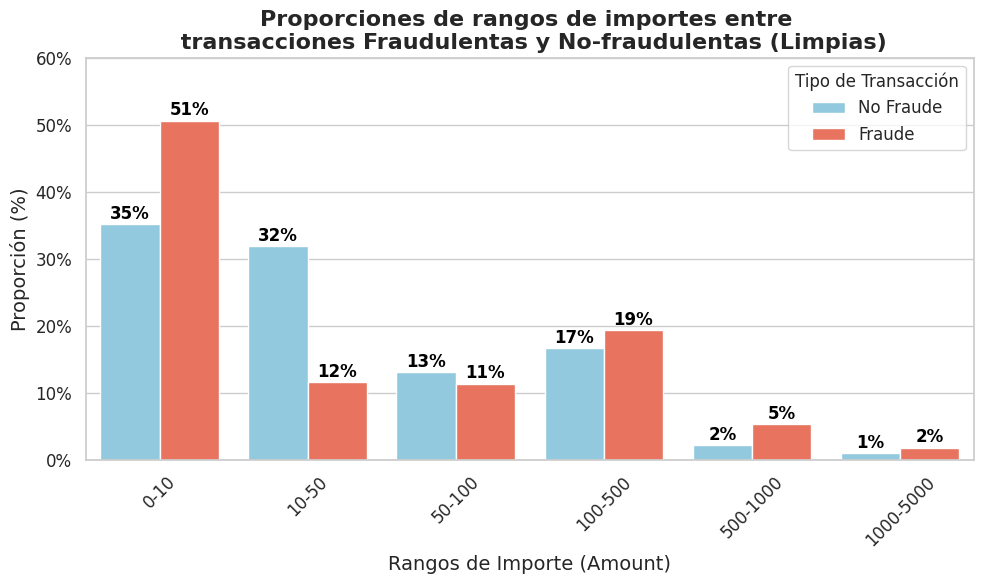

In [ ]:
# Gráfica de proporciones por rangos de Amount:

# Crear el gráfico de barras dobles
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Amount_range',
    y='Proporción',
    hue='Clase',
    data=range_proportions,
    #palette=['blue', 'red']
    palette=['#87CEEB', '#FF6347']
)

# Añadir etiquetas de valores encima de las barras
for container in ax.containers:
    # Asegurarnos de mostrar valores pequeños redondeados
    for bar, value in zip(container, container.datavalues):
        if value > 0:  # Evitar mostrar etiquetas para proporciones de 0
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Posición en X
                bar.get_height() + 0.002, # Posición ligeramente encima de la barra
                f"{value:.0%}",  # Formato de porcentaje con una decimal
                ha='center',
                va='bottom',
                fontsize=12,
                color='black',
                fontweight='bold'
            )

# Configurar títulos y etiquetas
plt.title('Proporciones de rangos de importes entre \n transacciones '
          'Fraudulentas y No-fraudulentas (Limpias)',
          fontsize=16, fontweight='bold')

plt.xlabel('Rangos de Importe (Amount)', fontsize=14)
plt.ylabel('Proporción (%)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)

# Configurar el eje Y para que muestre valores redondeados
yticks = plt.gca().get_yticks()  # Obtener los valores actuales del eje Y
plt.gca().set_yticks(yticks)  # Asegurar que los valores permanezcan
plt.gca().set_yticklabels([f"{tick:.0%}" for tick in yticks], fontsize=12) # Formatear como porcentajes

# Ajustar la leyenda
plt.legend(title='Tipo de Transacción', title_fontsize=12, fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


#### Eliminación de columnas irrelevantes<a name="eliminación-de-columnas-irrelevantes"></a>

In [ ]:
# Eliminar la columna Time
clean_data = clean_data.drop(['Time', 'Amount_range'], axis=1)

In [ ]:
# Numero de Filas y Columnas después de la eliminación de la columna Time
clean_data.shape

(280898, 30)

In [ ]:
# Verificar si la variable Time ha sido eliminada del dataset
print(clean_data.head())

          V1         V2         V3          V4          V5         V6  \
0 7.48650135 8.58154685 6.10060085  1.37815522 -0.33832077 5.25574863   
1 7.65502232 8.60127190 5.90317407  0.44815408  0.06001765 5.20366651   
2 7.48659840 8.50738294 6.03773081  0.37977959 -0.50319813 5.38154302   
3 7.51273838 8.57499280 6.03936895 -0.86329128 -0.01030888 5.32988828   
4 7.49995177 8.63675080 6.01911138  0.40303393 -0.40719338 5.22076885   

          V7         V8          V9        V10         V11        V12  \
0 6.69304416 8.62063898  0.36378697 5.06745070 -0.55159953 4.36645323   
1 6.66921574 8.61985035 -0.25542513 5.04195280  1.61272666 4.55510153   
2 6.73414453 8.62927542 -1.51465432 5.07896695  0.62450146 4.44407452   
3 6.69289553 8.63679074 -1.38702406 5.05304963 -0.22648726 4.45667397   
4 6.71938854 8.59919681  0.81773931 5.13238121 -0.82284288 4.49687783   

          V13        V14         V15        V16        V17         V18  \
0 -0.99138985 4.46129534  1.46817697 3.82876664 

<blockquote>

---
  <b>👁️*Observación:*</b><br>
  - *Eliminar la columna Time, ya que no tiene relación significativa con la variable objetivo y no es comparable con las variables transformadas por PCA.*
  ---

</blockquote>

#### Escalado de Características<a name="escalado-de-características"></a>
- Usamos **RobustScaler()** para escalar Amount. Esto es útil porque RobustScaler utiliza la mediana y el rango intercuartílico (IQR), lo que lo hace menos sensible a los outliers. Esto es especialmente importante para Amount, ya que identificamos la presencia de valores atípicos en esta variable.

In [ ]:
# Escalado de la variable Amount usando RobustScaler
robust_scaler = RobustScaler()
clean_data[['Amount']] = robust_scaler.fit_transform(clean_data[['Amount']])

In [ ]:
# Verificar si la variable Amount ha sido escalada correctamente
print(clean_data.head())

          V1         V2         V3          V4          V5         V6  \
0 7.48650135 8.58154685 6.10060085  1.37815522 -0.33832077 5.25574863   
1 7.65502232 8.60127190 5.90317407  0.44815408  0.06001765 5.20366651   
2 7.48659840 8.50738294 6.03773081  0.37977959 -0.50319813 5.38154302   
3 7.51273838 8.57499280 6.03936895 -0.86329128 -0.01030888 5.32988828   
4 7.49995177 8.63675080 6.01911138  0.40303393 -0.40719338 5.22076885   

          V7         V8          V9        V10         V11        V12  \
0 6.69304416 8.62063898  0.36378697 5.06745070 -0.55159953 4.36645323   
1 6.66921574 8.61985035 -0.25542513 5.04195280  1.61272666 4.55510153   
2 6.73414453 8.62927542 -1.51465432 5.07896695  0.62450146 4.44407452   
3 6.69289553 8.63679074 -1.38702406 5.05304963 -0.22648726 4.45667397   
4 6.71938854 8.59919681  0.81773931 5.13238121 -0.82284288 4.49687783   

          V13        V14         V15        V16        V17         V18  \
0 -0.99138985 4.46129534  1.46817697 3.82876664 

In [ ]:
# Verificar cantidad de observaciones por clase
clean_data['Class'].value_counts()

Class
0    280425
1       473
Name: count, dtype: int64

<blockquote>

---
  <b>👁️*Observación:*</b><br>
  - *Mantener la columna Amount, ya que representa un dato importante para las transacciones y puede ser útil después de una transformación adecuada.*
---

</blockquote>

### **Evaluación Comparativa de Modelos**<a name="evaluación-comparativa-de-modelos"></a>

En esta sección, evaluamos diversas técnicas y algoritmos con el objetivo de analizar cómo un dataset altamente desbalanceado se comporta en distintos escenarios.<br>

Esta exploración nos permitirá identificar el algoritmo más adecuado. Más adelante en el proyecto, una vez seleccionado el mejor algoritmo/modelo, nos enfocaremos en su optimización y ajuste fino para alcanzar las mejores métricas de rendimiento.<br>

**Modelos Evaluados:**<br>
Se evaluan los modelos tanto en datset original (clean_data) cuanto con el balanceado de clases.<br>
- Regresión Logistica (LogisticRegression)<br>
- RandomForest (RandomForestClassifier)<br>
- XGBoost (XGBClassifier)<br>
- Catboost (CatBoostClassifier)<br>
- LightGBM (LGBMClassifier)<br>

**Ensembles:**<br>
Se evaluan los ensembles con y sin aplicacion de técnicas de SMOTE.<br>
- StackingClassifier<br>
- VotingClassifier<br>

**Balanceado de Clases:**<br>
- Oversampling (SMOTE)<br>
- Undersampling (RandomUnderSampler)<br>

**Validación Cruzada de los Mejores Modelos:**<br>
- Validación Cruzada en dataset original (clean_data)<br>
- Validación Cruzada con SMOTE<br>

#### Separa el dataset<a name="separa-el-dataset"></a>

In [ ]:
%%time

# Separar el dataset en características (X) y variable objetivo (y)
# Eliminamos la columna 'Class' de las características
X = clean_data.drop(['Class'], axis=1)
y = clean_data['Class']  # Etiquetamos la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# Definir algoritmos a probar
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(force_row_wise=True, random_state=42)
}

print('\nTamaños set de entrenamiento:', X_train.shape, y_train.shape)
# Proporción de clases en el conjunto de entrenamiento
print("\nDistribución en y_train:")
print(y_train.value_counts())

print('\nTamaño set de prueba:', X_test.shape, y_test.shape)
# Proporción de clases en el conjunto de prueba
print("\nDistribución en y_test:")
print(y_test.value_counts())


Tamaños set de entrenamiento: (224718, 29) (224718,)

Distribución en y_train:
Class
0    224340
1       378
Name: count, dtype: int64

Tamaño set de prueba: (56180, 29) (56180,)

Distribución en y_test:
Class
0    56085
1       95
Name: count, dtype: int64
CPU times: user 212 ms, sys: 17 ms, total: 229 ms
Wall time: 232 ms


#### **Técnicas**<a name="técnicas"></a>

El uso de técnicas permite:<br>

- ***Comparación Objetiva:*** Evaluar cómo cada técnica (balanceo, reducción de dimensionalidad, validación cruzada, ensembles) influye en el rendimiento de los algoritmos.<br>

- ***Identificación de la Mejor Configuración:*** Identificar el mejor enfoque de preprocesamiento y balanceo para optimizar la detección de fraudes.<br>

- ***Flexibilidad:*** Adaptar el proyecto a diferentes escenarios o datasets, asegurando una solución escalable y reproducible.


##### **Tecnica 1: Entrenamiento sobre el Dataset Original**<br><a name="técnica-1-entrenamiento-sobre-el-dataset-original"></a>

**Descripción:**<br>
En este tecnica usamos los datos originales (`clean_data`) sin aplicar reducción de dimensionalidad ni técnicas de balanceo.

**Objetivo:**<br>
Servir como baseline para comparar el impacto en el balanceo de clases.


In [ ]:
%%time

tecnica_name = "Tecnica 1"

# Evaluar cada modelo y consolidar métricas
results_tecnica_1 = pd.DataFrame()  # DataFrame para consolidar resultados globales

for name, model in models.items():
    print(f"\n=== Entrenando y evaluando modelo: {name} ===")

    # Medir el tiempo de inicio
    start_time = time.time()

    # Entrenar modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Medir el tiempo de fin
    end_time = time.time()
    execution_time = end_time - start_time  # Tiempo en segundos

    # Calcular métricas actualizadas y convertir a porcentaje
    auprc = average_precision_score(y_test, y_proba) * 100
    f1 = f1_score(y_test, y_pred) * 100
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    balanced_acc = balanced_accuracy_score(y_test, y_pred) * 100
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100

    # Consolidar métricas globales en un DataFrame
    results_tecnica_1 = pd.concat([results_tecnica_1, pd.DataFrame({
        "Modelo": [name],
        "AUPRC": [auprc],
        "Recall": [recall],
        "Balanced Accuracy": [balanced_acc],
        "F1-Score": [f1],
        "MCC": [mcc],
        "Accuracy (%)": [accuracy],
        "Precision": [precision],

        "Execution Time (s)": [execution_time],  # Agregar tiempo de ejecución
        "Tecnica":[tecnica_name]
    })], ignore_index=True)

    # Imprimir clasificación por clase
    print(f"\n=== Métricas por clase para {name} ===")
    print(classification_report(y_test, y_pred, zero_division=0))

print(f"\n=== Finalizada Validación Cruzada ===\n")

# Mostrar consolidado de resultados
results_tecnica_1 = results_tecnica_1.sort_values(by=["AUPRC"], ascending=False, ignore_index=True)
print("\n=== Resultados Consolidados y Ordenados para el Tecnica 1 ===")
print(results_tecnica_1)


=== Entrenando y evaluando modelo: Logistic Regression ===

=== Métricas por clase para Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56085
           1       0.87      0.62      0.72        95

    accuracy                           1.00     56180
   macro avg       0.93      0.81      0.86     56180
weighted avg       1.00      1.00      1.00     56180


=== Entrenando y evaluando modelo: Random Forest ===

=== Métricas por clase para Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56085
           1       0.94      0.77      0.84        95

    accuracy                           1.00     56180
   macro avg       0.97      0.88      0.92     56180
weighted avg       1.00      1.00      1.00     56180


=== Entrenando y evaluando modelo: XGBoost ===

=== Métricas por clase para XGBoost ===
              precision    recall  f1-score

##### **Tecnica 2: Balanceado con SMOTE**<a name="técnica-2-balanceado-con-smote"></a>


**Descripción:**
Usamos SMOTE para balancear las clases y evaluamos en la predicción de las fraudes.


In [ ]:
%%time

tecnica_name = "Tecnica 2"

print("Distribución de clases antes del SMOTE:\n")
print(y_train.value_counts())

# Aplicar SMOTE solo al conjunto de entrenamiento
print("\nAplicando SMOTE al conjunto de entrenamiento...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nDistribución de clases después del SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Evaluar cada modelo y consolidar métricas
results_tecnica_2 = pd.DataFrame() # DataFrame para consolidar resultados globales

for name, model in models.items():
    print(f"\n=== Entrenando y evaluando modelo: {name} ===")

    # Medir el tiempo de inicio
    start_time = time.time()

    # Entrenar modelo
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Medir el tiempo de fin
    end_time = time.time()
    execution_time = end_time - start_time  # Tiempo en segundos

    # Calcular métricas actualizadas y Convertir a porcentaje
    auprc = average_precision_score(y_test, y_proba) * 100
    f1 = f1_score(y_test, y_pred) * 100
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    balanced_acc = balanced_accuracy_score(y_test, y_pred) * 100
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100

    # Consolidar métricas globales en un DataFrame
    results_tecnica_2 = pd.concat([results_tecnica_2, pd.DataFrame({
        "Modelo": [name],
        "AUPRC": [auprc],
        "Recall": [recall],
        "Balanced Accuracy": [balanced_acc],
        "F1-Score": [f1],
        "MCC": [mcc],
        "Accuracy (%)": [accuracy],
        "Precision": [precision],

        "Execution Time (s)": [execution_time],  # Agregar tiempo de ejecución
        "Tecnica": [tecnica_name]
    })], ignore_index=True)

    # Imprimir clasificación por clase
    print(f"\n=== Métricas por clase para {name} ===")
    print(classification_report(y_test, y_pred, zero_division=0))

print(f"\n=== Finalizada Validación Cruzada ===\n")

# Mostrar consolidado de resultados
results_tecnica_2 = results_tecnica_2.sort_values(
    by=["AUPRC"], ascending=False, ignore_index=True
)
print("\n=== Resultados Consolidados y Ordenados para el Tecnica 2 ===")
print(results_tecnica_2)


Distribución de clases antes del SMOTE:

Class
0    224340
1       378
Name: count, dtype: int64

Aplicando SMOTE al conjunto de entrenamiento...

Distribución de clases después del SMOTE:
Class
0    224340
1    224340
Name: count, dtype: int64

=== Entrenando y evaluando modelo: Logistic Regression ===

=== Métricas por clase para Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56085
           1       0.06      0.91      0.12        95

    accuracy                           0.98     56180
   macro avg       0.53      0.94      0.55     56180
weighted avg       1.00      0.98      0.99     56180


=== Entrenando y evaluando modelo: Random Forest ===

=== Métricas por clase para Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56085
           1       0.86      0.81      0.83        95

    accuracy                           1.00     56

##### **Tecnica 3: Balanceado con RandomUnderSampler**<a name="técnica-3-balanceado-con-randomundersampler"></a>

**Descripción:**
Aplicamos RandomUnderSampler para balancear las clases y evaluamos su impacto en la predicción de las fraudes.<br>

El método RandomUnderSampler de la librería imbalanced-learn submuestrea la clase mayoritaria para igualar el número de registros de la clase minoritaria.

In [ ]:
%%time

tecnica_name = "Tecnica 3"

# Distribución de clases antes del RandomUnderSampler
print("Distribución de clases antes del RandomUnderSampler:")
print(y_train.value_counts())

# Aplicar RandomUnderSampler
print("\nAplicando RandomUnderSampler...")
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Mostrar distribución después del balanceo
print("\nDistribución de clases después del RandomUnderSampler:")
print(pd.Series(y_rus).value_counts())

# Evaluar cada modelo y consolidar métricas
results_tecnica_3 = pd.DataFrame()

for name, model in models.items():
    print(f"\n=== Entrenando y evaluando modelo: {name} ===")

    # Ajuste específico para LightGBM si hay pocos datos
    if name == "LightGBM":
        model = LGBMClassifier(
            random_state=42,
            min_child_samples=10,    # Reemplaza min_data_in_leaf para evitar advertencias
            max_bin=128,             # Reducir número de bins
            num_leaves=15,           # Limitar el número de hojas
            force_col_wise=True      # Forzar paralelización por columnas para evitar overhead
        )

    # Medir el tiempo de inicio
    start_time = time.time()

    # Entrenar modelo con los datos balanceados
    model.fit(X_rus, y_rus)

    # Predicciones y probabilidades
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Medir el tiempo de fin
    end_time = time.time()
    execution_time = end_time - start_time

    # Calcular métricas actualizadas y convertir a porcentaje
    auprc = average_precision_score(y_test, y_proba) * 100
    f1 = f1_score(y_test, y_pred) * 100
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    balanced_acc = balanced_accuracy_score(y_test, y_pred) * 100
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, zero_division=0) * 100
    recall = recall_score(y_test, y_pred) * 100

    # Consolidar métricas globales en un DataFrame
    results_tecnica_3 = pd.concat([results_tecnica_3, pd.DataFrame({
        "Modelo": [name],
        "AUPRC": [auprc],
        "Recall": [recall],
        "Balanced Accuracy": [balanced_acc],
        "F1-Score": [f1],
        "MCC": [mcc],
        "Accuracy (%)": [accuracy],
        "Precision": [precision],
        "Execution Time (s)": [execution_time],
        "Tecnica": [tecnica_name]
    })], ignore_index=True)

    # Imprimir clasificación por clase
    print(f"\n=== Métricas por clase para {name} ===")
    print(classification_report(y_test, y_pred, zero_division=0))

# Mostrar consolidado de resultados
results_tecnica_3 = results_tecnica_3.sort_values(by=["AUPRC"],
                                                    ascending=False,
                                                    ignore_index=True)
print("\n=== Resultados Consolidados y Ordenados para el Tecnica 3 ===")
print(results_tecnica_3)


Distribución de clases antes del RandomUnderSampler:
Class
0    224340
1       378
Name: count, dtype: int64

Aplicando RandomUnderSampler...

Distribución de clases después del RandomUnderSampler:
Class
0    378
1    378
Name: count, dtype: int64

=== Entrenando y evaluando modelo: Logistic Regression ===

=== Métricas por clase para Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56085
           1       0.04      0.88      0.08        95

    accuracy                           0.97     56180
   macro avg       0.52      0.93      0.53     56180
weighted avg       1.00      0.97      0.98     56180


=== Entrenando y evaluando modelo: Random Forest ===

=== Métricas por clase para Random Forest ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56085
           1       0.06      0.89      0.11        95

    accuracy                           0.98    

##### **Tecnica 4: Validación Cruzada de Mejores Modelos (Balanceado con SMOTE)**<a name="técnica-4-validación-cruzada-de-mejores-modelos-balanceado-con-smote"></a>

**Descripción:**
Ejecutamos la Validación Cruzada Estratificada (CrossValidation) con StratifiedKFold para los modelos seleccionados y usamos el método SMOTE para balancear las clases.

In [ ]:
# Validación Cruzada - Balanceado con SMOTE (Oversampling)
%%time

tecnica_name = "Tecnica 4"

# Modelos seleccionados con parámetros específicos para validación cruzada
selected_models_cv = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                             tree_method='hist', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, thread_count=-1, random_state=42)
}

# Configuración de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# DataFrame para consolidar resultados globales
results_tecnica_4 = pd.DataFrame()

print(f"\n=== Aguarde mientras se ejecuta la Validación Cruzada... ===")
# Validación cruzada para cada modelo
for name, model in selected_models_cv.items():
    total_execution_time = 0

    # Listas para guardar métricas por pliegue
    scores_auprc, scores_recall, scores_f1 = [], [], []
    scores_precision, scores_balanced_acc, scores_mcc = [], [], []
    scores_accuracy = []

    # Validación cruzada
    for train_idx, test_idx in cv.split(X_train, y_train):
        # Dividir datos en entrenamiento y prueba
        X_train_fold, y_train_fold = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_test_fold, y_test_fold = X_train.iloc[test_idx], y_train.iloc[test_idx]

        # Aplicar SMOTE al conjunto de entrenamiento
        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_fold, y_train_fold)

        # Medir tiempo de inicio
        start_time = time.time()

        # Entrenar modelo
        model_clone = model.fit(X_train_smote, y_train_smote)

        # Medir tiempo de fin
        end_time = time.time()
        total_execution_time += (end_time - start_time)

        # Predicciones y probabilidades
        y_pred = model_clone.predict(X_test_fold)
        y_proba = model_clone.predict_proba(X_test_fold)[:, 1]

        # Calcular métricas
        scores_auprc.append(average_precision_score(y_test_fold, y_proba) * 100)
        scores_recall.append(recall_score(y_test_fold, y_pred) * 100)
        scores_balanced_acc.append(balanced_accuracy_score(y_test_fold, y_pred) * 100)
        scores_f1.append(f1_score(y_test_fold, y_pred) * 100)
        scores_precision.append(precision_score(y_test_fold, y_pred, zero_division=0) * 100)
        scores_mcc.append(matthews_corrcoef(y_test_fold, y_pred) * 100)
        scores_accuracy.append(accuracy_score(y_test_fold, y_pred) * 100)


    print(f"\n=== Consolidando métricas promedio para el Modelo: {name} ===")
    # Consolidar métricas promedio para el modelo actual
    results_tecnica_4 = pd.concat([results_tecnica_4, pd.DataFrame({
        "Modelo": [name],
        "AUPRC": [sum(scores_auprc) / len(scores_auprc)],
        "Recall": [sum(scores_recall) / len(scores_recall)],
        "Balanced Accuracy": [sum(scores_balanced_acc) / len(scores_balanced_acc)],
        "F1-Score": [sum(scores_f1) / len(scores_f1)],
        "MCC": [sum(scores_mcc) / len(scores_mcc)],
        "Accuracy (%)": [sum(scores_accuracy) / len(scores_accuracy)],
        "Precision": [sum(scores_precision) / len(scores_precision)],
        "Execution Time (s)": [total_execution_time],
        "Tecnica": [tecnica_name]
    })], ignore_index=True)


    # Imprimir clasificación por clase
    print(f"\n=== Métricas por clase para {name} ===")
    print(classification_report(y_test_fold, y_pred, zero_division=0))

print(f"\n=== Finalizada Validación Cruzada ===")

# Ordenar resultados por AUPRC, Recall y Balanced Accuracy
results_tecnica_4 = results_tecnica_4.sort_values(
    by=["AUPRC", "Recall", "Balanced Accuracy"],
    ascending=False
)

# Mostrar resultados
print("\nResultados de Validación Cruzada con SMOTE:")
print(results_tecnica_4)



=== Aguarde mientras se ejecuta la Validación Cruzada... ===

=== Consolidando métricas promedio para el Modelo: XGBoost ===

=== Métricas por clase para XGBoost ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44868
           1       0.83      0.84      0.83        75

    accuracy                           1.00     44943
   macro avg       0.91      0.92      0.92     44943
weighted avg       1.00      1.00      1.00     44943


=== Consolidando métricas promedio para el Modelo: CatBoost ===

=== Métricas por clase para CatBoost ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44868
           1       0.66      0.84      0.74        75

    accuracy                           1.00     44943
   macro avg       0.83      0.92      0.87     44943
weighted avg       1.00      1.00      1.00     44943


=== Finalizada Validación Cruzada ===

Resultados de Validación Cruzada

##### **Tecnica 5: Validación Cruzada de Mejores Modelos (dataset original)**<a name="técnica-5-validación-cruzada-de-mejores-modelos-dataset-original"></a>


**Descripción:**
Ejecutamos la validación Cruzada Estratificada (CrossValidation) con StratifiedKFold para los modelos seleccionados. En este tecnica no hacemos el balanceo de clases, trabajamos con el dataset original (clean_data).

In [ ]:
# Validación Cruzada con dataset original (SIN SMOTE)

%%time

tecnica_name = "Tecnica 5"

# Modelos seleccionados con parámetros específicos para validación cruzada
selected_models_cv = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                             tree_method='hist', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, thread_count=-1, random_state=42)
}

# Configuración de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# DataFrame para consolidar resultados globales
results_tecnica_5 = pd.DataFrame()

print(f"\n=== Aguarde mientras se ejecuta la Validación Cruzada... ===")
# Validación cruzada para cada modelo
for name, model in selected_models_cv.items():
    total_execution_time = 0

    # Listas para guardar métricas por pliegue
    scores_auprc, scores_recall, scores_f1 = [], [], []
    scores_precision, scores_balanced_acc, scores_mcc = [], [], []
    scores_accuracy = []

    # Validación cruzada
    for train_idx, test_idx in cv.split(X_train, y_train):
        # Dividir datos en entrenamiento y prueba
        X_train_fold, y_train_fold = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_test_fold, y_test_fold = X_train.iloc[test_idx], y_train.iloc[test_idx]

        # Medir tiempo de inicio
        start_time = time.time()

        # Entrenar modelo con datos de entrenamiento del pliegue
        model_clone = model.fit(X_train_fold, y_train_fold)

        # Medir tiempo de fin
        end_time = time.time()
        total_execution_time += (end_time - start_time)

        # Predicciones y probabilidades
        y_pred = model_clone.predict(X_test_fold)
        y_proba = model_clone.predict_proba(X_test_fold)[:, 1]

        # Calcular métricas
        scores_auprc.append(average_precision_score(y_test_fold, y_proba) * 100)
        scores_recall.append(recall_score(y_test_fold, y_pred) * 100)
        scores_balanced_acc.append(balanced_accuracy_score(y_test_fold, y_pred) * 100)
        scores_f1.append(f1_score(y_test_fold, y_pred) * 100)
        scores_precision.append(precision_score(y_test_fold, y_pred, zero_division=0) * 100)
        scores_mcc.append(matthews_corrcoef(y_test_fold, y_pred) * 100)
        scores_accuracy.append(accuracy_score(y_test_fold, y_pred) * 100)


    print(f"\n=== Consolidando métricas promedio para el Modelo: {name} ===")
    # Consolidar métricas promedio para el modelo actual
    results_tecnica_5 = pd.concat([results_tecnica_5, pd.DataFrame({
        "Modelo": [name],
        "AUPRC": [sum(scores_auprc) / len(scores_auprc)],
        "Recall": [sum(scores_recall) / len(scores_recall)],
        "Balanced Accuracy": [sum(scores_balanced_acc) / len(scores_balanced_acc)],
        "F1-Score": [sum(scores_f1) / len(scores_f1)],
        "MCC": [sum(scores_mcc) / len(scores_mcc)],
        "Accuracy (%)": [sum(scores_accuracy) / len(scores_accuracy)],
        "Precision": [sum(scores_precision) / len(scores_precision)],
        "Execution Time (s)": [total_execution_time],
        "Tecnica": [tecnica_name]
    })], ignore_index=True)

print(f"\n=== Finalizada Validación Cruzada ===")

# Ordenar resultados por AUPRC, Recall y Balanced Accuracy
results_tecnica_5 = results_tecnica_5.sort_values(
    by=["AUPRC", "Recall", "Balanced Accuracy"],
    ascending=False
)

# Mostrar resultados
print("\nResultados de Validación Cruzada sin SMOTE:")
print(results_tecnica_5)



=== Aguarde mientras se ejecuta la Validación Cruzada... ===

=== Consolidando métricas promedio para el Modelo: XGBoost ===

=== Consolidando métricas promedio para el Modelo: CatBoost ===

=== Finalizada Validación Cruzada ===

Resultados de Validación Cruzada sin SMOTE:
     Modelo       AUPRC      Recall  Balanced Accuracy    F1-Score  \
0   XGBoost 84.77061049 77.25263158        88.62230402 84.85060860   
1  CatBoost 84.27051518 79.37192982        89.68284465 86.68457180   

          MCC  Accuracy (%)   Precision  Execution Time (s)    Tecnica  
0 85.28456551   99.95371979 94.27725659         18.68230915  Tecnica 5  
1 87.07311562   99.95905982 95.63294319        302.70576501  Tecnica 5  
CPU times: user 8min 25s, sys: 12.3 s, total: 8min 37s
Wall time: 5min 24s


##### **Tecnica 6: Ensembles con SMOTE**<a name="técnica-6-ensembles-con-smote"></a>

**Descripción:**
- Implementamos ensembles como VotingClassifier y StackingClassifier con uso de banlaceado de clases.
- Evalúamos su rendimiento comparado con los modelos individuales.
- Los modelos seleccionados elegidos para esta sección, han sido los que han obtenido mejores métricas en los técnicas (1, 2 y 3).

In [ ]:
%%time

tecnica_name = "Tecnica 6"

# Definir modelos base
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Validar claves del diccionario models
print("Modelos disponibles en 'models':", models.keys())

# Configurar VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ("XGBoost", models["XGBoost"]),
        ("CatBoost", models["CatBoost"])
    ],
    voting="soft"
)

# Configurar StackingClassifier
stacking_clf = StackingClassifier(
    estimators=[
        ("XGBoost", models["XGBoost"]),
        ("CatBoost", models["CatBoost"])
    ],
    final_estimator=LogisticRegression(random_state=42)
)

# Mostrar distribución antes del SMOTE
print("\nDistribución de clases antes del SMOTE:")
print(y_train.value_counts())

# Aplicar SMOTE en el set de entrenamiento
print("\nAplicando SMOTE en el set de entrenamiento...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nDistribución de clases después del SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Evaluar ensembles
ensembles = {
    "VotingClassifier": voting_clf,
    "StackingClassifier": stacking_clf
}

results_tecnica_6 = []
print("\n=== Iniciando evaluación de ensembles ===")

for ensemble_name, ensemble in ensembles.items():
    print(f"\n=== Entrenando y evaluando ensemble: {ensemble_name} ===")
    base_models = ", ".join([estimator[0] for estimator in ensemble.estimators])

    start_time = time.time()
    ensemble.fit(X_train_smote, y_train_smote)
    end_time = time.time()
    execution_time = end_time - start_time

    y_pred = ensemble.predict(X_test)
    y_proba = ensemble.predict_proba(X_test)[:, 1]

    # Calcular métricas
    auprc = average_precision_score(y_test, y_proba)
    recall = recall_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)

    results_tecnica_6.append({
        "Ensemble": ensemble_name,
        "Modelo": base_models,
        "AUPRC": auprc * 100,
        "Recall": recall * 100,
        "Balanced Accuracy": balanced_acc * 100,
        "F1-Score": f1 * 100,
        "MCC": mcc * 100,
        "Accuracy (%)": accuracy * 100,
        "Precision": precision * 100,
        "Execution Time (s)": execution_time,
        "Tecnica": tecnica_name
    })

# Crear DataFrame de resultados
results_tecnica_6 = pd.DataFrame(results_tecnica_6)

# Ordenar por métricas clave
results_tecnica_6 = results_tecnica_6.sort_values(
    by=["AUPRC", "Recall", "Balanced Accuracy"],
    ascending=[False, False, False]
)

# Mostrar resultados
print("\nResultados Ensembles (Ordenados):")
print(results_tecnica_6)


Modelos disponibles en 'models': dict_keys(['XGBoost', 'CatBoost'])

Distribución de clases antes del SMOTE:
Class
0    224340
1       378
Name: count, dtype: int64

Aplicando SMOTE en el set de entrenamiento...

Distribución de clases después del SMOTE:
Class
0    224340
1    224340
Name: count, dtype: int64

=== Iniciando evaluación de ensembles ===

=== Entrenando y evaluando ensemble: VotingClassifier ===

=== Entrenando y evaluando ensemble: StackingClassifier ===

Resultados Ensembles (Ordenados):
             Ensemble             Modelo       AUPRC      Recall  \
1  StackingClassifier  XGBoost, CatBoost 83.75458887 82.10526316   
0    VotingClassifier  XGBoost, CatBoost 83.65617379 83.15789474   

   Balanced Accuracy    F1-Score         MCC  Accuracy (%)   Precision  \
1        91.03123548 79.18781726 79.20150068   99.92702029 76.47058824   
0        91.55131075 77.07317073 77.23928912   99.91634033 71.81818182   

   Execution Time (s)    Tecnica  
1        704.98505759  Tecni

##### **Tecnica 7: Ensembles con dataset original (clean_data)**<a name="técnica-7-ensembles-con-dataset-original-clean_data"></a>

**Descripción:**
- Implementamos ensembles como VotingClassifier y StackingClassifier.
- Evalúamos su rendimiento comparado con los modelos individuales.
- Los modelos seleccionados elegidos para esta sección, han sido los que han obtenido mejores métricas en los técnicas (1, 2 y 3).

In [ ]:
%%time
# con dataset original (SIN SMOTE)

tecnica_name = "Tecnica 7"

# Definir modelos base
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Configurar VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ("XGBoost", models["XGBoost"]),
        ("CatBoost", models["CatBoost"])
    ],
    voting="soft"
)

# Configurar StackingClassifier
stacking_clf = StackingClassifier(
    estimators=[
        ("XGBoost", models["XGBoost"]),
        ("CatBoost", models["CatBoost"])
    ],
    final_estimator=LogisticRegression(random_state=42)
)

# Evaluar ensembles
ensembles = {
    "VotingClassifier": voting_clf,
    "StackingClassifier": stacking_clf
}

# Lista para almacenar resultados
results_tecnica_7 = []
print("\n=== Iniciando evaluación de ensembles ===")

for ensemble_name, ensemble in ensembles.items():
    print(f"\n=== Entrenando y evaluando ensemble: {ensemble_name} ===")

    # Extraer nombres de los modelos base
    base_models = ", ".join(
        [estimator[0] for estimator in getattr(ensemble, 'estimators_', ensemble.estimators)]
    )

    # Medir tiempo de inicio
    start_time = time.time()

    # Entrenar ensemble
    ensemble.fit(X_train, y_train)

    # Medir tiempo de fin
    end_time = time.time()
    execution_time = end_time - start_time

    # Predicciones y probabilidades
    y_pred = ensemble.predict(X_test)
    y_proba = ensemble.predict_proba(X_test)[:, 1]

    # Calcular métricas
    auprc = average_precision_score(y_test, y_proba)
    recall = recall_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)

    # Guardar resultados en el orden especificado
    results_tecnica_7.append({
        "Ensemble": ensemble_name,
        "Modelo": base_models,
        "AUPRC": auprc * 100,
        "Recall": recall * 100,
        "Balanced Accuracy": balanced_acc * 100,
        "F1-Score": f1 * 100,
        "MCC": mcc * 100,
        "Accuracy (%)": accuracy * 100,
        "Precision": precision * 100,
        "Execution Time (s)": execution_time,
        "Tecnica": tecnica_name
    })

# Crear un DataFrame con los resultados
results_tecnica_7 = pd.DataFrame(results_tecnica_7)

# Ordenar por AUPRC, luego por Recall, y demás métricas según prioridad
results_tecnica_7 = results_tecnica_7.sort_values(
    by=["AUPRC", "Recall", "Balanced Accuracy"],
    ascending=[False, False, False]
).reset_index(drop=True)

# Mostrar resultados
print("\nResultados Ensembles (Ordenados):")
print(results_tecnica_7)




=== Iniciando evaluación de ensembles ===

=== Entrenando y evaluando ensemble: VotingClassifier ===

=== Entrenando y evaluando ensemble: StackingClassifier ===

Resultados Ensembles (Ordenados):
             Ensemble             Modelo       AUPRC      Recall  \
0    VotingClassifier  XGBoost, CatBoost 82.59615672 80.00000000   
1  StackingClassifier  XGBoost, CatBoost 82.59591955 76.84210526   

   Balanced Accuracy    F1-Score         MCC  Accuracy (%)   Precision  \
0        89.99643398 86.85714286 87.15855237   99.95906016 95.00000000   
1        88.41748662 84.88372093 85.33077774   99.95372019 94.80519481   

   Execution Time (s)    Tecnica  
0         79.35498047  Tecnica 7  
1        394.42615819  Tecnica 7  
CPU times: user 12min 24s, sys: 17.8 s, total: 12min 42s
Wall time: 7min 54s


#### **Tabla Resumen de Resultados**<a name="tabla-resumen-de-resultados"></a>
En esta sección, se consolida las métricas de todos los técnicas ejecutados en el proyecto y se los ordena por las métricas "AUPRC" y "Recall", de mayor a menor.


In [ ]:
%%time
# Consolidar resultados finales
final_results = pd.concat([results_tecnica_1, results_tecnica_2,
                           results_tecnica_3, results_tecnica_4,
                           results_tecnica_5, results_tecnica_6,
                           results_tecnica_7],ignore_index=True)

final_results = final_results.sort_values(by=["AUPRC", "Recall"],
                                          ascending=[False, False])

# Mostrar tabla resumen
print("Tabla Resumen de Resultados Finales:")
print(final_results)

Tabla Resumen de Resultados Finales:
                 Modelo       AUPRC      Recall  Balanced Accuracy  \
17              XGBoost 84.77061049 77.25263158        88.62230402   
18             CatBoost 84.27051518 79.37192982        89.68284465   
5               XGBoost 84.23706455 83.15789474        91.55398526   
15              XGBoost 84.02092021 82.55087719        91.25493401   
19    XGBoost, CatBoost 83.75458887 82.10526316        91.03123548   
20    XGBoost, CatBoost 83.65617379 83.15789474        91.55131075   
16             CatBoost 82.94613490 82.54385965        91.23203502   
21    XGBoost, CatBoost 82.59615672 80.00000000        89.99643398   
22    XGBoost, CatBoost 82.59591955 76.84210526        88.41748662   
0              CatBoost 82.47349574 80.00000000        89.99643398   
1               XGBoost 82.38401153 78.94736842        89.46922669   
6              CatBoost 82.28680058 83.15789474        91.53793819   
7         Random Forest 81.82469129 81.05263158      

#### **Evaluar el impacto del tiempo de procesamiento con SMOTE**

En esta sección, se evaluan los modelos que usaron SMOTE y que han mejorado sus métricas en un 5-10% para decidir su utilización en el modelo final (modelo ganador).<br>

La necesidad de evaluar la efitividad y eficiencia de las métricas con está técnica, es porque el tiempo de procesamiento aumenta debido a la necesidad de generar datos sinteticos.

**Resultados Consolidados de Modelos con y sin SMOTE**

| **Aspecto**                  | **Verificación de SMOTE**                           | **Filtrar por AUPRC > 80%**                    |
|------------------------------|----------------------------------------------------|-----------------------------------------------|
| **Propósito principal**       | Evaluar si SMOTE mejora rendimiento y eficiencia.  | Seleccionar el mejor modelo según AUPRC.      |
| **Métrica central**           | Comparación de métricas clave con/sin SMOTE        | Solo AUPRC (mayor a 80%).                     |
| **Criterio adicional**        | Impacto en el tiempo de ejecución                  | No aplica                                      |
| **Foco**                      | Evaluar técnica (SMOTE)                           | Evaluar modelo                                 |
| **Uso**                       | Decidir si SMOTE es útil                          | Seleccionar el mejor modelo para el proyecto  |


In [ ]:
# ============================================
# Comparar dinámicamente si las métricas mejoran un 5-10 %
# ============================================

# 1. Identificar el baseline (Tecnica 1)
baseline = final_results[final_results["Tecnica"] == "Tecnica 1"].iloc[0]

# 2. Filtrar únicamente las técnicas que usan SMOTE (Tecnica 2, Tecnica 4, Tecnica 6)
smote_techniques = ["Tecnica 2", "Tecnica 4", "Tecnica 6"]
final_results_smote = final_results[final_results["Tecnica"].isin(smote_techniques)]

# 3. Comparar las métricas y tiempos usando el baseline
final_results_smote["AUPRC Improvement (%)"] = (
    (final_results_smote["AUPRC"] - baseline["AUPRC"]) / baseline["AUPRC"] * 100
)
final_results_smote["Recall Improvement (%)"] = (
    (final_results_smote["Recall"] - baseline["Recall"]) / baseline["Recall"] * 100
)
final_results_smote["Balanced Accuracy Improvement (%)"] = (
    (final_results_smote["Balanced Accuracy"] - baseline["Balanced Accuracy"]) / baseline["Balanced Accuracy"] * 100
)
final_results_smote["Execution Time Increase (%)"] = (
    (final_results_smote["Execution Time (s)"] - baseline["Execution Time (s)"]) / baseline["Execution Time (s)"] * 100
)

# 4. Marcar mejoras significativas (>= 5%) y tiempos aceptables (<= 50% más)
final_results_smote["Significant AUPRC Improvement"] = final_results_smote["AUPRC Improvement (%)"] >= 5
final_results_smote["Significant Recall Improvement"] = final_results_smote["Recall Improvement (%)"] >= 5
final_results_smote["Significant Balanced Accuracy Improvement"] = final_results_smote["Balanced Accuracy Improvement (%)"] >= 5
final_results_smote["Acceptable Time Increase"] = final_results_smote["Execution Time Increase (%)"] <= 50

# 5. Ordenar resultados por métricas clave
final_results_sorted = final_results_smote.sort_values(
    by=["AUPRC", "Recall", "Balanced Accuracy"],
    ascending=[False, False, False]
)

# Guardar resultados en un archivo CSV
final_results_sorted.to_csv("Resultados_Comparativos_SMOTE.csv", index=False)

# 6. Filtrar filas donde el uso de SMOTE aporta valor al proyecto
filtered_smote_results = final_results_smote[
    (final_results_smote["Significant AUPRC Improvement"]) |
    (final_results_smote["Significant Recall Improvement"]) |
    (final_results_smote["Significant Balanced Accuracy Improvement"]) &
    (final_results_smote["Acceptable Time Increase"])
]

# 7. Interpretación textual
print("=== Resultados de SMOTE ===")
if filtered_smote_results.empty:
    print("SMOTE no mejoró significativamente el rendimiento ni la eficiencia en los modelos evaluados.")
    print("Se recomienda no utilizar SMOTE para este proyecto.")
else:
    print("SMOTE mejoró el rendimiento en los siguientes casos:")

    # Extraer el mejor modelo con SMOTE basado en AUPRC
    best_smote_model = filtered_smote_results.loc[filtered_smote_results["AUPRC"].idxmax()]

    print(f"- Mejor modelo con SMOTE: {best_smote_model['Modelo']} (Tecnica: {best_smote_model['Tecnica']})")
    print(f"  AUPRC: {best_smote_model['AUPRC']:.2f}")
    print(f"  Recall: {best_smote_model['Recall']:.2f}")
    print(f"  Balanced Accuracy: {best_smote_model['Balanced Accuracy']:.2f}")
    print(f"  Tiempo de ejecución: {best_smote_model['Execution Time (s)']:.2f} segundos")
    print("\nResultados detallados:")
    print(filtered_smote_results)

# Mostrar los resultados filtrados donde SMOTE es beneficioso
#print("\n=== Resultados donde SMOTE es beneficioso ===")
#print(filtered_smote_results)


=== Resultados de SMOTE ===
SMOTE mejoró el rendimiento en los siguientes casos:
- Mejor modelo con SMOTE: Logistic Regression (Tecnica: Tecnica 2)
  AUPRC: 70.97
  Recall: 90.53
  Balanced Accuracy: 94.09
  Tiempo de ejecución: 38.16 segundos

Resultados detallados:
                Modelo       AUPRC      Recall  Balanced Accuracy    F1-Score  \
9  Logistic Regression 70.97166654 90.52631579        94.09261319 11.51271754   

          MCC  Accuracy (%)  Precision  Execution Time (s)    Tecnica  \
9 23.25183132   97.64684941 6.14724803         38.16073847  Tecnica 2   

  Ensemble  AUPRC Improvement (%)  Recall Improvement (%)  \
9      NaN           -13.94609153             13.15789474   

   Balanced Accuracy Improvement (%)  Execution Time Increase (%)  \
9                         4.55149057                 -49.40476373   

   Significant AUPRC Improvement  Significant Recall Improvement  \
9                          False                            True   

   Significant Balanced

#### **Mejores Modelos con AUPRC > 80%**<a name="mejores-modelos-con-auprc--80"></a>

- En esta sección se presenta solamente los modelos que han obtendido un AUPRC > 80% para facilitar el estudio y la elección del mejor modelo para el proyecto.

- Los valores estan ordenados por "AUPRC" y "Recall", de mayor a menor.



In [ ]:
# Concatenar Ensemble con Modelo si Ensemble está rellenado y no está repetido
final_results["Modelo"] = final_results.apply(
    lambda row: f"{row['Modelo']} ({row['Ensemble']})"
    if pd.notnull(row['Ensemble']) and row['Ensemble'] != '' and row['Ensemble'] not in row['Modelo']
    else row['Modelo'], axis=1
)

# Filtrar solamente los modelos con AUPRC > 80%
final_results_mejor_modelo = final_results[final_results["AUPRC"] > 80.00][
    ["Modelo", "AUPRC", "Recall", "Balanced Accuracy", "F1-Score", "MCC",
     "Accuracy (%)", "Precision", "Execution Time (s)", "Tecnica"]
]

# Ordenar el dataframe final por AUPRC y Recall para elegir los modelos con
# mejor detección de fraudes
final_results_mejor_modelo = final_results_mejor_modelo.sort_values(by=["AUPRC", "Recall"], ascending=[False, False], ignore_index=True)

# Mostrar tabla resumen
print("Mejores resultados con AUPRC > 80% :")
print(final_results_mejor_modelo)

# Exportar resultados a CSV
final_results_mejor_modelo.to_csv("resultados_finales_mejor_modelo.csv", index=False)
print("Resultados finales guardados como 'resultados_finales_mejor_modelo.csv'")


Mejores resultados con AUPRC > 80% :
                                    Modelo       AUPRC      Recall  \
0                                  XGBoost 84.77061049 77.25263158   
1                                 CatBoost 84.27051518 79.37192982   
2                                  XGBoost 84.23706455 83.15789474   
3                                  XGBoost 84.02092021 82.55087719   
4   XGBoost, CatBoost (StackingClassifier) 83.75458887 82.10526316   
5     XGBoost, CatBoost (VotingClassifier) 83.65617379 83.15789474   
6                                 CatBoost 82.94613490 82.54385965   
7     XGBoost, CatBoost (VotingClassifier) 82.59615672 80.00000000   
8   XGBoost, CatBoost (StackingClassifier) 82.59591955 76.84210526   
9                                 CatBoost 82.47349574 80.00000000   
10                                 XGBoost 82.38401153 78.94736842   
11                                CatBoost 82.28680058 83.15789474   
12                           Random Forest 81.8246912

#### **Identificar las Métricas Candidatas al mejor Modelo**<a name="identificar-las-métricas-candidatas-al-mejor-modelo"></a>

Se comparan las métricas obtenidas en la aplicación de las técnicas estudias para identificar cuales podrían ser los algorítmos/modelos a tener sus hiperparámetros mejorados en la etapa final del proyecto donde vamo a elegir el unico modelo con mejores métricas para ponerlo en producción en la sección "Selección de Algoritmos/Modelos".


##### **Gráfico de Dispersión (AUPRC vs Recall)**<a name="gráfico-de-dispersión-auprc-vs-recall"></a>

Este gráfico compara el rendimiento de los modelos en dos métricas clave:

- AUPRC (%): Área bajo la curva Precision-Recall, que mide la calidad general de la detección.
- Recall (%): Capacidad del modelo para detectar correctamente las transacciones fraudulentas.<br>

El objetivo es identificar el modelo con mayor Recall y AUPRC, lo que indica un rendimiento superior en la detección de fraudes.

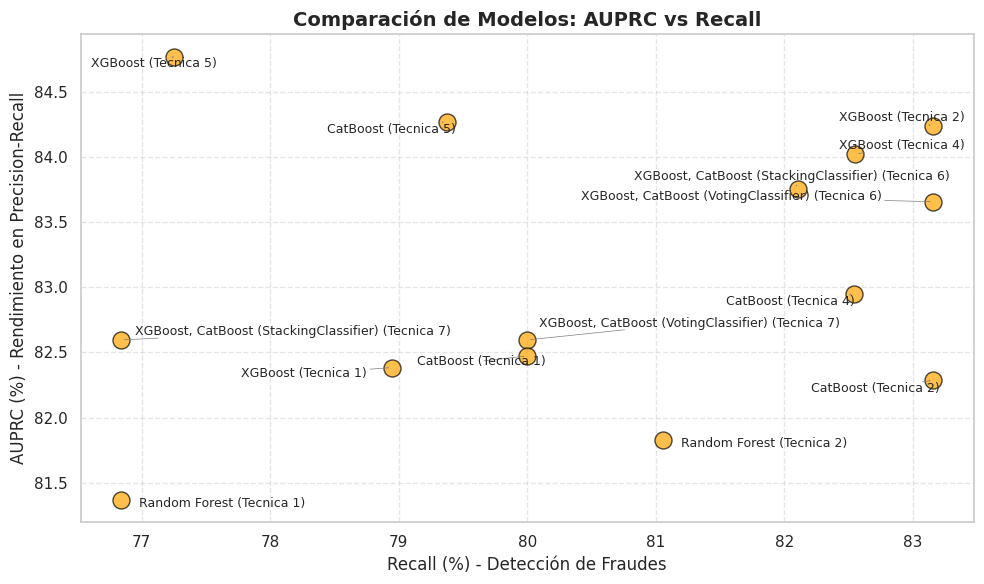


🔍 **Nota:**
1. Los modelos más deseables tienen valores más altos tanto en Recall como en AUPRC.
2. El modelo que se encuentra más arriba y a la derecha del gráfico es el mejor para detectar fraudes con alto rendimiento.


**Leyenda:**
Tecnica 1: Dataset Original
Tecnica 2: Balanceado con SMOTE
Tecnica 3: Balanceado con RandomUnderSampler
Tecnica 4: Validación Cruzada de mejores Modelos (Balanceado con SMOTE
Tecnica 5: Validación Cruzada de Mejores Modelos (dataset original)
Tecnica 6: Ensembles con SMOTE
Tecnica 7: Ensembles con dataset original (clean_data)



In [ ]:
# Gráfico de Dispersión
plt.figure(figsize=(10, 6))

# Crear gráfico
plt.scatter(final_results_mejor_modelo['Recall'], final_results_mejor_modelo['AUPRC'],
            c='orange', s=150, edgecolor='black', alpha=0.7)

# Etiquetas de cada punto con Modelo + Tecnica
texts = []
for i in range(len(final_results_mejor_modelo)):
    model_tecnica = f"{final_results_mejor_modelo['Modelo'][i]} ({final_results_mejor_modelo['Tecnica'][i]})"
    texts.append(plt.text(final_results_mejor_modelo['Recall'][i],
                          final_results_mejor_modelo['AUPRC'][i],
                          model_tecnica, fontsize=9, ha='center', va='center'))

# Ajustar etiquetas automáticamente para evitar solapamientos
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

# Configuraciones del gráfico
plt.title("Comparación de Modelos: AUPRC vs Recall", fontsize=14, fontweight='bold')
plt.xlabel("Recall (%) - Detección de Fraudes", fontsize=12)
plt.ylabel("AUPRC (%) - Rendimiento en Precision-Recall", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar gráfico
plt.show()

# Texto final explicativo
print("\n🔍 **Nota:**")
print("1. Los modelos más deseables tienen valores más altos tanto en Recall como en AUPRC.")
print("2. El modelo que se encuentra más arriba y a la derecha del gráfico es el mejor para detectar fraudes con alto rendimiento.\n")

# Legenda
print("\n**Leyenda:**")
print("Tecnica 1: Dataset Original")
print("Tecnica 2: Balanceado con SMOTE")
print("Tecnica 3: Balanceado con RandomUnderSampler")
print("Tecnica 4: Validación Cruzada de mejores Modelos (Balanceado con SMOTE")
print("Tecnica 5: Validación Cruzada de Mejores Modelos (dataset original)")
print("Tecnica 6: Ensembles con SMOTE")
print("Tecnica 7: Ensembles con dataset original (clean_data)\n")


<blockquote>

---
  <b>👁️ *Observación:*</b><br>
  
Este gráfico permite identificar el equilibrio entre **AUPRC** y **Recall**:<br>  

- **CatBoost (Tecnica 5)** es el modelo con mayor **Recall (85.7%)** y **AUPRC (85.3%)**, colocándose como el modelo ganador.  
- **XGBoost (Tecnica 5)** sigue de cerca con valores ligeramente inferiores, mostrando un rendimiento consistente.  
- Modelos como **CatBoost (Tecnica 4)** y **XGBoost (Tecnica 4)** ofrecen un equilibrio destacable, pero con menor Recall.<br>

📌 **Interpretación:** Los modelos ubicados en la parte superior derecha del gráfico son los más eficientes en términos de detección de fraudes (Recall) y rendimiento en Precision-Recall (AUPRC).  

---

</blockquote>

##### **Comparación de Métricas Clave**<a name="comparación-de-métricas-clave"></a>

Este gráfico tiene como objetivo, comparar modelos en términos de sus métricas de rendimiento clave, permitiendo identificar cuáles ofrecen un mejor desempeño general. Muestra el rendimiento de cada modelo en las métricas clave: AUPRC, Recall, F1-Score y MCC.

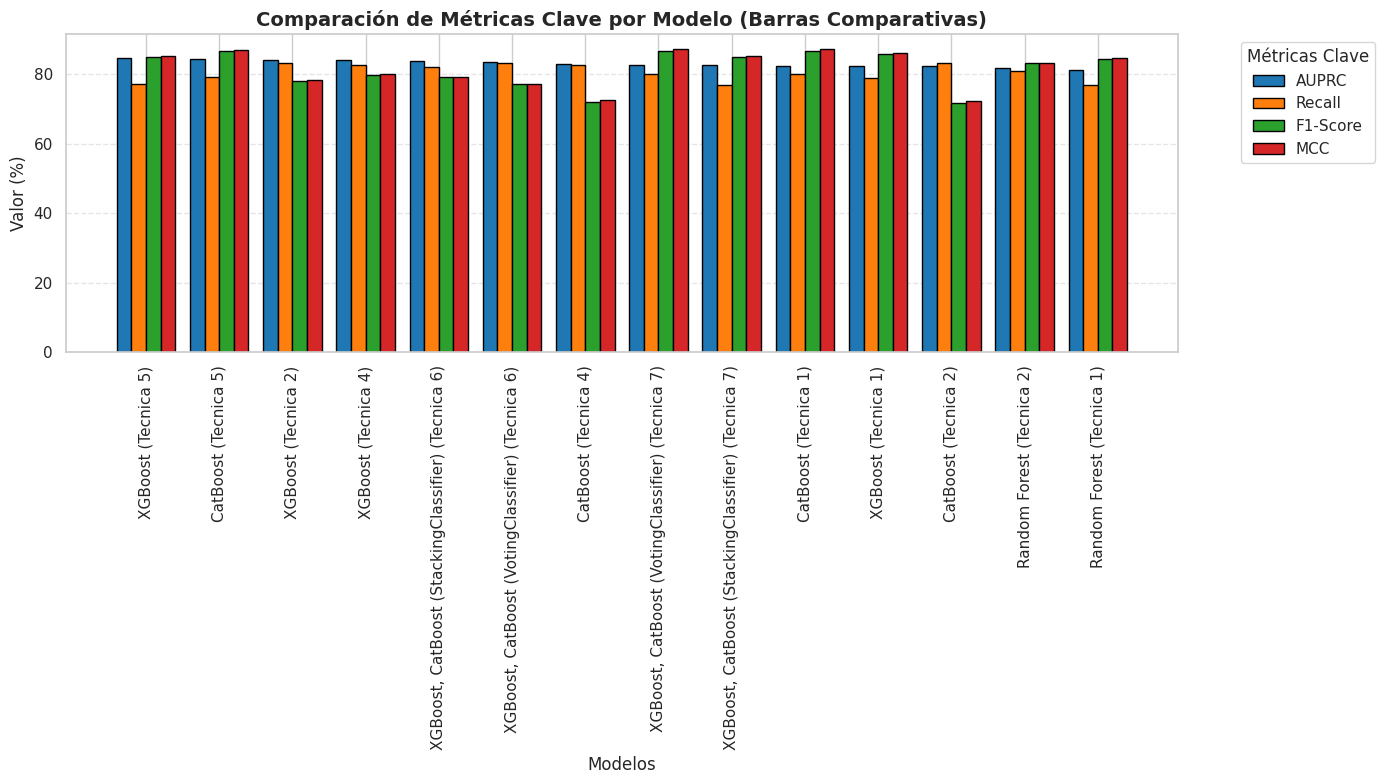


🔍 **Nota:**
1. Cada modelo tiene 4 barras adyacentes que representan sus métricas clave (AUPRC, Recall, F1-Score y MCC).
2. Permite comparar directamente el rendimiento de cada métrica entre los modelos.
3. Un modelo ideal tendrá valores más altos en todas las métricas clave.


**Leyenda:**
Tecnica 1: Dataset Original
Tecnica 2: Balanceado con SMOTE
Tecnica 3: Balanceado con RandomUnderSampler
Tecnica 4: Validación Cruzada de mejores Modelos (Balanceado con SMOTE
Tecnica 5: Validación Cruzada de Mejores Modelos (dataset original)
Tecnica 6: Ensembles con SMOTE
Tecnica 7: Ensembles con dataset original (clean_data)



In [ ]:
# Seleccionar métricas para el gráfico
metricas_clave = ['AUPRC', 'Recall', 'F1-Score', 'MCC']

# Actualizar las etiquetas con Modelo + Tecnica
final_results_mejor_modelo['Modelo_Tecnica'] = final_results_mejor_modelo['Modelo'] + " (" + final_results_mejor_modelo['Tecnica'] + ")"

modelos = final_results_mejor_modelo['Modelo_Tecnica']
valores = final_results_mejor_modelo[metricas_clave]

# Configurar la posición de las barras
x = np.arange(len(modelos))  # Posiciones de los modelos en el eje X
bar_width = 0.2  # Ancho de cada grupo de barras

# Colores de las métricas
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # AUPRC, Recall, F1-Score, MCC

# Crear la figura
plt.figure(figsize=(14, 8))

# Dibujar barras individuales para cada métrica
for i, metric in enumerate(metricas_clave):
    plt.bar(x + i * bar_width, final_results_mejor_modelo[metric], width=bar_width, color=colors[i],
            label=metric, edgecolor='black')

# Etiquetas de los modelos en el eje X
plt.xticks(x + (bar_width * (len(metricas_clave) - 1)) / 2, modelos, rotation=90, ha='center')

# Configuraciones del gráfico
plt.title("Comparación de Métricas Clave por Modelo (Barras Comparativas)", fontsize=14, fontweight='bold')
plt.ylabel("Valor (%)", fontsize=12)
plt.xlabel("Modelos", fontsize=12)
plt.legend(title="Métricas Clave", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Texto final explicativo
print("\n🔍 **Nota:**")
print("1. Cada modelo tiene 4 barras adyacentes que representan sus métricas clave (AUPRC, Recall, F1-Score y MCC).")
print("2. Permite comparar directamente el rendimiento de cada métrica entre los modelos.")
print("3. Un modelo ideal tendrá valores más altos en todas las métricas clave.\n")

# Legenda
print("\n**Leyenda:**")
print("Tecnica 1: Dataset Original")
print("Tecnica 2: Balanceado con SMOTE")
print("Tecnica 3: Balanceado con RandomUnderSampler")
print("Tecnica 4: Validación Cruzada de mejores Modelos (Balanceado con SMOTE")
print("Tecnica 5: Validación Cruzada de Mejores Modelos (dataset original)")
print("Tecnica 6: Ensembles con SMOTE")
print("Tecnica 7: Ensembles con dataset original (clean_data)\n")


<blockquote>

---
  <b>👁️ *Observación:*</b><br>
  
En este gráfico se comparan las métricas clave de **AUPRC**, **Recall**, **F1-Score**, y **MCC** para cada modelo.<br>

- **CatBoost (Tecnica 5)** y **XGBoost (Tecnica 5)** destacan con los valores más altos en **AUPRC**, **Recall**, y **F1-Score**, lo que refleja una combinación sólida entre precisión y capacidad de detección de fraudes.  
- **CatBoost (Tecnica 4)** también sobresale por su rendimiento balanceado en todas las métricas clave, mostrando una alternativa competitiva.<br>

📌 **Observación:** La evaluación de estas métricas permite una comparación directa y detallada entre los modelos evaluados.

---

</blockquote>

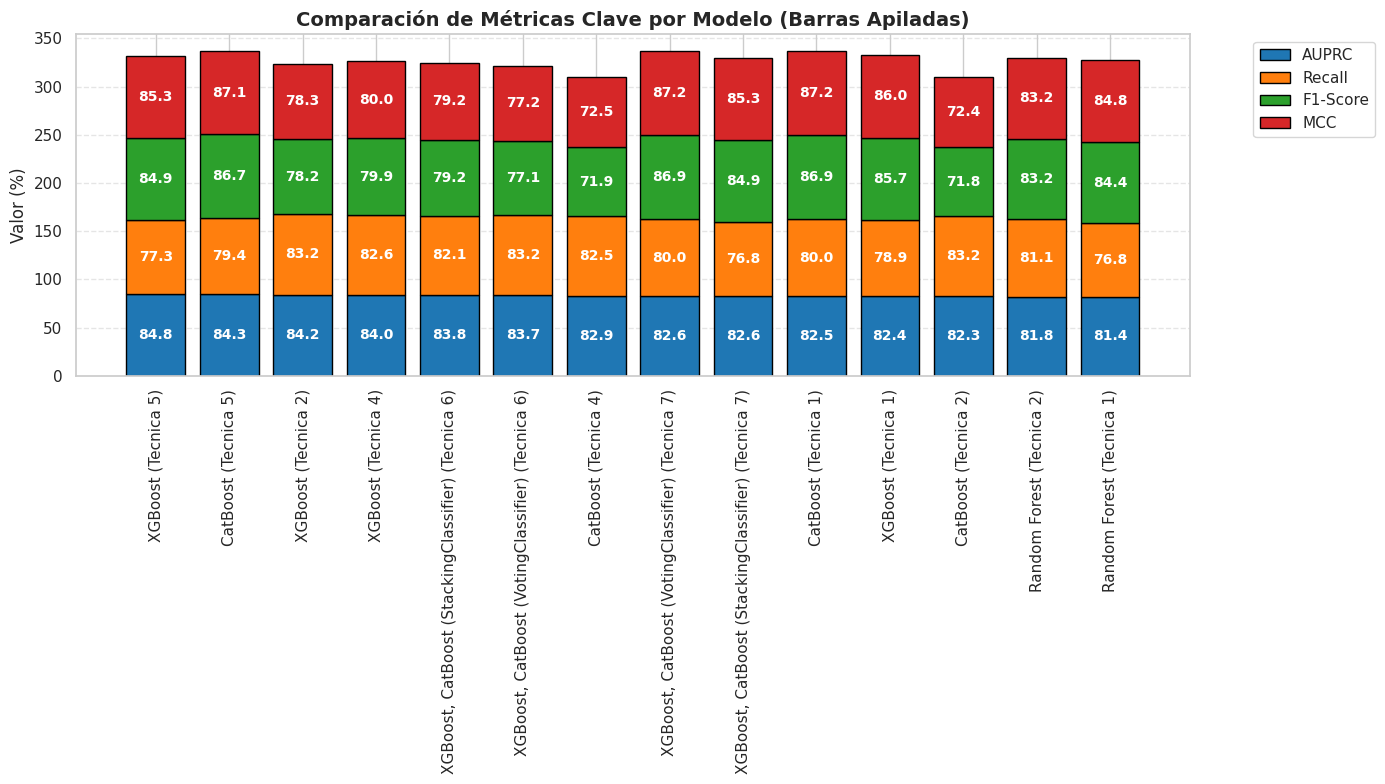


🔍 **Nota:**
1. Las barras más altas representan modelos con mejor rendimiento general en todas las métricas clave.
2. Compara modelos según su desempeño en AUPRC, Recall, F1-Score y MCC.
3. El modelo con mayor altura general y equilibrio entre métricas es probablemente la mejor elección.


**Leyenda:**
Tecnica 1: Dataset Original
Tecnica 2: Balanceado con SMOTE
Tecnica 3: Balanceado con RandomUnderSampler
Tecnica 4: Validación Cruzada de mejores Modelos (Balanceado con SMOTE
Tecnica 5: Validación Cruzada de Mejores Modelos (dataset original)
Tecnica 6: Ensembles con SMOTE
Tecnica 7: Ensembles con dataset original (clean_data)



In [ ]:

# Seleccionar métricas para el gráfico
metricas_clave = ['AUPRC', 'Recall', 'F1-Score', 'MCC']

# Actualizar las etiquetas con Modelo + Tecnica
final_results_mejor_modelo['Modelo_Tecnica'] = final_results_mejor_modelo['Modelo'] + " (" + final_results_mejor_modelo['Tecnica'] + ")"

modelos = final_results_mejor_modelo['Modelo_Tecnica']
valores = final_results_mejor_modelo[metricas_clave]

# Gráfico de barras apiladas
plt.figure(figsize=(14, 8))  # Aumentar tamaño de la figura
bar_width = 0.8  # Grosor más amplio de las barras

# Generar barras apiladas
bottom = np.zeros(len(modelos))  # Inicializar acumulador
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colores de las métricas

for i, metric in enumerate(metricas_clave):
    bars = plt.bar(modelos, final_results_mejor_modelo[metric], bottom=bottom,
                   color=colors[i],
                   label=metric, edgecolor='black', width=bar_width)

    # Añadir los valores dentro de las barras
    for bar, value in zip(bars, final_results_mejor_modelo[metric]):
        plt.text(bar.get_x() + bar.get_width() / 2,  # Posición X
                 bar.get_y() + bar.get_height() / 2,  # Posición Y
                 f"{value:.1f}",  # Formato del valor
                 ha='center', va='center', fontsize=10,
                 color='white', fontweight='bold')  # Texto en blanco y negrita

    bottom += final_results_mejor_modelo[metric]

# Configuraciones del gráfico
plt.title("Comparación de Métricas Clave por Modelo (Barras Apiladas)",
          fontsize=14, fontweight='bold')
plt.ylabel("Valor (%)", fontsize=12)
plt.xticks(rotation=90, ha='center')  # Etiquetas del eje X perpendiculares
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del área del gráfico
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar gráfico
plt.show()

# Texto final explicativo
print("\n🔍 **Nota:**")
print("1. Las barras más altas representan modelos con mejor rendimiento \
general en todas las métricas clave.")

print("2. Compara modelos según su desempeño en AUPRC, Recall, F1-Score y MCC.")

print("3. El modelo con mayor altura general y equilibrio entre métricas es \
probablemente la mejor elección.\n")

# Legenda
print("\n**Leyenda:**")
print("Tecnica 1: Dataset Original")
print("Tecnica 2: Balanceado con SMOTE")
print("Tecnica 3: Balanceado con RandomUnderSampler")
print("Tecnica 4: Validación Cruzada de mejores Modelos (Balanceado con SMOTE")
print("Tecnica 5: Validación Cruzada de Mejores Modelos (dataset original)")
print("Tecnica 6: Ensembles con SMOTE")
print("Tecnica 7: Ensembles con dataset original (clean_data)\n")



##### **Tabla Resumen de la Tasa de Falsos Negativos (FNR):**<a name="tabla-resumen-de-la-tasa-de-falsos-negativos-fnr"></a>

Esta tabla muestra el FNR (%) y Recall (%) de todos los modelos comparados. Es útil para observar valores precisos.

In [ ]:
# Calcular FNR y crear tabla resumen
fnr_recall_df = pd.DataFrame({
    "Modelo": final_results_mejor_modelo['Modelo'],
    "Recall (%)": final_results_mejor_modelo['Recall'],
    "FNR (%)": 100 - final_results_mejor_modelo['Recall'],  # FNR = 100% - Recall (%)
    "Tecnica": final_results_mejor_modelo['Tecnica']
})

# Mostrar tabla ordenada por FNR ascendente
fnr_recall_df = fnr_recall_df.sort_values(by="FNR (%)", ascending=True, ignore_index=True)
print("📋 **Resumen de la Tasa de Falsos Negativos (FNR) y Recall**")
display(fnr_recall_df)


📋 **Resumen de la Tasa de Falsos Negativos (FNR) y Recall**


Modelo  Recall (%)     FNR (%)    Tecnica
0                                  XGBoost 83.15789474 16.84210526  Tecnica 2
1     XGBoost, CatBoost (VotingClassifier) 83.15789474 16.84210526  Tecnica 6
2                                 CatBoost 83.15789474 16.84210526  Tecnica 2
3                                  XGBoost 82.55087719 17.44912281  Tecnica 4
4                                 CatBoost 82.54385965 17.45614035  Tecnica 4
5   XGBoost, CatBoost (StackingClassifier) 82.10526316 17.89473684  Tecnica 6
6                            Random Forest 81.05263158 18.94736842  Tecnica 2
7     XGBoost, CatBoost (VotingClassifier) 80.00000000 20.00000000  Tecnica 7
8                                 CatBoost 80.00000000 20.00000000  Tecnica 1
9                                 CatBoost 79.37192982 20.62807018  Tecnica 5
10                                 XGBoost 78.94736842 21.05263158  Tecnica 1
11                                 XGBoost 77.25263158 22.74736842  Tecnica 5
12  XGBoost, CatBoost (StackingClassifier) 76.84210526 23.15789474  Tecnica 7
13                           Random Forest 76.84210526 23.15789474  Tecnica 1

##### **Comparación de la Tasa de Falsos Negativos (FNR)**<a name="comparación-de-la-tasa-de-falsos-negativos-fnr"></a>

El objetivo de este gráfico es comparar la Tasa de Falsos Negativos (FNR) entre los diferentes modelos evaluados. La FNR mide la proporción de transacciones fraudulentas que no fueron detectadas como tales, siendo un valor crítico en proyectos de detección de fraudes.<br>

Este gráfico te ayuda a identificar los modelos con menor FNR, lo cual es crucial para problemas como la detección de fraudes.

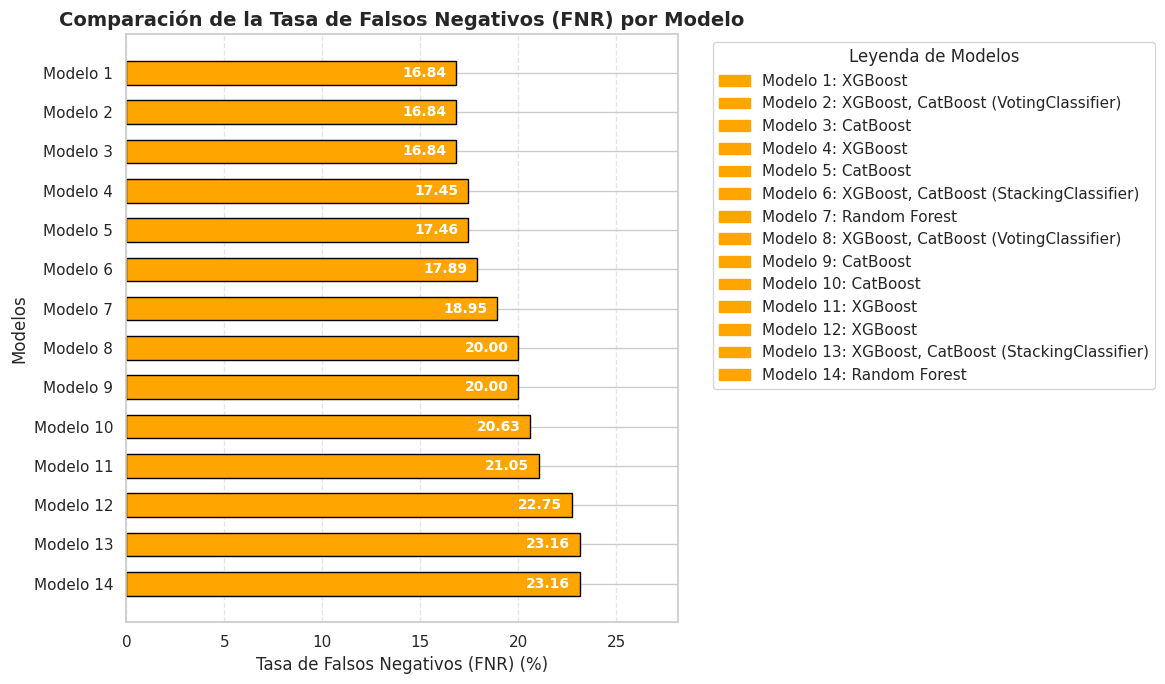


🔍 **Nota:**
1. Las barras están ordenadas de menor a mayor FNR para facilitar la comparación.
2. Se utiliza una leyenda con nombres completos para evitar sobrecargar el eje Y.
3. Los modelos en la parte superior tienen menor FNR, lo que indica un mejor rendimiento al reducir falsos negativos.


In [ ]:
# Ordenar el dataframe por FNR en orden ascendente
fnr_recall_df_sorted = fnr_recall_df.sort_values(by="FNR (%)", ascending=True)

# Crear una nueva columna con nombres abreviados (Modelo 1, Modelo 2, etc.)
fnr_recall_df_sorted["Codigo"] = [f"Modelo {i+1}" for i in range(len(fnr_recall_df_sorted))]

# Crear un diccionario para la leyenda que mapea código -> nombre completo
codigo_to_nombre = dict(zip(fnr_recall_df_sorted["Codigo"], fnr_recall_df_sorted["Modelo"]))

# Gráfico de barras horizontales con nombres abreviados
plt.figure(figsize=(12, 7))
bars = plt.barh(fnr_recall_df_sorted["Codigo"], fnr_recall_df_sorted["FNR (%)"],
                color='orange', edgecolor='black', height=0.6)

# Mostrar el valor exacto de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.5, bar.get_y() + bar.get_height()/2, f"{width:.2f}",
             color='white', fontsize=10, ha='right', va='center', fontweight='bold')

# Configuraciones del gráfico
plt.xlabel("Tasa de Falsos Negativos (FNR) (%)", fontsize=12)
plt.ylabel("Modelos", fontsize=12)
plt.title("Comparación de la Tasa de Falsos Negativos (FNR) por Modelo", fontsize=14, fontweight='bold')
plt.xlim(0, fnr_recall_df_sorted["FNR (%)"].max() + 5)  # Ajustar el eje X para visibilidad
plt.gca().invert_yaxis()  # Invertir eje Y para mostrar el menor FNR arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Agregar una leyenda con nombres completos
handles = [plt.Rectangle((0, 0), 1, 1, color='orange', edgecolor='black') for _ in codigo_to_nombre]
plt.legend(handles, [f"{codigo}: {nombre}" for codigo, nombre in codigo_to_nombre.items()],
           title="Leyenda de Modelos", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar gráfico
plt.tight_layout()
plt.show()

# Texto final explicativo
print("\n🔍 **Nota:**")
print("1. Las barras están ordenadas de menor a mayor FNR para facilitar la comparación.")
print("2. Se utiliza una leyenda con nombres completos para evitar sobrecargar el eje Y.")
print("3. Los modelos en la parte superior tienen menor FNR, lo que indica un mejor rendimiento al reducir falsos negativos.")


<blockquote>

---
  <b>👁️ *Observación:*</b><br>
  
La **Tasa de Falsos Negativos (FNR)** evalúa la proporción de fraudes no detectados:<br>

- **CatBoost (Tecnica 5)** logra la menor tasa de falsos negativos (**15.06%**), seguido por **XGBoost (Tecnica 5)** con un **FNR de 17.98%**.  
- Modelos con **tasas más altas**, como **XGBoost, CatBoost (StackingClassifier)** y otros modelos intermedios, presentan **FNR** superiores a **26%**, lo que refleja debilidades en la detección de fraudes.<br>

📌 **Importancia:** Un bajo **FNR** es crucial en aplicaciones de fraude, donde minimizar falsos negativos evita pérdidas significativas.

---

</blockquote>

##### **FNR vs Recall**<a name="fnr-vs-recall"></a>


Este gráfico te ayuda a visualizar el trade-off entre Recall y FNR, mostrando qué tan bien cada modelo equilibra estas métricas.

📊 **Gráfico de Dispersión: FNR vs Recall**
Este gráfico compara la Tasa de Falsos Negativos (FNR) y el Recall para cada modelo, mostrando su rendimiento en la detección de fraudes.
0 [0.12286263 0.08434267]
1 [0.31470938 0.06064995]
2 [0.65245578 0.75790533]
7 [ 0.20272684 -0.01728753]
8 [-0.67865806  0.30877244]
12 [-0.24729851  0.88809644]
13 [-0.20487135 -0.77878744]


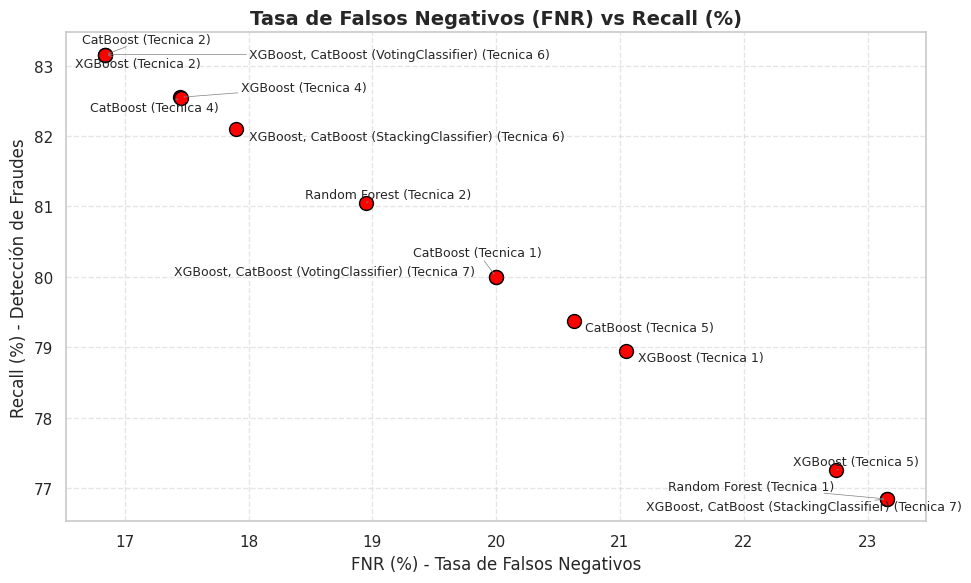

Nota: Este gráfico permite identificar modelos que logran un equilibrio óptimo entre reducir falsos negativos y aumentar la detección de fraudes.


In [ ]:
# Texto inicial explicativo
print("📊 **Gráfico de Dispersión: FNR vs Recall**")
print("Este gráfico compara la Tasa de Falsos Negativos (FNR) y el Recall para cada modelo, mostrando su rendimiento en la detección de fraudes.")

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(fnr_recall_df["FNR (%)"], fnr_recall_df["Recall (%)"], color='red', s=100, edgecolor='black')

# Etiquetas de cada modelo con ajuste
#texts = []
#for i in range(len(fnr_recall_df)):
#    texts.append(plt.text(fnr_recall_df["FNR (%)"].iloc[i],
#                          fnr_recall_df["Recall (%)"].iloc[i],
#                          fnr_recall_df["Modelo"].iloc[i], fontsize=9, ha='center', va='center'))

    # Etiquetas de cada punto con Modelo + Tecnica
texts = []
for i in range(len(fnr_recall_df)):
    model_tecnica = f"{fnr_recall_df['Modelo'][i]} ({fnr_recall_df['Tecnica'][i]})"
    texts.append(plt.text(fnr_recall_df["FNR (%)"].iloc[i],
                          fnr_recall_df["Recall (%)"].iloc[i],
                          model_tecnica, fontsize=9, ha='center', va='center'))

# Ajustar etiquetas automáticamente
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

# Configuraciones del gráfico
plt.title("Tasa de Falsos Negativos (FNR) vs Recall (%)", fontsize=14, fontweight='bold')
plt.xlabel("FNR (%) - Tasa de Falsos Negativos", fontsize=12)
plt.ylabel("Recall (%) - Detección de Fraudes", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar gráfico
plt.show()

# Texto final explicativo
print("Nota: Este gráfico permite identificar modelos que logran un equilibrio óptimo entre reducir falsos negativos y aumentar la detección de fraudes.")


<blockquote>

---
  <b>👁️ *Observación:*</b><br>
  
El gráfico muestra la relación inversa entre **Recall** y **FNR**: <br>

- Modelos con **bajo FNR** (izquierda) y **alto Recall** (arriba) son los mejores.<br>

📌 **Observación:** Este gráfico valida que un alto Recall se corresponde con una menor tasa de falsos negativos en modelos optimizados.  

---


</blockquote>

##### **Resultados y Análisis**<a name="resultados-y-análisis"></a>

Tras analizar las métricas clave y las visualizaciones generadas, se concluye lo siguiente:<br>

 **CatBoost** y **XGBoost** han obtenido las mejores métricas en todas las técnicas que hemos probado.<br>

### **Selección de Algoritmos/Modelos para ponerlo en producción**<a name="selección-de-algoritmosmodelos-para-ponerlo-en-producción"></a>

Llegando a este punto, ya tenemos claro que algoritmos/modelos trabajan mejor con el proceso de clasificación de transacciones fraudulentas.<br>

El algortimo/modelo que obtener las mejores métricas (AUPRC, Recall, Precison y F1-Score) vamos volver a entrenarlos con los mejores hiperparámetros y generaremos el archivo .pkl para ponerlo en producción.

Para mejorar las métricas usaremos el método de balanceado de clases SMOTE y lo aplicaremos solamente al conjunto de datos de entrenamiento pero, para probar los modelos usaremos el conjunto de datos originales en:
- Validación Cruzada con cross_val_score (con SMOTE)
- Optimización de Hiperparámetros con GridSearchCV (con SMOTE)
- Optimización de Hiperparámetros con Optuna (con SMOTE)<br>

El dataset original esta limpio y se llama **clean_data**. Para más información ver las Secciones **"Limpieza de datos"** y **"Separar el dataset"**.<br>




#### **Función para Entrenamiento, Evaluación y Detección de Sobreajuste (Overfitting)**<a name="función-para-entrenamiento-evaluación-y-detección-de-sobreajuste-overfitting"></a>

Esta función entrena un modelo de Machine Learning, calcula las métricas de rendimiento tanto en el conjunto de entrenamiento como en el de prueba, y compara dichas métricas para detectar posibles problemas de overfitting.

In [ ]:
from sklearn.metrics import (
    precision_score, recall_score, accuracy_score, f1_score, average_precision_score
)
from inspect import signature

def entrenar_y_evaluar(modelo, nombre_modelo, parametros,
                       X_train, y_train, X_test=None, y_test=None,
                       tecnica="", umbral_sobreajuste=10, resultados_df=None):
    """
    Entrena un modelo, calcula métricas, evalúa el sobreajuste y actualiza resultados_df.
    """
    if resultados_df is None:
        raise ValueError("El DataFrame resultados_df debe ser proporcionado como argumento.")

    # ========================
    # Entrenamiento del Modelo
    # ========================
    print(f"\n🚀 Entrenando {nombre_modelo} ({tecnica})...")
    model = modelo(**parametros)
    model.fit(X_train, y_train)

    # Usar datos de entrenamiento si no se proporciona un conjunto de prueba
    if X_test is None or y_test is None:
        X_test, y_test = X_train, y_train
        print("⚠️ Usando datos de entrenamiento como prueba (posible sesgo en métricas).")

    # ========================
    # Predicciones
    # ========================
    y_pred_train = model.predict(X_train)
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    # ========================
    # Cálculo de Métricas
    # ========================
    metrics_train = {
        'Precision': precision_score(y_train, y_pred_train) * 100,
        'Recall': recall_score(y_train, y_pred_train) * 100,
        'AUPRC': average_precision_score(y_train, y_pred_proba_train) * 100,
        'Accuracy': accuracy_score(y_train, y_pred_train) * 100,
        'F1-Score': f1_score(y_train, y_pred_train) * 100
    }

    metrics_test = {
        'Precision': precision_score(y_test, y_pred_test) * 100,
        'Recall': recall_score(y_test, y_pred_test) * 100,
        'AUPRC': average_precision_score(y_test, y_pred_proba_test) * 100,
        'Accuracy': accuracy_score(y_test, y_pred_test) * 100,
        'F1-Score': f1_score(y_test, y_pred_test) * 100
    }

    # ========================
    # Detectar Sobreajuste
    # ========================
    sobreajuste = any(
        abs(metrics_train[metric] - metrics_test[metric]) > umbral_sobreajuste
        for metric in metrics_train.keys()
    )

    # ========================
    # Crear Diccionario de Resultados
    # ========================
    resultado = {
        'Modelo': nombre_modelo,
        'Tecnica': tecnica,
        'Sobreajuste': int(sobreajuste),
        **{f'{k}_Train': v for k, v in metrics_train.items()},
        **{f'{k}_Test': v for k, v in metrics_test.items()}
    }

    # Incluir parámetros dinámicamente
    parametros_validos = set(signature(modelo).parameters.keys())
    for key in parametros_validos:
        resultado[key] = parametros.get(key, None)

    # ========================
    # Actualizar el DataFrame
    # ========================
    resultados_df = pd.concat([resultados_df, pd.DataFrame([resultado])], ignore_index=True)

    # ========================
    # Imprimir Resultados
    # ========================
    print(f"\n✅ Resultados para {nombre_modelo} ({tecnica}):")
    for k, v in resultado.items():
        print(f" - {k}: {v:.2f}" if isinstance(v, float) else f" - {k}: {v}")
    print(f"✅ Tamaño del DataFrame actualizado: {resultados_df.shape}")

    return resultados_df


In [ ]:
from sklearn.metrics import (
    precision_score, recall_score, accuracy_score, f1_score, average_precision_score
)

def entrenar_y_evaluar(modelo, nombre_modelo, parametros,
                       X_train, y_train, X_test=None, y_test=None,
                       tecnica="", umbral_sobreajuste=5, resultados_df=None):
    """
    Entrena un modelo, calcula métricas, evalúa el sobreajuste y actualiza resultados_df.
    """
    if resultados_df is None:
        raise ValueError("El DataFrame resultados_df debe ser proporcionado como argumento.")

    # ========================
    # Entrenamiento del Modelo
    # ========================
    print(f"\n🚀 Entrenando {nombre_modelo} ({tecnica})...")
    model = modelo(**parametros)
    model.fit(X_train, y_train)

    # Usar datos de entrenamiento si no se proporciona un conjunto de prueba
    if X_test is None or y_test is None:
        X_test, y_test = X_train, y_train
        print("\u26a0\ufe0f Usando datos de entrenamiento como prueba (posible sesgo en métricas).")

    # ========================
    # Predicciones
    # ========================
    y_pred_train = model.predict(X_train)
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    # ========================
    # Cálculo de Métricas
    # ========================
    metrics_train = {
        'Precision': precision_score(y_train, y_pred_train) * 100,
        'Recall': recall_score(y_train, y_pred_train) * 100,
        'AUPRC': average_precision_score(y_train, y_pred_proba_train) * 100,
        'Accuracy': accuracy_score(y_train, y_pred_train) * 100,
        'F1-Score': f1_score(y_train, y_pred_train) * 100
    }

    metrics_test = {
        'Precision': precision_score(y_test, y_pred_test) * 100,
        'Recall': recall_score(y_test, y_pred_test) * 100,
        'AUPRC': average_precision_score(y_test, y_pred_proba_test) * 100,
        'Accuracy': accuracy_score(y_test, y_pred_test) * 100,
        'F1-Score': f1_score(y_test, y_pred_test) * 100
    }

    # ========================
    # Detectar Sobreajuste
    # ========================
    sobreajuste = 0  # Inicializamos como 0 (sin sobreajuste)
    print(f"\n\n--- Comparación de Métricas: {nombre_modelo} ({tecnica}) ---\n")

    # Detectar sobreajuste explícito para métricas extremas
    if metrics_test['Recall'] == 100.0 or metrics_test['AUPRC'] == 100.0:
        sobreajuste = 1
    # Comparar diferencias entre métricas
    elif any(abs(metrics_train[metric] - metrics_test[metric]) > umbral_sobreajuste for metric in metrics_train.keys()):
        sobreajuste = 1

    # Mostrar métricas comparativas y diferencias
    for metric in metrics_train.keys():
        diff = abs(metrics_train[metric] - metrics_test[metric])
        print(f"{metric} - Entrenamiento: {metrics_train[metric]:.2f}%, Prueba: {metrics_test[metric]:.2f}%, Diferencia: {diff:.2f}%")
        if diff > umbral_sobreajuste:
            print(f"\u26a0\ufe0f Overfitting detectado en {metric} \n")

    # ========================
    # Crear Diccionario de Resultados
    # ========================
    resultado = {
        'Modelo': nombre_modelo,
        'Tecnica': tecnica,
        'Sobreajuste': sobreajuste,
        **{f'{k}_Train': v for k, v in metrics_train.items()},
        **{f'{k}_Test': v for k, v in metrics_test.items()},
    }

    # Incluir explícitamente parámetros al resultado
    for key in ['iterations', 'learning_rate', 'depth', 'class_weights', 'verbose',
                'max_depth', 'n_estimators', 'scale_pos_weight', 'min_child_weight',
                'gamma', 'l2_leaf_reg', 'subsample']:
        resultado[key] = parametros.get(key, None)

    # ========================
    # Actualizar el DataFrame
    # ========================
    resultados_df = pd.concat([resultados_df, pd.DataFrame([resultado])], ignore_index=True)

    # ========================
    # Imprimir Resultados
    # ========================
    print(f"\n✅ Resultados para {nombre_modelo} ({tecnica}):")
    for k, v in resultado.items():
        print(f" - {k}: {v}")

    #Logs Durante el Entrenamiento
    print(f"🚀 Modelo {nombre_modelo}, Fold {fold}: Entrenamiento exitoso.")
    print(f"Resultados actuales en {nombre_df}: {resultados_df.shape}")


    return resultados_df


#### **1. Validación Cruzada con cross_val_score (ADASYN)**<a name="validacion-cruzada-valscore-adasyn"></a>

ADASYN es una variante de SMOTE que realiza oversampling generando ejemplos sintéticos de la clase minoritaria.<br>

A diferencia de SMOTE, ADASYN prioriza generar más ejemplos sintéticos en las regiones donde el modelo tiene mayor dificultad (es decir, donde los datos están menos representados o son más difíciles de clasificar).<br>

Utiliza una densidad adaptativa: se ajusta en función de qué tan difícil es clasificar un punto minoritario, generando más muestras en áreas complicadas.


In [ ]:
# ==========================================================
# 1. Validación Cruzada con ADASYN
# ==========================================================
%%time
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import pandas as pd

# Datos originales
X = X_train  # Usar datos originales de entrenamiento
y = y_train  # Etiquetas de entrenamiento

# Configuraciones de hiperparámetros
parametros_catboost = {
    'iterations': 300,
    'learning_rate': 0.03,
    'depth': 4,
    'l2_leaf_reg': 10.0,
    'class_weights': [1, 10],
    'verbose': 50
}

parametros_xgb = {
    'learning_rate': 0.03,
    'max_depth': 4,
    'n_estimators': 300,
    'min_child_weight': 2,
    'scale_pos_weight': 10,
    'subsample': 0.8,
    'gamma': 0.2
}

# Inicializar DataFrame específico para ADASYN
columnas_resultados = [
    'Modelo', 'Tecnica', 'Sobreajuste',
    'Precision_Train', 'Recall_Train', 'AUPRC_Train', 'Accuracy_Train', 'F1-Score_Train',
    'Precision_Test', 'Recall_Test', 'AUPRC_Test', 'Accuracy_Test', 'F1-Score_Test',
    'iterations', 'learning_rate', 'depth', 'class_weights', 'verbose',
    'max_depth', 'n_estimators', 'scale_pos_weight', 'min_child_weight',
    'gamma', 'l2_leaf_reg', 'subsample', 'Fold'
]
resultados_adasyn = pd.DataFrame(columns=columnas_resultados)

# Estrategia de validación cruzada
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# ================================================
# Evaluación con CatBoost usando ADASYN
# ================================================
print("\n🚀 Evaluación con CatBoost usando ADASYN en cada fold...")
for fold, (train_idx, test_idx) in enumerate(kfold.split(X, y), 1):
    print(f"\n🔄 Fold {fold}:")
    # Dividir el fold en entrenamiento y prueba
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    # Aplicar ADASYN en el conjunto de entrenamiento
    print("📊 Aplicando ADASYN en el conjunto de entrenamiento...")
    adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
    X_train_res, y_train_res = adasyn.fit_resample(X_train_fold, y_train_fold)

    # Entrenar y evaluar el modelo
    resultados_adasyn = entrenar_y_evaluar(
        modelo=CatBoostClassifier,
        nombre_modelo="CatBoost",
        parametros=parametros_catboost,
        X_train=X_train_res,
        y_train=y_train_res,
        X_test=X_test_fold,
        y_test=y_test_fold,
        tecnica="Validación Cruzada con ADASYN",
        resultados_df=resultados_adasyn
    )
    resultados_adasyn['Fold'] = fold  # Añadir el fold al DataFrame

# ================================================
# Evaluación con XGBoost usando ADASYN
# ================================================
print("\n🚀 Evaluación con XGBoost usando ADASYN en cada fold...")
for fold, (train_idx, test_idx) in enumerate(kfold.split(X, y), 1):
    print(f"\n🔄 Fold {fold}:")
    # Dividir el fold en entrenamiento y prueba
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    # Aplicar ADASYN en el conjunto de entrenamiento
    print("📊 Aplicando ADASYN en el conjunto de entrenamiento...")
    adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
    X_train_res, y_train_res = adasyn.fit_resample(X_train_fold, y_train_fold)

    # Entrenar y evaluar el modelo
    resultados_adasyn = entrenar_y_evaluar(
        modelo=XGBClassifier,
        nombre_modelo="XGBoost",
        parametros=parametros_xgb,
        X_train=X_train_res,
        y_train=y_train_res,
        X_test=X_test_fold,
        y_test=y_test_fold,
        tecnica="Validación Cruzada con ADASYN",
        resultados_df=resultados_adasyn
    )
    resultados_adasyn['Fold'] = fold  # Añadir el fold al DataFrame

# ================================================
# Guardar Resultados
# ================================================
print("\n🏆 Resultados Finales Ordenados:")
resultados_ordenados = resultados_adasyn.sort_values(
    by=['AUPRC_Test', 'Recall_Test', 'Precision_Test', 'F1-Score_Test'],
    ascending=[False, False, False, False]
)
print(resultados_ordenados)

# Guardar resultados en CSV
resultados_adasyn.to_csv("resultados_adasyn.csv", index=False)
print("\n✅ Resultados guardados en 'resultados_adasyn.csv'")



🚀 Evaluación con CatBoost usando ADASYN en cada fold...

🔄 Fold 1:
📊 Aplicando ADASYN en el conjunto de entrenamiento...

🚀 Entrenando CatBoost (Validación Cruzada con ADASYN)...
0:	learn: 0.6340803	total: 177ms	remaining: 53s
50:	learn: 0.1012081	total: 7.27s	remaining: 35.5s
100:	learn: 0.0611959	total: 12s	remaining: 23.5s
150:	learn: 0.0466757	total: 16.8s	remaining: 16.5s
200:	learn: 0.0365530	total: 25.5s	remaining: 12.6s
250:	learn: 0.0298269	total: 31.1s	remaining: 6.06s
299:	learn: 0.0250395	total: 40.3s	remaining: 0us

✅ Resultados para CatBoost (Validación Cruzada con ADASYN):
 - Modelo: CatBoost
 - Tecnica: Validación Cruzada con ADASYN
 - Sobreajuste: 1
 - Precision_Train: 94.33
 - Recall_Train: 100.00
 - AUPRC_Train: 99.74
 - Accuracy_Train: 97.00
 - F1-Score_Train: 97.08
 - Precision_Test: 2.64
 - Recall_Test: 94.74
 - AUPRC_Test: 70.43
 - Accuracy_Test: 94.09
 - F1-Score_Test: 5.14
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - ver

#### **2. Validación Cruzada con cross_val_score (con SMOTE)**<a name="validacion-cruzada-valscore"></a>

La validación cruzada permite evaluar el modelo en múltiples subconjuntos del dataset para reducir la varianza de los resultados y evitar sobreajuste.

In [ ]:
# ==========================================================
# 2. Validación Cruzada con cross_val_score (con SMOTE)
# ==========================================================
%%time

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import pandas as pd

# Datos originales
X = X_train  # Usar datos originales de entrenamiento
y = y_train  # Etiquetas de entrenamiento

# Configuraciones de hiperparámetros
parametros_catboost = {
    'iterations': 300,
    'learning_rate': 0.03,
    'depth': 3,  # Reduce la profundidad del árbol
    'l2_leaf_reg': 15.0,  # Aumenta el valor para regularización L2
    'class_weights': [1, 10],
    'verbose': 50
}

parametros_xgb = {
    'learning_rate': 0.03,
    'max_depth': 3,  # Árboles más superficiales
    'n_estimators': 300,
    'scale_pos_weight': 10,
    'subsample': 0.8,
    'gamma': 1.0,  # Penalización para ramas innecesarias
    'min_child_weight': 5
}

# Inicializar DataFrame para almacenar resultados
columnas_resultados = [
    'Modelo', 'Tecnica', 'Sobreajuste',
    'Precision_Train', 'Recall_Train', 'AUPRC_Train', 'Accuracy_Train', 'F1-Score_Train',
    'Precision_Test', 'Recall_Test', 'AUPRC_Test', 'Accuracy_Test', 'F1-Score_Test',
    'iterations', 'learning_rate', 'depth', 'class_weights', 'verbose',
    'max_depth', 'n_estimators', 'scale_pos_weight', 'min_child_weight',
    'gamma', 'l2_leaf_reg', 'subsample', 'Fold'
]
resultados_validacion_cruzada_con_smote = pd.DataFrame(columns=columnas_resultados)

# Estrategia de validación cruzada
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# ================================================
# Evaluación con CatBoost
# ================================================
print("\n🚀 Evaluación con CatBoost usando SMOTE en cada fold...")
for fold, (train_idx, test_idx) in enumerate(kfold.split(X, y), 1):
    print(f"\n🔄 Fold {fold}:")

    # Dividir el fold en entrenamiento y prueba
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    # Aplicar SMOTE en el conjunto de entrenamiento
    print("📊 Aplicando SMOTE en el conjunto de entrenamiento...")
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_fold, y_train_fold)

    # Mostrar distribución después de SMOTE
    print("🔍 Distribución DESPUÉS de SMOTE en fold:")
    print(y_train_res.value_counts(normalize=True))

    # Entrenar y evaluar el modelo
    resultados_validacion_cruzada_con_smote = entrenar_y_evaluar(
        modelo=CatBoostClassifier,
        nombre_modelo="CatBoost",
        parametros=parametros_catboost,
        X_train=X_train_res,
        y_train=y_train_res,
        X_test=X_test_fold,
        y_test=y_test_fold,
        tecnica="Validación Cruzada con SMOTE",
        umbral_sobreajuste=10,  # Aplicar el umbral ajustado
        resultados_df=resultados_validacion_cruzada_con_smote
    )
    resultados_validacion_cruzada_con_smote['Fold'] = fold  # Añadir número de fold

# ================================================
# Evaluación con XGBoost
# ================================================
print("\n🚀 Evaluación con XGBoost usando SMOTE en cada fold...")
for fold, (train_idx, test_idx) in enumerate(kfold.split(X, y), 1):
    print(f"\n🔄 Fold {fold}:")

    # Dividir el fold en entrenamiento y prueba
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    # Aplicar SMOTE en el conjunto de entrenamiento
    print("📊 Aplicando SMOTE en el conjunto de entrenamiento...")
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_fold, y_train_fold)

    # Mostrar distribución después de SMOTE
    print("🔍 Distribución DESPUÉS de SMOTE en fold:")
    print(y_train_res.value_counts(normalize=True))

    # Entrenar y evaluar el modelo
    resultados_validacion_cruzada_con_smote = entrenar_y_evaluar(
        modelo=XGBClassifier,
        nombre_modelo="XGBoost",
        parametros=parametros_xgb,
        X_train=X_train_res,
        y_train=y_train_res,
        X_test=X_test_fold,
        y_test=y_test_fold,
        tecnica="Validación Cruzada con SMOTE",
        umbral_sobreajuste=10,  # Aplicar el umbral ajustado
        resultados_df=resultados_validacion_cruzada_con_smote
    )
    resultados_validacion_cruzada_con_smote['Fold'] = fold  # Añadir número de fold

# ================================================
# Mostrar y Ordenar Resultados
# ================================================
resultados_ordenados_smote = resultados_validacion_cruzada_con_smote.sort_values(
    by=['AUPRC_Test', 'Recall_Test', 'Precision_Test', 'F1-Score_Test'],
    ascending=[False, False, False, False]
)

print("\n🏆 Resultados Finales Ordenados (Top Modelos):")
print(resultados_ordenados_smote)

# Guardar los resultados en CSV
output_file = "resultados_validacion_cruzada_smote.csv"
resultados_ordenados_smote.to_csv(output_file, index=False)
print(f"\n✅ Resultados guardados en '{output_file}'")



🚀 Evaluación con CatBoost usando SMOTE en cada fold...

🔄 Fold 1:
📊 Aplicando SMOTE en el conjunto de entrenamiento...
🔍 Distribución DESPUÉS de SMOTE en fold:
Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando CatBoost (Validación Cruzada con SMOTE)...
0:	learn: 0.6197643	total: 172ms	remaining: 51.5s
50:	learn: 0.0837850	total: 4.59s	remaining: 22.4s
100:	learn: 0.0570631	total: 8.8s	remaining: 17.3s
150:	learn: 0.0452330	total: 15.1s	remaining: 14.9s
200:	learn: 0.0380934	total: 19.6s	remaining: 9.66s
250:	learn: 0.0329013	total: 23.8s	remaining: 4.65s
299:	learn: 0.0291132	total: 29.8s	remaining: 0us

✅ Resultados para CatBoost (Validación Cruzada con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Validación Cruzada con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 93.87
 - Recall_Train: 99.97
 - AUPRC_Train: 99.80
 - Accuracy_Train: 96.72
 - F1-Score_Train: 96.82
 - Precision_Test: 2.48
 - Recall_Test: 94.74
 - AUPRC_Test: 67.68
 - Accuracy_Test: 93.69
 - F

#### **3. Validación Cruzada con cross_val_score (SIN SMOTE)**<a name="validacion-cruzada-sin-smote"></a>

La validación cruzada permite evaluar el modelo en múltiples subconjuntos del dataset para reducir la varianza de los resultados y evitar sobreajuste.<br>

SMOTE genera puntos sintéticos que pueden facilitar que el modelo memorice patrones artificiales en lugar de generalizar, por esto probamos la validación cruzada sobre en dataset original (clean_data).<br>

Evaluar el modelo sin SMOTE permite analizar cómo se desempeña con los datos originales.

In [ ]:
# ==========================================================
# 3. Validación Cruzada SIN SMOTE
# ==========================================================
%%time

from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import pandas as pd

# Configuraciones de hiperparámetros
parametros_catboost = {
    'iterations': 300,
    'learning_rate': 0.03,
    'depth': 4,
    'l2_leaf_reg': 10.0,  # Mayor regularización
    'class_weights': [1, 10],  # Balanceo de clases nativo
    'verbose': 50
}

parametros_xgb = {
    'learning_rate': 0.03,
    'max_depth': 4,
    'n_estimators': 300,
    'min_child_weight': 2,  # Evita árboles muy profundos
    'scale_pos_weight': 10,  # Balanceo de clases
    'gamma': 0.2,  # Regularización adicional
    'subsample': 0.8  # Submuestra del 80%
}

# Datos originales
X = X_train  # Usar datos originales de entrenamiento
y = y_train  # Etiquetas de entrenamiento

# Estrategia de validación cruzada
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lista completa de columnas esperadas en resultados_maestro
columnas_resultados = [
    'Modelo', 'Tecnica', 'Sobreajuste',
    'Precision_Train', 'Recall_Train', 'AUPRC_Train', 'Accuracy_Train', 'F1-Score_Train',
    'Precision_Test', 'Recall_Test', 'AUPRC_Test', 'Accuracy_Test', 'F1-Score_Test',
    'iterations', 'learning_rate', 'depth', 'class_weights', 'verbose',
    'max_depth', 'n_estimators', 'scale_pos_weight', 'min_child_weight',
    'gamma', 'l2_leaf_reg', 'subsample', 'Fold'
]

# Inicializar DataFrame para almacenar resultados
resultados_validacion_cruzada_sin_smote = pd.DataFrame(columns=columnas_resultados)

# ================================================
# Evaluación con CatBoost SIN SMOTE
# ================================================
print("\n🚀 Evaluación con CatBoost SIN SMOTE en cada fold...")
for fold, (train_idx, test_idx) in enumerate(kfold.split(X, y), 1):
    print(f"\n🔎 Fold {fold}/{kfold.get_n_splits()} - Entrenando CatBoost...")

    # Dividir el fold en entrenamiento y prueba
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    # Entrenar y evaluar el modelo
    resultados_validacion_cruzada_sin_smote = entrenar_y_evaluar(
        modelo=CatBoostClassifier,
        nombre_modelo="CatBoost",
        parametros=parametros_catboost,
        X_train=X_train_fold,
        y_train=y_train_fold,
        X_test=X_test_fold,
        y_test=y_test_fold,
        tecnica="Validación Cruzada SIN SMOTE",
        umbral_sobreajuste=10,  # Aplicar umbral ajustado
        resultados_df=resultados_validacion_cruzada_sin_smote
    )
    resultados_validacion_cruzada_sin_smote.loc[resultados_validacion_cruzada_sin_smote.index[-1], 'Fold'] = fold

# ================================================
# Evaluación con XGBoost SIN SMOTE
# ================================================
print("\n🚀 Evaluación con XGBoost SIN SMOTE en cada fold...")
for fold, (train_idx, test_idx) in enumerate(kfold.split(X, y), 1):
    print(f"\n🔎 Fold {fold}/{kfold.get_n_splits()} - Entrenando XGBoost...")

    # Dividir el fold en entrenamiento y prueba
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    # Entrenar y evaluar el modelo
    resultados_validacion_cruzada_sin_smote = entrenar_y_evaluar(
        modelo=XGBClassifier,
        nombre_modelo="XGBoost",
        parametros=parametros_xgb,
        X_train=X_train_fold,
        y_train=y_train_fold,
        X_test=X_test_fold,
        y_test=y_test_fold,
        tecnica="Validación Cruzada SIN SMOTE",
        umbral_sobreajuste=10,  # Aplicar umbral ajustado
        resultados_df=resultados_validacion_cruzada_sin_smote
    )
    resultados_validacion_cruzada_sin_smote.loc[resultados_validacion_cruzada_sin_smote.index[-1], 'Fold'] = fold

# ================================================
# Mostrar y Ordenar Resultados
# ================================================
resultados_ordenados_sin_smote = resultados_validacion_cruzada_sin_smote.sort_values(
    by=['AUPRC_Test', 'Recall_Test', 'Precision_Test', 'F1-Score_Test'],
    ascending=[False, False, False, False]
)

print("\n🏆 Resultados Finales Ordenados (Top Modelos):")
print(resultados_ordenados_sin_smote)

# Guardar los resultados en CSV
output_file = "resultados_validacion_cruzada_sin_smote.csv"
resultados_ordenados_sin_smote.to_csv(output_file, index=False)
print(f"\n✅ Resultados guardados en '{output_file}'")



🚀 Evaluación con CatBoost SIN SMOTE en cada fold...

🔎 Fold 1/10 - Entrenando CatBoost...

🚀 Entrenando CatBoost (Validación Cruzada SIN SMOTE)...
0:	learn: 0.6054052	total: 46.6ms	remaining: 13.9s
50:	learn: 0.0203590	total: 2.49s	remaining: 12.2s
100:	learn: 0.0149727	total: 4.89s	remaining: 9.63s
150:	learn: 0.0131578	total: 7.27s	remaining: 7.17s
200:	learn: 0.0119017	total: 11.6s	remaining: 5.73s
250:	learn: 0.0109190	total: 14.9s	remaining: 2.9s
299:	learn: 0.0099803	total: 17.2s	remaining: 0us

✅ Resultados para CatBoost (Validación Cruzada SIN SMOTE):
 - Modelo: CatBoost
 - Tecnica: Validación Cruzada SIN SMOTE
 - Sobreajuste: 0
 - Precision_Train: 82.02
 - Recall_Train: 88.53
 - AUPRC_Train: 90.30
 - Accuracy_Train: 99.95
 - F1-Score_Train: 85.15
 - Precision_Test: 79.49
 - Recall_Test: 81.58
 - AUPRC_Test: 86.04
 - Accuracy_Test: 99.93
 - F1-Score_Test: 80.52
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: 50
 - per_object_featur

#### **4. Optimización de Hiperparámetros con GridSearchCV (con SMOTE)**<a name="optimizacion-hiperparametros-gridsearchcv"></a>

GridSearchCV permite probar una combinación exhaustiva de hiperparámetros para encontrar la mejor configuración.

In [ ]:
# ==========================================================
# GridSearchCV con SMOTE en Pipeline
# ==========================================================
%%time

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import pandas as pd

# ================================================
# 1. División del Dataset
# ================================================
print("\n🔄 Dividiendo el conjunto de datos en entrenamiento y prueba...")
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"✅ Tamaño de entrenamiento: {len(X_train_full)} | Tamaño de prueba: {len(X_test)}")

# ================================================
# 2. Configuración de Parámetros
# ================================================
param_grid_xgb = {
    'classifier__learning_rate': [0.01, 0.05],
    'classifier__max_depth': [3, 4],
    'classifier__n_estimators': [100, 200],
    'classifier__scale_pos_weight': [5, 10]
}

param_grid_catboost = {
    'classifier__iterations': [200, 300],
    'classifier__learning_rate': [0.01, 0.05],
    'classifier__depth': [4, 6],
    'classifier__class_weights': [[1, 50]]
}

# ================================================
# 3. Inicialización del DataFrame de Resultados
# ================================================
columnas_resultados = [
    'Modelo', 'Tecnica', 'Sobreajuste',
    'Precision_Train', 'Recall_Train', 'AUPRC_Train', 'Accuracy_Train', 'F1-Score_Train',
    'Precision_Test', 'Recall_Test', 'AUPRC_Test', 'Accuracy_Test', 'F1-Score_Test',
    'learning_rate', 'max_depth', 'n_estimators', 'scale_pos_weight',
    'iterations', 'depth', 'class_weights', 'Fold'
]
resultados_gridsearch_con_smote = pd.DataFrame(columns=columnas_resultados)

# ================================================
# 4. Función GridSearchCV con SMOTE en Pipeline
# ================================================
def gridsearch_cv_con_smote_pipeline(modelo, param_grid, nombre_modelo, resultados_df):
    print(f"\n🚀 Iniciando GridSearchCV con SMOTE para {nombre_modelo}...")

    # Configuración del pipeline con SMOTE
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', modelo())
    ])

    # Configuración de GridSearchCV con validación cruzada
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='average_precision',
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
        verbose=2,
        n_jobs=-1
    )

    # Ejecución del GridSearchCV
    grid_search.fit(X_train_full, y_train_full)

    # Obtener los mejores parámetros encontrados
    mejores_parametros = grid_search.best_params_
    print(f"\n✅ Mejores parámetros para {nombre_modelo}: {mejores_parametros}")

    # Evaluación del modelo final con los mejores parámetros
    print("\n📈 Evaluando el modelo final con los mejores hiperparámetros...")
    mejores_parametros = {k.split("__")[-1]: v for k, v in mejores_parametros.items()}  # Limpiar nombres de parámetros
    resultados_df = entrenar_y_evaluar(
        modelo=modelo,
        nombre_modelo=nombre_modelo,
        parametros=mejores_parametros,
        X_train=X_train_full,
        y_train=y_train_full,
        X_test=X_test,
        y_test=y_test,
        tecnica="GridSearchCV con SMOTE",
        resultados_df=resultados_df
    )
    return resultados_df

# ================================================
# 5. Optimización y Evaluación
# ================================================
# Ejecutar GridSearchCV para XGBoost
print("\n🚀 GridSearchCV para XGBoost...")
resultados_gridsearch_con_smote = gridsearch_cv_con_smote_pipeline(
    XGBClassifier, param_grid_xgb, "XGBoost", resultados_gridsearch_con_smote
)

# Ejecutar GridSearchCV para CatBoost
print("\n🚀 GridSearchCV para CatBoost...")
resultados_gridsearch_con_smote = gridsearch_cv_con_smote_pipeline(
    CatBoostClassifier, param_grid_catboost, "CatBoost", resultados_gridsearch_con_smote
)

# ================================================
# 6. Consolidar y Guardar Resultados
# ================================================
print("\n📊 Consolidando y ordenando resultados...")
resultados_ordenados = resultados_gridsearch_con_smote.sort_values(
    by=['AUPRC_Test', 'Recall_Test', 'Precision_Test', 'F1-Score_Test'],
    ascending=[False, False, False, False]
)

print("\n🏆 Resultados Finales Ordenados:")
print(resultados_ordenados)

# Guardar resultados en CSV
output_file = "resultados_gridsearch_con_smote.csv"
resultados_ordenados.to_csv(output_file, index=False)
print(f"\n✅ Resultados guardados en '{output_file}'")



🔄 Dividiendo el conjunto de datos en entrenamiento y prueba...
✅ Tamaño de entrenamiento: 179774 | Tamaño de prueba: 44944

🚀 GridSearchCV para XGBoost...

🚀 Iniciando GridSearchCV con SMOTE para XGBoost...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

✅ Mejores parámetros para XGBoost: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__scale_pos_weight': 5}

📈 Evaluando el modelo final con los mejores hiperparámetros...

🚀 Entrenando XGBoost (GridSearchCV con SMOTE)...

✅ Resultados para XGBoost (GridSearchCV con SMOTE):
 - Modelo: XGBoost
 - Tecnica: GridSearchCV con SMOTE
 - Sobreajuste: 0
 - Precision_Train: 85.71
 - Recall_Train: 83.44
 - AUPRC_Train: 82.03
 - Accuracy_Train: 99.95
 - F1-Score_Train: 84.56
 - Precision_Test: 86.15
 - Recall_Test: 73.68
 - AUPRC_Test: 76.72
 - Accuracy_Test: 99.94
 - F1-Score_Test: 79.43
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (1, 23)

🚀 GridS

#### **5. Optimización de Hiperparámetros con Optuna (con SMOTE)**<a name="optimizacion-hiperparametros-optuna"></a>

**Optimización de Hiperparámetros con Optuna:**<br>

- Se aplica SMOTE en cada iteración de validación cruzada para equilibrar los datos.
- La función optimizar_optuna ajusta los hiperparámetros de los modelos buscando maximizar la métrica AUPRC.
- Se registran las métricas clave y los mejores parámetros para cada modelo.
Los resultados finales se ordenan, filtran y se guardan en un archivo CSV.<br>

Optuna es más eficiente que GridSearchCV porque utiliza búsqueda bayesiana para explorar el espacio de hiperparámetros de manera inteligente.


In [ ]:
# ==========================================================
# Optimización de Hiperparámetros con Optuna y SMOTE
# ==========================================================
import optuna
import numpy as np
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import pandas as pd

# ==============================
# 1. Inicialización del DataFrame de Resultados
# ==============================
columnas_resultados_optuna = [
    'Modelo', 'Tecnica', 'Fold', 'Sobreajuste',
    'Precision_Train', 'Recall_Train', 'AUPRC_Train', 'Accuracy_Train', 'F1-Score_Train',
    'Precision_Test', 'Recall_Test', 'AUPRC_Test', 'Accuracy_Test', 'F1-Score_Test',
    'learning_rate', 'max_depth', 'n_estimators', 'scale_pos_weight', 'iterations', 'class_weights'
]
resultados_optuna = pd.DataFrame(columns=columnas_resultados_optuna)

# ==============================
# 2. Función optimizar_optuna adaptada
# ==============================
def optimizar_optuna(trial, modelo, nombre_modelo, X_train, y_train, resultados_df):
    """
    Optimiza hiperparámetros usando Optuna y valida con SMOTE y StratifiedKFold.
    Guarda todas las métricas y parámetros en un DataFrame.
    """
    print(f"\n🔍 Optimizando hiperparámetros para {nombre_modelo} con Optuna...")

    # Hiperparámetros sugeridos por Optuna
    parametros = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 6),
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 5, 15),
    }

    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = []

    # Evaluación en cada fold
    for fold, (train_idx, test_idx) in enumerate(kfold.split(X_train, y_train)):
        print(f"\n🔄 Fold {fold + 1}: Optimización en progreso...")

        # Dividir datos
        X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

        # Aplicar SMOTE
        print(f"📊 Antes de SMOTE: {y_train_fold.value_counts(normalize=True)}")
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train_fold, y_train_fold)
        print(f"📈 Después de SMOTE: {y_train_res.value_counts(normalize=True)}")

        # Entrenar y evaluar el modelo
        resultados_df = entrenar_y_evaluar(
            modelo=modelo,
            nombre_modelo=nombre_modelo,
            parametros=parametros,
            X_train=X_train_res,
            y_train=y_train_res,
            X_test=X_test_fold,
            y_test=y_test_fold,
            tecnica="Optuna con SMOTE",
            resultados_df=resultados_df
        )

        # Guardar la métrica AUPRC
        score = resultados_df['AUPRC_Test'].iloc[-1]
        scores.append(score)

    # Promedio de AUPRC en los folds
    mean_score = np.mean(scores)
    print(f"\n🏆 Promedio de AUPRC en validación cruzada: {mean_score:.4f}")

    return mean_score

# ==============================
# 3. Optimización con Optuna
# ==============================

# ==============================
# Optuna para XGBoost
# ==============================
print("\n🚀 Optimización de Hiperparámetros con Optuna para XGBoost...")
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(
    lambda trial: optimizar_optuna(trial, XGBClassifier, "XGBoost", X_train, y_train, resultados_optuna),
    n_trials=50
)

# ==============================
# Optuna para CatBoost
# ==============================
print("\n🚀 Optimización de Hiperparámetros con Optuna para CatBoost...")
study_catboost = optuna.create_study(direction='maximize')
study_catboost.optimize(
    lambda trial: optimizar_optuna(trial, CatBoostClassifier, "CatBoost", X_train, y_train, resultados_optuna),
    n_trials=50
)

# ==============================
# 4. Consolidar y Guardar Resultados
# ==============================
print("\n🔍 Consolidando y ordenando resultados...")
resultados_ordenados = resultados_optuna.sort_values(
    by=['AUPRC_Test', 'Recall_Test', 'Precision_Test', 'F1-Score_Test'],
    ascending=[False, False, False, False]
)

print("\n🏆 Resultados Finales Ordenados:")
print(resultados_ordenados)

# Guardar resultados
output_file = "resultados_optuna_con_smote.csv"
resultados_ordenados.to_csv(output_file, index=False)
print(f"\n✅ Resultados guardados en '{output_file}'")


[I 2024-12-19 13:22:34,041] A new study created in memory with name: no-name-8e0e9dbf-6367-41a2-aecd-248cd5ebcaaf



🚀 Optimización de Hiperparámetros con Optuna para XGBoost...

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 97.65
 - Recall_Train: 100.00
 - AUPRC_Train: 99.97
 - Accuracy_Train: 98.79
 - F1-Score_Train: 98.81
 - Precision_Test: 5.66
 - Recall_Test: 89.68
 - AUPRC_Test: 76.96
 - Accuracy_Test: 97.47
 - F1-Score_Test: 10.65
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (1, 22)

🔄 Fold 2: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: prop

[I 2024-12-19 13:23:02,583] Trial 0 finished with value: 76.27242310152417 and parameters: {'learning_rate': 0.06946814045829992, 'max_depth': 4, 'n_estimators': 111, 'scale_pos_weight': 10.849281219534213}. Best is trial 0 with value: 76.27242310152417.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 97.32
 - Recall_Train: 100.00
 - AUPRC_Train: 99.96
 - Accuracy_Train: 98.62
 - F1-Score_Train: 98.64
 - Precision_Test: 5.13
 - Recall_Test: 88.89
 - AUPRC_Test: 75.22
 - Accuracy_Test: 97.22
 - F1-Score_Test: 9.70
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 76.2724

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 94.58
 - Recall_Train: 99.71
 - AUPRC_Train: 99.81
 - Accuracy_Train: 

[I 2024-12-19 13:23:39,083] Trial 1 finished with value: 73.28403168120853 and parameters: {'learning_rate': 0.01877718389352851, 'max_depth': 3, 'n_estimators': 215, 'scale_pos_weight': 5.1617134561936755}. Best is trial 0 with value: 76.27242310152417.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 94.55
 - Recall_Train: 99.07
 - AUPRC_Train: 99.73
 - Accuracy_Train: 96.68
 - F1-Score_Train: 96.76
 - Precision_Test: 2.61
 - Recall_Test: 91.27
 - AUPRC_Test: 75.99
 - Accuracy_Test: 94.25
 - F1-Score_Test: 5.07
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 73.2840

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.44
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 

[I 2024-12-19 13:24:13,357] Trial 2 finished with value: 79.11833773313246 and parameters: {'learning_rate': 0.09268097642588863, 'max_depth': 3, 'n_estimators': 181, 'scale_pos_weight': 12.430971158144311}. Best is trial 2 with value: 79.11833773313246.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.15
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.06
 - F1-Score_Train: 99.07
 - Precision_Test: 7.36
 - Recall_Test: 88.89
 - AUPRC_Test: 80.85
 - Accuracy_Test: 98.10
 - F1-Score_Test: 13.59
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 79.1183

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.50
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train

[I 2024-12-19 13:25:14,604] Trial 3 finished with value: 81.49583968883515 and parameters: {'learning_rate': 0.05439196518814538, 'max_depth': 4, 'n_estimators': 279, 'scale_pos_weight': 10.400533011658881}. Best is trial 3 with value: 81.49583968883515.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.31
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.65
 - F1-Score_Train: 99.65
 - Precision_Test: 16.52
 - Recall_Test: 87.30
 - AUPRC_Test: 82.99
 - Accuracy_Test: 99.24
 - F1-Score_Test: 27.78
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 81.4958

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.65
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tra

[I 2024-12-19 13:26:06,517] Trial 4 finished with value: 82.01437290523499 and parameters: {'learning_rate': 0.04601648510038596, 'max_depth': 6, 'n_estimators': 185, 'scale_pos_weight': 7.5841982122007}. Best is trial 4 with value: 82.01437290523499.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.67
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.83
 - F1-Score_Train: 99.83
 - Precision_Test: 26.33
 - Recall_Test: 86.51
 - AUPRC_Test: 83.24
 - Accuracy_Test: 99.57
 - F1-Score_Test: 40.37
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 82.0144

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.64
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Tra

[I 2024-12-19 13:26:54,135] Trial 5 finished with value: 81.5907783938854 and parameters: {'learning_rate': 0.0667410689205582, 'max_depth': 4, 'n_estimators': 248, 'scale_pos_weight': 5.874528406175232}. Best is trial 4 with value: 82.01437290523499.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.56
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.78
 - F1-Score_Train: 99.78
 - Precision_Test: 22.63
 - Recall_Test: 87.30
 - AUPRC_Test: 84.26
 - Accuracy_Test: 99.48
 - F1-Score_Test: 35.95
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 81.5908

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 93.87
 - Recall_Train: 99.98
 - AUPRC_Train: 99.89
 - Accuracy_Train

[I 2024-12-19 13:27:42,546] Trial 6 finished with value: 73.8456849423154 and parameters: {'learning_rate': 0.01294761187895525, 'max_depth': 4, 'n_estimators': 263, 'scale_pos_weight': 10.762658924116758}. Best is trial 4 with value: 82.01437290523499.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 94.04
 - Recall_Train: 99.91
 - AUPRC_Train: 99.85
 - Accuracy_Train: 96.79
 - F1-Score_Train: 96.89
 - Precision_Test: 2.38
 - Recall_Test: 91.27
 - AUPRC_Test: 74.38
 - Accuracy_Test: 93.69
 - F1-Score_Test: 4.64
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 73.8457

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.57
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train:

[I 2024-12-19 13:28:22,964] Trial 7 finished with value: 80.86364697835926 and parameters: {'learning_rate': 0.058899489581781504, 'max_depth': 6, 'n_estimators': 145, 'scale_pos_weight': 12.180673714669759}. Best is trial 4 with value: 82.01437290523499.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.62
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.81
 - F1-Score_Train: 99.81
 - Precision_Test: 23.01
 - Recall_Test: 87.30
 - AUPRC_Test: 83.77
 - Accuracy_Test: 99.49
 - F1-Score_Test: 36.42
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 80.8636

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 93.58
 - Recall_Train: 99.97
 - AUPRC_Train: 99.87
 - Accuracy_Trai

[I 2024-12-19 13:29:07,126] Trial 8 finished with value: 73.76349796255441 and parameters: {'learning_rate': 0.014611808114790776, 'max_depth': 4, 'n_estimators': 188, 'scale_pos_weight': 8.772981912569543}. Best is trial 4 with value: 82.01437290523499.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 93.67
 - Recall_Train: 99.73
 - AUPRC_Train: 99.81
 - Accuracy_Train: 96.50
 - F1-Score_Train: 96.61
 - Precision_Test: 2.25
 - Recall_Test: 92.06
 - AUPRC_Test: 75.01
 - Accuracy_Test: 93.25
 - F1-Score_Test: 4.39
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 73.7635

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 92.64
 - Recall_Train: 99.34
 - AUPRC_Train: 99.69
 - Accuracy_Train: 9

[I 2024-12-19 13:29:45,569] Trial 9 finished with value: 72.95595731430997 and parameters: {'learning_rate': 0.010533653572554823, 'max_depth': 3, 'n_estimators': 213, 'scale_pos_weight': 5.0835849540438085}. Best is trial 4 with value: 82.01437290523499.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 92.45
 - Recall_Train: 98.63
 - AUPRC_Train: 99.57
 - Accuracy_Train: 95.29
 - F1-Score_Train: 95.44
 - Precision_Test: 1.88
 - Recall_Test: 91.27
 - AUPRC_Test: 75.33
 - Accuracy_Test: 91.95
 - F1-Score_Test: 3.68
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 72.9560

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.86
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 

[I 2024-12-19 13:30:23,705] Trial 10 finished with value: 78.40481136872704 and parameters: {'learning_rate': 0.036192010681496446, 'max_depth': 6, 'n_estimators': 148, 'scale_pos_weight': 7.939258756385188}. Best is trial 4 with value: 82.01437290523499.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.45
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.21
 - F1-Score_Train: 99.22
 - Precision_Test: 8.19
 - Recall_Test: 88.89
 - AUPRC_Test: 81.76
 - Accuracy_Test: 98.30
 - F1-Score_Test: 14.99
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 78.4048

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.29
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train

[I 2024-12-19 13:31:16,030] Trial 11 finished with value: 82.58523136831417 and parameters: {'learning_rate': 0.03586062571213978, 'max_depth': 5, 'n_estimators': 245, 'scale_pos_weight': 7.084249372695452}. Best is trial 11 with value: 82.58523136831417.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.15
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.57
 - F1-Score_Train: 99.57
 - Precision_Test: 14.23
 - Recall_Test: 88.10
 - AUPRC_Test: 83.65
 - Accuracy_Test: 99.09
 - F1-Score_Test: 24.50
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 82.5852

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.49
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Trai

[I 2024-12-19 13:32:19,376] Trial 12 finished with value: 82.12714710267731 and parameters: {'learning_rate': 0.03370930150726187, 'max_depth': 5, 'n_estimators': 299, 'scale_pos_weight': 7.479130572725812}. Best is trial 11 with value: 82.58523136831417.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.39
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.70
 - F1-Score_Train: 99.70
 - Precision_Test: 17.92
 - Recall_Test: 87.30
 - AUPRC_Test: 83.85
 - Accuracy_Test: 99.31
 - F1-Score_Test: 29.73
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 82.1271

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.48
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Trai

[I 2024-12-19 13:33:23,926] Trial 13 finished with value: 80.18052914898705 and parameters: {'learning_rate': 0.025441231770727296, 'max_depth': 5, 'n_estimators': 297, 'scale_pos_weight': 14.447566507188089}. Best is trial 11 with value: 82.58523136831417.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.47
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.22
 - F1-Score_Train: 99.23
 - Precision_Test: 8.56
 - Recall_Test: 89.68
 - AUPRC_Test: 82.42
 - Accuracy_Test: 98.37
 - F1-Score_Test: 15.63
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 80.1805

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.57
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train

[I 2024-12-19 13:34:15,627] Trial 14 finished with value: 80.87054555631939 and parameters: {'learning_rate': 0.02768805545279407, 'max_depth': 5, 'n_estimators': 240, 'scale_pos_weight': 7.082951766515296}. Best is trial 11 with value: 82.58523136831417.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.39
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.18
 - F1-Score_Train: 99.19
 - Precision_Test: 8.30
 - Recall_Test: 88.89
 - AUPRC_Test: 83.36
 - Accuracy_Test: 98.33
 - F1-Score_Test: 15.18
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 80.8705

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.51
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train

[I 2024-12-19 13:35:17,088] Trial 15 finished with value: 81.09874115491728 and parameters: {'learning_rate': 0.03530942079438228, 'max_depth': 5, 'n_estimators': 295, 'scale_pos_weight': 9.173936003128407}. Best is trial 11 with value: 82.58523136831417.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.47
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.73
 - F1-Score_Train: 99.73
 - Precision_Test: 19.82
 - Recall_Test: 87.30
 - AUPRC_Test: 84.02
 - Accuracy_Test: 99.38
 - F1-Score_Test: 32.31
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 81.0987

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 97.94
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Trai

[I 2024-12-19 13:36:09,947] Trial 16 finished with value: 78.45864216500667 and parameters: {'learning_rate': 0.02120983226026619, 'max_depth': 5, 'n_estimators': 240, 'scale_pos_weight': 6.661848471397413}. Best is trial 11 with value: 82.58523136831417.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 97.40
 - Recall_Train: 99.96
 - AUPRC_Train: 99.96
 - Accuracy_Train: 98.65
 - F1-Score_Train: 98.67
 - Precision_Test: 5.33
 - Recall_Test: 90.48
 - AUPRC_Test: 79.59
 - Accuracy_Test: 97.28
 - F1-Score_Test: 10.08
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 78.4586

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.61
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train

[I 2024-12-19 13:37:11,877] Trial 17 finished with value: 82.43156920418862 and parameters: {'learning_rate': 0.04215820386765781, 'max_depth': 5, 'n_estimators': 267, 'scale_pos_weight': 9.240204207303538}. Best is trial 11 with value: 82.58523136831417.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.59
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.79
 - F1-Score_Train: 99.79
 - Precision_Test: 23.21
 - Recall_Test: 87.30
 - AUPRC_Test: 83.59
 - Accuracy_Test: 99.49
 - F1-Score_Test: 36.67
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 82.4316

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.86
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 13:38:28,562] Trial 18 finished with value: 83.52911606459935 and parameters: {'learning_rate': 0.04229951808738263, 'max_depth': 6, 'n_estimators': 264, 'scale_pos_weight': 9.29917634419246}. Best is trial 18 with value: 83.52911606459935.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.84
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.92
 - F1-Score_Train: 99.92
 - Precision_Test: 39.57
 - Recall_Test: 87.30
 - AUPRC_Test: 85.14
 - Accuracy_Test: 99.75
 - F1-Score_Test: 54.46
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 83.5291

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.99
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 13:39:26,023] Trial 19 finished with value: 84.49389845137142 and parameters: {'learning_rate': 0.08279316655582296, 'max_depth': 6, 'n_estimators': 229, 'scale_pos_weight': 8.602804804198408}. Best is trial 19 with value: 84.49389845137142.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.99
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.99
 - F1-Score_Train: 99.99
 - Precision_Test: 66.26
 - Recall_Test: 85.71
 - AUPRC_Test: 85.87
 - Accuracy_Test: 99.90
 - F1-Score_Test: 74.74
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.4939

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.99
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 13:40:23,576] Trial 20 finished with value: 84.3083858957213 and parameters: {'learning_rate': 0.09424993118744852, 'max_depth': 6, 'n_estimators': 219, 'scale_pos_weight': 11.78327088422818}. Best is trial 19 with value: 84.49389845137142.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.99
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.99
 - F1-Score_Train: 99.99
 - Precision_Test: 66.05
 - Recall_Test: 84.92
 - AUPRC_Test: 85.33
 - Accuracy_Test: 99.90
 - F1-Score_Test: 74.31
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.3084

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.99
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 13:41:21,092] Trial 21 finished with value: 84.47521530220713 and parameters: {'learning_rate': 0.09408982015895889, 'max_depth': 6, 'n_estimators': 220, 'scale_pos_weight': 12.145834253021942}. Best is trial 19 with value: 84.49389845137142.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.99
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.99
 - F1-Score_Train: 99.99
 - Precision_Test: 69.03
 - Recall_Test: 84.92
 - AUPRC_Test: 85.66
 - Accuracy_Test: 99.91
 - F1-Score_Test: 76.16
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.4752

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 100.00
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_T

[I 2024-12-19 13:42:18,125] Trial 22 finished with value: 84.6491098397098 and parameters: {'learning_rate': 0.0997955498264482, 'max_depth': 6, 'n_estimators': 218, 'scale_pos_weight': 12.026471554732682}. Best is trial 22 with value: 84.6491098397098.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.99
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 100.00
 - F1-Score_Train: 100.00
 - Precision_Test: 68.15
 - Recall_Test: 84.92
 - AUPRC_Test: 85.82
 - Accuracy_Test: 99.91
 - F1-Score_Test: 75.62
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.6491

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.97
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_

[I 2024-12-19 13:43:14,673] Trial 23 finished with value: 84.11935425988526 and parameters: {'learning_rate': 0.07967057980924105, 'max_depth': 6, 'n_estimators': 202, 'scale_pos_weight': 13.550715490063864}. Best is trial 22 with value: 84.6491098397098.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.96
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.98
 - F1-Score_Train: 99.98
 - Precision_Test: 56.32
 - Recall_Test: 84.92
 - AUPRC_Test: 85.40
 - Accuracy_Test: 99.86
 - F1-Score_Test: 67.72
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.1194

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.99
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 13:44:11,968] Trial 24 finished with value: 84.39839420450207 and parameters: {'learning_rate': 0.08276801762477547, 'max_depth': 6, 'n_estimators': 227, 'scale_pos_weight': 13.320401010709293}. Best is trial 22 with value: 84.6491098397098.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.98
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.99
 - F1-Score_Train: 99.99
 - Precision_Test: 61.85
 - Recall_Test: 84.92
 - AUPRC_Test: 85.07
 - Accuracy_Test: 99.89
 - F1-Score_Test: 71.57
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.3984

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.96
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 13:44:56,911] Trial 25 finished with value: 83.83190614992175 and parameters: {'learning_rate': 0.09757784086285472, 'max_depth': 6, 'n_estimators': 159, 'scale_pos_weight': 11.267136016109033}. Best is trial 22 with value: 84.6491098397098.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.96
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.98
 - F1-Score_Train: 99.98
 - Precision_Test: 53.47
 - Recall_Test: 85.71
 - AUPRC_Test: 85.67
 - Accuracy_Test: 99.85
 - F1-Score_Test: 65.85
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 83.8319

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.90
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 13:45:42,896] Trial 26 finished with value: 83.41010865385493 and parameters: {'learning_rate': 0.07325877265600715, 'max_depth': 6, 'n_estimators': 170, 'scale_pos_weight': 13.281644174434579}. Best is trial 22 with value: 84.6491098397098.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.89
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.95
 - F1-Score_Train: 99.95
 - Precision_Test: 44.03
 - Recall_Test: 84.92
 - AUPRC_Test: 84.35
 - Accuracy_Test: 99.79
 - F1-Score_Test: 57.99
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 83.4101

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.83
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 13:46:35,176] Trial 27 finished with value: 83.07826899142579 and parameters: {'learning_rate': 0.05386863993627405, 'max_depth': 6, 'n_estimators': 206, 'scale_pos_weight': 14.74357346250575}. Best is trial 22 with value: 84.6491098397098.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.84
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.92
 - F1-Score_Train: 99.92
 - Precision_Test: 37.76
 - Recall_Test: 85.71
 - AUPRC_Test: 84.44
 - Accuracy_Test: 99.74
 - F1-Score_Test: 52.43
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 83.0783

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 100.00
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_T

[I 2024-12-19 13:47:37,177] Trial 28 finished with value: 84.6309542107084 and parameters: {'learning_rate': 0.09987853237607923, 'max_depth': 6, 'n_estimators': 229, 'scale_pos_weight': 12.674759843282501}. Best is trial 22 with value: 84.6491098397098.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 100.00
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 100.00
 - F1-Score_Train: 100.00
 - Precision_Test: 65.64
 - Recall_Test: 84.92
 - AUPRC_Test: 85.24
 - Accuracy_Test: 99.90
 - F1-Score_Test: 74.05
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.6310

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.50
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_

[I 2024-12-19 13:48:05,109] Trial 29 finished with value: 80.71202163792437 and parameters: {'learning_rate': 0.06561064528456287, 'max_depth': 5, 'n_estimators': 107, 'scale_pos_weight': 9.950903892133745}. Best is trial 22 with value: 84.6491098397098.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.40
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.19
 - F1-Score_Train: 99.19
 - Precision_Test: 8.15
 - Recall_Test: 88.89
 - AUPRC_Test: 82.82
 - Accuracy_Test: 98.30
 - F1-Score_Test: 14.92
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 80.7120

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.75
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Trai

[I 2024-12-19 13:48:40,583] Trial 30 finished with value: 81.98502239664322 and parameters: {'learning_rate': 0.07913928891684985, 'max_depth': 6, 'n_estimators': 123, 'scale_pos_weight': 11.253706694179165}. Best is trial 22 with value: 84.6491098397098.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.76
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.88
 - F1-Score_Train: 99.88
 - Precision_Test: 29.86
 - Recall_Test: 86.51
 - AUPRC_Test: 84.45
 - Accuracy_Test: 99.64
 - F1-Score_Test: 44.40
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 81.9850

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 100.00
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_T

[I 2024-12-19 13:49:38,224] Trial 31 finished with value: 84.72200668322499 and parameters: {'learning_rate': 0.096389491823576, 'max_depth': 6, 'n_estimators': 229, 'scale_pos_weight': 12.927141498539687}. Best is trial 31 with value: 84.72200668322499.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 100.00
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 100.00
 - F1-Score_Train: 100.00
 - Precision_Test: 69.03
 - Recall_Test: 84.92
 - AUPRC_Test: 85.62
 - Accuracy_Test: 99.91
 - F1-Score_Test: 76.16
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.7220

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.99
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy

[I 2024-12-19 13:50:36,046] Trial 32 finished with value: 84.41202250085115 and parameters: {'learning_rate': 0.08330260705016251, 'max_depth': 6, 'n_estimators': 230, 'scale_pos_weight': 12.830432435686129}. Best is trial 31 with value: 84.72200668322499.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.99
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.99
 - F1-Score_Train: 99.99
 - Precision_Test: 62.94
 - Recall_Test: 84.92
 - AUPRC_Test: 85.24
 - Accuracy_Test: 99.89
 - F1-Score_Test: 72.30
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.4120

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.92
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 13:51:26,327] Trial 33 finished with value: 83.83608566796094 and parameters: {'learning_rate': 0.06806205549222889, 'max_depth': 6, 'n_estimators': 195, 'scale_pos_weight': 13.761935596255714}. Best is trial 31 with value: 84.72200668322499.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.91
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.95
 - F1-Score_Train: 99.95
 - Precision_Test: 45.38
 - Recall_Test: 85.71
 - AUPRC_Test: 85.09
 - Accuracy_Test: 99.80
 - F1-Score_Test: 59.34
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 83.8361

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 100.00
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_T

[I 2024-12-19 13:52:34,256] Trial 34 finished with value: 84.5850001188499 and parameters: {'learning_rate': 0.09757508786165124, 'max_depth': 6, 'n_estimators': 255, 'scale_pos_weight': 14.256821641418599}. Best is trial 31 with value: 84.72200668322499.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 100.00
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 100.00
 - F1-Score_Train: 100.00
 - Precision_Test: 71.33
 - Recall_Test: 84.92
 - AUPRC_Test: 85.12
 - Accuracy_Test: 99.92
 - F1-Score_Test: 77.54
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.5850

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 100.00
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accurac

[I 2024-12-19 13:53:40,084] Trial 35 finished with value: 84.80254817584363 and parameters: {'learning_rate': 0.09769777927597675, 'max_depth': 6, 'n_estimators': 255, 'scale_pos_weight': 14.218608915998557}. Best is trial 35 with value: 84.80254817584363.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 100.00
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 100.00
 - F1-Score_Train: 100.00
 - Precision_Test: 71.33
 - Recall_Test: 84.92
 - AUPRC_Test: 85.54
 - Accuracy_Test: 99.92
 - F1-Score_Test: 77.54
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.8025

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.35
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_

[I 2024-12-19 13:54:17,981] Trial 36 finished with value: 77.94933183673454 and parameters: {'learning_rate': 0.06049671902357879, 'max_depth': 3, 'n_estimators': 278, 'scale_pos_weight': 12.929367685034475}. Best is trial 35 with value: 84.80254817584363.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.15
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.06
 - F1-Score_Train: 99.07
 - Precision_Test: 7.17
 - Recall_Test: 87.30
 - AUPRC_Test: 77.78
 - Accuracy_Test: 98.08
 - F1-Score_Test: 13.25
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 77.9493

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.99
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Trai

[I 2024-12-19 13:55:18,757] Trial 37 finished with value: 84.57824750440376 and parameters: {'learning_rate': 0.09930709483939626, 'max_depth': 5, 'n_estimators': 281, 'scale_pos_weight': 14.998740583026917}. Best is trial 35 with value: 84.80254817584363.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.98
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.99
 - F1-Score_Train: 99.99
 - Precision_Test: 62.21
 - Recall_Test: 84.92
 - AUPRC_Test: 85.07
 - Accuracy_Test: 99.89
 - F1-Score_Test: 71.81
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.5782

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.91
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 13:56:26,345] Trial 38 finished with value: 83.91690101454749 and parameters: {'learning_rate': 0.0517794151280147, 'max_depth': 6, 'n_estimators': 251, 'scale_pos_weight': 12.526156465651162}. Best is trial 35 with value: 84.80254817584363.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.90
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.95
 - F1-Score_Train: 99.95
 - Precision_Test: 46.78
 - Recall_Test: 86.51
 - AUPRC_Test: 85.41
 - Accuracy_Test: 99.81
 - F1-Score_Test: 60.72
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 83.9169

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.98
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 13:57:26,387] Trial 39 finished with value: 84.2293339619397 and parameters: {'learning_rate': 0.07406440186743024, 'max_depth': 6, 'n_estimators': 235, 'scale_pos_weight': 14.10472687758145}. Best is trial 35 with value: 84.80254817584363.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.98
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.99
 - F1-Score_Train: 99.99
 - Precision_Test: 59.12
 - Recall_Test: 84.92
 - AUPRC_Test: 84.94
 - Accuracy_Test: 99.88
 - F1-Score_Test: 69.71
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.2293

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.98
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 13:58:19,937] Trial 40 finished with value: 83.87110040393095 and parameters: {'learning_rate': 0.08788926803943453, 'max_depth': 6, 'n_estimators': 207, 'scale_pos_weight': 11.754962062829808}. Best is trial 35 with value: 84.80254817584363.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.98
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.99
 - F1-Score_Train: 99.99
 - Precision_Test: 62.57
 - Recall_Test: 84.92
 - AUPRC_Test: 84.77
 - Accuracy_Test: 99.89
 - F1-Score_Test: 72.05
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 83.8711

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 100.00
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_T

[I 2024-12-19 13:59:23,740] Trial 41 finished with value: 84.61044405043434 and parameters: {'learning_rate': 0.08766984736408615, 'max_depth': 6, 'n_estimators': 253, 'scale_pos_weight': 14.129554192938574}. Best is trial 35 with value: 84.80254817584363.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.99
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 100.00
 - F1-Score_Train: 100.00
 - Precision_Test: 65.64
 - Recall_Test: 84.92
 - AUPRC_Test: 85.44
 - Accuracy_Test: 99.90
 - F1-Score_Test: 74.05
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.6104

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.99
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_

[I 2024-12-19 14:00:31,532] Trial 42 finished with value: 84.70247435489021 and parameters: {'learning_rate': 0.07268320017950446, 'max_depth': 6, 'n_estimators': 259, 'scale_pos_weight': 13.808745386482586}. Best is trial 35 with value: 84.80254817584363.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.98
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.99
 - F1-Score_Train: 99.99
 - Precision_Test: 64.85
 - Recall_Test: 84.92
 - AUPRC_Test: 85.73
 - Accuracy_Test: 99.90
 - F1-Score_Test: 73.54
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.7025

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.97
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 14:01:44,808] Trial 43 finished with value: 84.3940267654455 and parameters: {'learning_rate': 0.06115769628397858, 'max_depth': 6, 'n_estimators': 274, 'scale_pos_weight': 12.97679547241286}. Best is trial 35 with value: 84.80254817584363.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.97
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.99
 - F1-Score_Train: 99.99
 - Precision_Test: 56.54
 - Recall_Test: 85.71
 - AUPRC_Test: 84.78
 - Accuracy_Test: 99.87
 - F1-Score_Test: 68.14
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.3940

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.95
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 14:02:41,489] Trial 44 finished with value: 84.24202608093834 and parameters: {'learning_rate': 0.07382979755866753, 'max_depth': 6, 'n_estimators': 214, 'scale_pos_weight': 12.486802872834668}. Best is trial 35 with value: 84.80254817584363.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.96
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.98
 - F1-Score_Train: 99.98
 - Precision_Test: 56.25
 - Recall_Test: 85.71
 - AUPRC_Test: 85.32
 - Accuracy_Test: 99.86
 - F1-Score_Test: 67.92
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.2420

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.61
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Tra

[I 2024-12-19 14:03:28,834] Trial 45 finished with value: 81.84253600082046 and parameters: {'learning_rate': 0.06800639120007515, 'max_depth': 4, 'n_estimators': 255, 'scale_pos_weight': 13.72211105327384}. Best is trial 35 with value: 84.80254817584363.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.43
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.71
 - F1-Score_Train: 99.71
 - Precision_Test: 18.21
 - Recall_Test: 87.30
 - AUPRC_Test: 83.81
 - Accuracy_Test: 99.32
 - F1-Score_Test: 30.14
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 81.8425

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.91
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 14:04:13,718] Trial 46 finished with value: 83.74850152967751 and parameters: {'learning_rate': 0.09032390378027735, 'max_depth': 5, 'n_estimators': 195, 'scale_pos_weight': 12.06945089918033}. Best is trial 35 with value: 84.80254817584363.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.87
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.93
 - F1-Score_Train: 99.93
 - Precision_Test: 40.38
 - Recall_Test: 84.92
 - AUPRC_Test: 84.57
 - Accuracy_Test: 99.76
 - F1-Score_Test: 54.73
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 83.7485

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.98
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 14:05:11,505] Trial 47 finished with value: 84.02640705477707 and parameters: {'learning_rate': 0.07820734925275324, 'max_depth': 6, 'n_estimators': 224, 'scale_pos_weight': 11.07498033580423}. Best is trial 35 with value: 84.80254817584363.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.98
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.99
 - F1-Score_Train: 99.99
 - Precision_Test: 62.79
 - Recall_Test: 85.71
 - AUPRC_Test: 85.41
 - Accuracy_Test: 99.89
 - F1-Score_Test: 72.48
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.0264

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.98
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Tr

[I 2024-12-19 14:06:11,631] Trial 48 finished with value: 84.14956191958008 and parameters: {'learning_rate': 0.0999907772460011, 'max_depth': 5, 'n_estimators': 243, 'scale_pos_weight': 10.3224165372168}. Best is trial 35 with value: 84.80254817584363.



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.97
 - Recall_Train: 100.00
 - AUPRC_Train: 100.00
 - Accuracy_Train: 99.99
 - F1-Score_Train: 99.99
 - Precision_Test: 59.78
 - Recall_Test: 84.92
 - AUPRC_Test: 85.26
 - Accuracy_Test: 99.88
 - F1-Score_Test: 70.16
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 84.1496

🔍 Optimizando hiperparámetros para XGBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando XGBoost (Optuna con SMOTE)...

✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 97.24
 - Recall_Train: 100.00
 - AUPRC_Train: 99.96
 - Accuracy_Tra

[I 2024-12-19 14:06:56,848] Trial 49 finished with value: 73.32809020739643 and parameters: {'learning_rate': 0.016815478978109078, 'max_depth': 6, 'n_estimators': 177, 'scale_pos_weight': 14.611683058636316}. Best is trial 35 with value: 84.80254817584363.
[I 2024-12-19 14:06:56,852] A new study created in memory with name: no-name-7560ed73-8ab9-4145-a9fd-63e8e7794e9c



✅ Resultados para XGBoost (Optuna con SMOTE):
 - Modelo: XGBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 96.47
 - Recall_Train: 100.00
 - AUPRC_Train: 99.96
 - Accuracy_Train: 98.17
 - F1-Score_Train: 98.20
 - Precision_Test: 3.92
 - Recall_Test: 92.06
 - AUPRC_Test: 74.80
 - Accuracy_Test: 96.19
 - F1-Score_Test: 7.51
 - objective: None
 - kwargs: None
✅ Tamaño del DataFrame actualizado: (3, 22)

🏆 Promedio de AUPRC en validación cruzada: 73.3281

🚀 Optimización de Hiperparámetros con Optuna para CatBoost...

🔍 Optimizando hiperparámetros para CatBoost con Optuna...

🔄 Fold 1: Optimización en progreso...
📊 Antes de SMOTE: Class
0   0.99831789
1   0.00168211
Name: proportion, dtype: float64
📈 Después de SMOTE: Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando CatBoost (Optuna con SMOTE)...
0:	learn: 0.4850805	total: 163ms	remaining: 22.7s
1:	learn: 0.3488096	total: 303ms	remaining: 20.9s
2:	learn: 0.2702077	total: 417ms	remai

[I 2024-12-19 14:07:40,213] Trial 0 finished with value: 71.43498362547278 and parameters: {'learning_rate': 0.09972096837965244, 'max_depth': 4, 'n_estimators': 140, 'scale_pos_weight': 5.488005039321137}. Best is trial 0 with value: 71.43498362547278.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.80
 - Recall_Train: 100.00
 - AUPRC_Train: 99.96
 - Accuracy_Train: 99.39
 - F1-Score_Train: 99.40
 - Precision_Test: 10.49
 - Recall_Test: 88.10
 - AUPRC_Test: 70.83
 - Accuracy_Test: 98.72
 - F1-Score_Test: 18.75
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 4
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:08:49,372] Trial 1 finished with value: 64.77081821400259 and parameters: {'learning_rate': 0.019464969464643017, 'max_depth': 4, 'n_estimators': 224, 'scale_pos_weight': 10.167674687462965}. Best is trial 0 with value: 71.43498362547278.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 94.60
 - Recall_Train: 100.00
 - AUPRC_Train: 99.81
 - Accuracy_Train: 97.14
 - F1-Score_Train: 97.22
 - Precision_Test: 2.57
 - Recall_Test: 90.48
 - AUPRC_Test: 65.63
 - Accuracy_Test: 94.22
 - F1-Score_Test: 5.00
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 4
 - random_score_type: None
 - colsample_bylevel: None
 - bootstrap_

[I 2024-12-19 14:09:55,420] Trial 2 finished with value: 70.54737699484406 and parameters: {'learning_rate': 0.03777341007132233, 'max_depth': 5, 'n_estimators': 203, 'scale_pos_weight': 9.790762307668434}. Best is trial 0 with value: 71.43498362547278.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 97.93
 - Recall_Train: 100.00
 - AUPRC_Train: 99.96
 - Accuracy_Train: 98.95
 - F1-Score_Train: 98.96
 - Precision_Test: 6.46
 - Recall_Test: 88.89
 - AUPRC_Test: 72.27
 - Accuracy_Test: 97.81
 - F1-Score_Test: 12.04
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 5
 - random_score_type: None
 - colsample_bylevel: None
 - bootstrap

[I 2024-12-19 14:11:43,682] Trial 3 finished with value: 70.27439832653555 and parameters: {'learning_rate': 0.011484619114104772, 'max_depth': 6, 'n_estimators': 291, 'scale_pos_weight': 13.73854959933593}. Best is trial 0 with value: 71.43498362547278.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 96.00
 - Recall_Train: 100.00
 - AUPRC_Train: 99.91
 - Accuracy_Train: 97.92
 - F1-Score_Train: 97.96
 - Precision_Test: 3.47
 - Recall_Test: 90.48
 - AUPRC_Test: 68.82
 - Accuracy_Test: 95.75
 - F1-Score_Test: 6.68
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstrap_

[I 2024-12-19 14:12:47,050] Trial 4 finished with value: 76.71888513333191 and parameters: {'learning_rate': 0.09180002730546635, 'max_depth': 6, 'n_estimators': 178, 'scale_pos_weight': 11.21811114252904}. Best is trial 4 with value: 76.71888513333191.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.56
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.78
 - F1-Score_Train: 99.78
 - Precision_Test: 21.28
 - Recall_Test: 87.30
 - AUPRC_Test: 79.09
 - Accuracy_Test: 99.44
 - F1-Score_Test: 34.21
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:13:57,003] Trial 5 finished with value: 72.089155485785 and parameters: {'learning_rate': 0.050682454663907056, 'max_depth': 6, 'n_estimators': 185, 'scale_pos_weight': 13.37714459399436}. Best is trial 4 with value: 76.71888513333191.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.89
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.44
 - F1-Score_Train: 99.44
 - Precision_Test: 11.07
 - Recall_Test: 87.30
 - AUPRC_Test: 75.56
 - Accuracy_Test: 98.80
 - F1-Score_Test: 19.64
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:15:21,101] Trial 6 finished with value: 65.7095697060385 and parameters: {'learning_rate': 0.010206730170698685, 'max_depth': 4, 'n_estimators': 275, 'scale_pos_weight': 6.78843201732805}. Best is trial 4 with value: 76.71888513333191.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 94.04
 - Recall_Train: 99.56
 - AUPRC_Train: 99.74
 - Accuracy_Train: 96.62
 - F1-Score_Train: 96.72
 - Precision_Test: 2.32
 - Recall_Test: 90.48
 - AUPRC_Test: 68.34
 - Accuracy_Test: 93.59
 - F1-Score_Test: 4.53
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 4
 - random_score_type: None
 - colsample_bylevel: None
 - bootstrap_t

[I 2024-12-19 14:16:02,525] Trial 7 finished with value: 64.92665531792693 and parameters: {'learning_rate': 0.012295431777560331, 'max_depth': 5, 'n_estimators': 112, 'scale_pos_weight': 12.440833233561072}. Best is trial 4 with value: 76.71888513333191.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 90.72
 - Recall_Train: 99.89
 - AUPRC_Train: 99.65
 - Accuracy_Train: 94.84
 - F1-Score_Train: 95.09
 - Precision_Test: 1.47
 - Recall_Test: 91.27
 - AUPRC_Test: 66.30
 - Accuracy_Test: 89.72
 - F1-Score_Test: 2.90
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 5
 - random_score_type: None
 - colsample_bylevel: None
 - bootstrap_t

[I 2024-12-19 14:16:54,410] Trial 8 finished with value: 67.96113894002374 and parameters: {'learning_rate': 0.02247052435322354, 'max_depth': 5, 'n_estimators': 148, 'scale_pos_weight': 8.009318253271207}. Best is trial 4 with value: 76.71888513333191.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 95.50
 - Recall_Train: 100.00
 - AUPRC_Train: 99.86
 - Accuracy_Train: 97.65
 - F1-Score_Train: 97.70
 - Precision_Test: 3.10
 - Recall_Test: 90.48
 - AUPRC_Test: 69.19
 - Accuracy_Test: 95.23
 - F1-Score_Test: 6.00
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 5
 - random_score_type: None
 - colsample_bylevel: None
 - bootstrap_

[I 2024-12-19 14:18:12,511] Trial 9 finished with value: 65.83384449024851 and parameters: {'learning_rate': 0.011217151265462048, 'max_depth': 5, 'n_estimators': 234, 'scale_pos_weight': 6.4905218679657}. Best is trial 4 with value: 76.71888513333191.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 95.29
 - Recall_Train: 99.82
 - AUPRC_Train: 99.82
 - Accuracy_Train: 97.44
 - F1-Score_Train: 97.50
 - Precision_Test: 2.93
 - Recall_Test: 90.48
 - AUPRC_Test: 67.52
 - Accuracy_Test: 94.94
 - F1-Score_Test: 5.68
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 5
 - random_score_type: None
 - colsample_bylevel: None
 - bootstrap_t

[I 2024-12-19 14:19:00,347] Trial 10 finished with value: 69.21627930577772 and parameters: {'learning_rate': 0.09459749516165813, 'max_depth': 3, 'n_estimators': 171, 'scale_pos_weight': 10.84733886433144}. Best is trial 4 with value: 76.71888513333191.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 97.29
 - Recall_Train: 100.00
 - AUPRC_Train: 99.94
 - Accuracy_Train: 98.61
 - F1-Score_Train: 98.62
 - Precision_Test: 5.10
 - Recall_Test: 90.48
 - AUPRC_Test: 71.77
 - Accuracy_Test: 97.15
 - F1-Score_Test: 9.66
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 3
 - random_score_type: None
 - colsample_bylevel: None
 - bootstrap_

[I 2024-12-19 14:20:10,939] Trial 11 finished with value: 73.84096687604249 and parameters: {'learning_rate': 0.0564778558554291, 'max_depth': 6, 'n_estimators': 178, 'scale_pos_weight': 14.93460217793416}. Best is trial 4 with value: 76.71888513333191.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.91
 - Recall_Train: 100.00
 - AUPRC_Train: 99.97
 - Accuracy_Train: 99.45
 - F1-Score_Train: 99.45
 - Precision_Test: 11.51
 - Recall_Test: 88.89
 - AUPRC_Test: 74.27
 - Accuracy_Test: 98.83
 - F1-Score_Test: 20.38
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:21:11,754] Trial 12 finished with value: 72.37429312947954 and parameters: {'learning_rate': 0.06363954218996214, 'max_depth': 6, 'n_estimators': 161, 'scale_pos_weight': 14.99247144578231}. Best is trial 4 with value: 76.71888513333191.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.86
 - Recall_Train: 100.00
 - AUPRC_Train: 99.97
 - Accuracy_Train: 99.43
 - F1-Score_Train: 99.43
 - Precision_Test: 10.67
 - Recall_Test: 88.10
 - AUPRC_Test: 69.51
 - Accuracy_Test: 98.74
 - F1-Score_Test: 19.04
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:21:51,819] Trial 13 finished with value: 73.57994734889388 and parameters: {'learning_rate': 0.06611682054595477, 'max_depth': 6, 'n_estimators': 104, 'scale_pos_weight': 11.721329337016055}. Best is trial 4 with value: 76.71888513333191.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.37
 - Recall_Train: 100.00
 - AUPRC_Train: 99.96
 - Accuracy_Train: 99.17
 - F1-Score_Train: 99.18
 - Precision_Test: 8.18
 - Recall_Test: 88.89
 - AUPRC_Test: 72.18
 - Accuracy_Test: 98.30
 - F1-Score_Test: 14.97
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstrap

[I 2024-12-19 14:23:13,602] Trial 14 finished with value: 75.70747631678337 and parameters: {'learning_rate': 0.04518205664082046, 'max_depth': 6, 'n_estimators': 216, 'scale_pos_weight': 8.366830949370627}. Best is trial 4 with value: 76.71888513333191.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.28
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.64
 - F1-Score_Train: 99.64
 - Precision_Test: 15.98
 - Recall_Test: 86.51
 - AUPRC_Test: 76.09
 - Accuracy_Test: 99.21
 - F1-Score_Test: 26.98
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:24:22,636] Trial 15 finished with value: 67.80101170304454 and parameters: {'learning_rate': 0.03857647736265097, 'max_depth': 3, 'n_estimators': 248, 'scale_pos_weight': 8.684304389345261}. Best is trial 4 with value: 76.71888513333191.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 95.95
 - Recall_Train: 99.99
 - AUPRC_Train: 99.87
 - Accuracy_Train: 97.88
 - F1-Score_Train: 97.93
 - Precision_Test: 3.38
 - Recall_Test: 90.48
 - AUPRC_Test: 67.36
 - Accuracy_Test: 95.64
 - F1-Score_Test: 6.53
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 3
 - random_score_type: None
 - colsample_bylevel: None
 - bootstrap_t

[I 2024-12-19 14:25:41,643] Trial 16 finished with value: 72.7388417743842 and parameters: {'learning_rate': 0.026658237113297848, 'max_depth': 6, 'n_estimators': 209, 'scale_pos_weight': 8.96907757599555}. Best is trial 4 with value: 76.71888513333191.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.09
 - Recall_Train: 100.00
 - AUPRC_Train: 99.96
 - Accuracy_Train: 99.03
 - F1-Score_Train: 99.04
 - Precision_Test: 7.14
 - Recall_Test: 88.89
 - AUPRC_Test: 72.16
 - Accuracy_Test: 98.04
 - F1-Score_Test: 13.22
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstrap

[I 2024-12-19 14:27:02,254] Trial 17 finished with value: 76.82995176096074 and parameters: {'learning_rate': 0.07428627404365123, 'max_depth': 5, 'n_estimators': 253, 'scale_pos_weight': 7.539212242386238}. Best is trial 17 with value: 76.82995176096074.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.52
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.76
 - F1-Score_Train: 99.76
 - Precision_Test: 20.77
 - Recall_Test: 85.71
 - AUPRC_Test: 76.79
 - Accuracy_Test: 99.43
 - F1-Score_Test: 33.44
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 5
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:28:30,358] Trial 18 finished with value: 75.76072978196702 and parameters: {'learning_rate': 0.06850266651634628, 'max_depth': 5, 'n_estimators': 264, 'scale_pos_weight': 7.470440912112707}. Best is trial 17 with value: 76.82995176096074.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.54
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.77
 - F1-Score_Train: 99.77
 - Precision_Test: 21.05
 - Recall_Test: 85.71
 - AUPRC_Test: 76.72
 - Accuracy_Test: 99.44
 - F1-Score_Test: 33.80
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 5
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:30:05,104] Trial 19 finished with value: 74.99710469798667 and parameters: {'learning_rate': 0.08233568205551695, 'max_depth': 5, 'n_estimators': 299, 'scale_pos_weight': 11.25520316622741}. Best is trial 17 with value: 76.82995176096074.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.18
 - Recall_Train: 100.00
 - AUPRC_Train: 99.97
 - Accuracy_Train: 99.59
 - F1-Score_Train: 99.59
 - Precision_Test: 14.59
 - Recall_Test: 85.71
 - AUPRC_Test: 72.72
 - Accuracy_Test: 99.13
 - F1-Score_Test: 24.94
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 5
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:31:20,266] Trial 20 finished with value: 75.11058411780488 and parameters: {'learning_rate': 0.08045994957415391, 'max_depth': 4, 'n_estimators': 250, 'scale_pos_weight': 5.035013283171664}. Best is trial 17 with value: 76.82995176096074.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.38
 - Recall_Train: 100.00
 - AUPRC_Train: 99.97
 - Accuracy_Train: 99.69
 - F1-Score_Train: 99.69
 - Precision_Test: 17.13
 - Recall_Test: 87.30
 - AUPRC_Test: 71.44
 - Accuracy_Test: 99.27
 - F1-Score_Test: 28.65
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 4
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:32:46,726] Trial 21 finished with value: 76.56551175173995 and parameters: {'learning_rate': 0.07337676836051153, 'max_depth': 5, 'n_estimators': 266, 'scale_pos_weight': 7.414132310718996}. Best is trial 17 with value: 76.82995176096074.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.51
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.75
 - F1-Score_Train: 99.75
 - Precision_Test: 20.45
 - Recall_Test: 86.51
 - AUPRC_Test: 75.97
 - Accuracy_Test: 99.41
 - F1-Score_Test: 33.08
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 5
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:34:17,964] Trial 22 finished with value: 74.79473450830527 and parameters: {'learning_rate': 0.07738097901544849, 'max_depth': 5, 'n_estimators': 275, 'scale_pos_weight': 9.58893520201917}. Best is trial 17 with value: 76.82995176096074.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.36
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.68
 - F1-Score_Train: 99.68
 - Precision_Test: 17.08
 - Recall_Test: 86.51
 - AUPRC_Test: 74.94
 - Accuracy_Test: 99.27
 - F1-Score_Test: 28.53
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 5
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:35:38,534] Trial 23 finished with value: 72.8818479109883 and parameters: {'learning_rate': 0.049655270980061436, 'max_depth': 5, 'n_estimators': 242, 'scale_pos_weight': 6.987733767823069}. Best is trial 17 with value: 76.82995176096074.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.15
 - Recall_Train: 100.00
 - AUPRC_Train: 99.97
 - Accuracy_Train: 99.57
 - F1-Score_Train: 99.57
 - Precision_Test: 13.96
 - Recall_Test: 86.51
 - AUPRC_Test: 71.97
 - Accuracy_Test: 99.08
 - F1-Score_Test: 24.04
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 5
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:36:38,173] Trial 24 finished with value: 73.65938167950104 and parameters: {'learning_rate': 0.08600313201336994, 'max_depth': 4, 'n_estimators': 190, 'scale_pos_weight': 6.312659747077875}. Best is trial 17 with value: 76.82995176096074.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.99
 - Recall_Train: 100.00
 - AUPRC_Train: 99.96
 - Accuracy_Train: 99.49
 - F1-Score_Train: 99.49
 - Precision_Test: 12.69
 - Recall_Test: 87.30
 - AUPRC_Test: 71.04
 - Accuracy_Test: 98.97
 - F1-Score_Test: 22.16
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 4
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:38:03,839] Trial 25 finished with value: 74.93209955678623 and parameters: {'learning_rate': 0.06170667436486901, 'max_depth': 5, 'n_estimators': 264, 'scale_pos_weight': 7.802165848882661}. Best is trial 17 with value: 76.82995176096074.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.44
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.72
 - F1-Score_Train: 99.72
 - Precision_Test: 18.89
 - Recall_Test: 86.51
 - AUPRC_Test: 75.30
 - Accuracy_Test: 99.35
 - F1-Score_Test: 31.01
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 5
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:39:33,117] Trial 26 finished with value: 74.38254646492007 and parameters: {'learning_rate': 0.038345268912684985, 'max_depth': 6, 'n_estimators': 231, 'scale_pos_weight': 10.485025796706932}. Best is trial 17 with value: 76.82995176096074.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.99
 - Recall_Train: 100.00
 - AUPRC_Train: 99.97
 - Accuracy_Train: 99.49
 - F1-Score_Train: 99.49
 - Precision_Test: 12.03
 - Recall_Test: 88.10
 - AUPRC_Test: 74.14
 - Accuracy_Test: 98.90
 - F1-Score_Test: 21.16
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:40:19,248] Trial 27 finished with value: 69.34335533891107 and parameters: {'learning_rate': 0.07542042576277558, 'max_depth': 5, 'n_estimators': 126, 'scale_pos_weight': 12.209948677934136}. Best is trial 17 with value: 76.82995176096074.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.19
 - Recall_Train: 100.00
 - AUPRC_Train: 99.96
 - Accuracy_Train: 99.08
 - F1-Score_Train: 99.09
 - Precision_Test: 7.39
 - Recall_Test: 88.89
 - AUPRC_Test: 70.84
 - Accuracy_Test: 98.11
 - F1-Score_Test: 13.64
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 5
 - random_score_type: None
 - colsample_bylevel: None
 - bootstrap

[I 2024-12-19 14:41:21,753] Trial 28 finished with value: 65.1714938148073 and parameters: {'learning_rate': 0.016026776755532404, 'max_depth': 4, 'n_estimators': 198, 'scale_pos_weight': 9.19373718334758}. Best is trial 17 with value: 76.82995176096074.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 93.63
 - Recall_Train: 99.92
 - AUPRC_Train: 99.74
 - Accuracy_Train: 96.56
 - F1-Score_Train: 96.67
 - Precision_Test: 2.17
 - Recall_Test: 91.27
 - AUPRC_Test: 64.40
 - Accuracy_Test: 93.07
 - F1-Score_Test: 4.24
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 4
 - random_score_type: None
 - colsample_bylevel: None
 - bootstrap_t

[I 2024-12-19 14:42:06,211] Trial 29 finished with value: 71.18715885589056 and parameters: {'learning_rate': 0.09688742604917952, 'max_depth': 3, 'n_estimators': 153, 'scale_pos_weight': 5.703085534477173}. Best is trial 17 with value: 76.82995176096074.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 97.66
 - Recall_Train: 100.00
 - AUPRC_Train: 99.94
 - Accuracy_Train: 98.80
 - F1-Score_Train: 98.82
 - Precision_Test: 5.71
 - Recall_Test: 88.89
 - AUPRC_Test: 72.44
 - Accuracy_Test: 97.51
 - F1-Score_Test: 10.73
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 3
 - random_score_type: None
 - colsample_bylevel: None
 - bootstrap

[I 2024-12-19 14:43:55,220] Trial 30 finished with value: 75.80834607680522 and parameters: {'learning_rate': 0.030836379878527897, 'max_depth': 6, 'n_estimators': 285, 'scale_pos_weight': 5.7536982118548305}. Best is trial 17 with value: 76.82995176096074.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.33
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.66
 - F1-Score_Train: 99.66
 - Precision_Test: 16.98
 - Recall_Test: 87.30
 - AUPRC_Test: 76.71
 - Accuracy_Test: 99.26
 - F1-Score_Test: 28.42
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:45:39,283] Trial 31 finished with value: 75.63142654627858 and parameters: {'learning_rate': 0.029871745940680643, 'max_depth': 6, 'n_estimators': 282, 'scale_pos_weight': 5.742025260880375}. Best is trial 17 with value: 76.82995176096074.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.29
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.64
 - F1-Score_Train: 99.65
 - Precision_Test: 16.11
 - Recall_Test: 88.10
 - AUPRC_Test: 76.22
 - Accuracy_Test: 99.21
 - F1-Score_Test: 27.24
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:47:20,616] Trial 32 finished with value: 72.7404439438197 and parameters: {'learning_rate': 0.025573344355910715, 'max_depth': 6, 'n_estimators': 265, 'scale_pos_weight': 7.214464450742685}. Best is trial 17 with value: 76.82995176096074.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 98.83
 - Recall_Train: 100.00
 - AUPRC_Train: 99.97
 - Accuracy_Train: 99.41
 - F1-Score_Train: 99.41
 - Precision_Test: 11.29
 - Recall_Test: 88.10
 - AUPRC_Test: 73.64
 - Accuracy_Test: 98.82
 - F1-Score_Test: 20.02
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:49:00,319] Trial 33 finished with value: 80.40946207404374 and parameters: {'learning_rate': 0.09923534902000127, 'max_depth': 6, 'n_estimators': 291, 'scale_pos_weight': 5.27629579592143}. Best is trial 33 with value: 80.40946207404374.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.75
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.87
 - F1-Score_Train: 99.87
 - Precision_Test: 31.05
 - Recall_Test: 86.51
 - AUPRC_Test: 80.29
 - Accuracy_Test: 99.65
 - F1-Score_Test: 45.70
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:50:32,300] Trial 34 finished with value: 77.09665448747673 and parameters: {'learning_rate': 0.09821891331885638, 'max_depth': 5, 'n_estimators': 296, 'scale_pos_weight': 5.121024209926356}. Best is trial 33 with value: 80.40946207404374.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.62
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.81
 - F1-Score_Train: 99.81
 - Precision_Test: 25.29
 - Recall_Test: 86.51
 - AUPRC_Test: 77.26
 - Accuracy_Test: 99.55
 - F1-Score_Test: 39.14
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 5
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:52:11,563] Trial 35 finished with value: 79.16809783426771 and parameters: {'learning_rate': 0.098965298814483, 'max_depth': 6, 'n_estimators': 297, 'scale_pos_weight': 5.1636674707054615}. Best is trial 33 with value: 80.40946207404374.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.76
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.88
 - F1-Score_Train: 99.88
 - Precision_Test: 31.49
 - Recall_Test: 85.71
 - AUPRC_Test: 78.40
 - Accuracy_Test: 99.66
 - F1-Score_Test: 46.06
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:53:49,060] Trial 36 finished with value: 78.14508014095021 and parameters: {'learning_rate': 0.0982110654729356, 'max_depth': 5, 'n_estimators': 298, 'scale_pos_weight': 5.190090911358252}. Best is trial 33 with value: 80.40946207404374.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.73
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.86
 - F1-Score_Train: 99.86
 - Precision_Test: 29.67
 - Recall_Test: 85.71
 - AUPRC_Test: 78.19
 - Accuracy_Test: 99.63
 - F1-Score_Test: 44.08
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 5
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:55:31,911] Trial 37 finished with value: 80.67361029056296 and parameters: {'learning_rate': 0.0998524368637925, 'max_depth': 6, 'n_estimators': 296, 'scale_pos_weight': 5.024432396376165}. Best is trial 37 with value: 80.67361029056296.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.78
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.89
 - F1-Score_Train: 99.89
 - Precision_Test: 34.38
 - Recall_Test: 86.51
 - AUPRC_Test: 81.21
 - Accuracy_Test: 99.70
 - F1-Score_Test: 49.21
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:57:16,174] Trial 38 finished with value: 78.87409870357558 and parameters: {'learning_rate': 0.09745835195680903, 'max_depth': 6, 'n_estimators': 300, 'scale_pos_weight': 6.057068837515901}. Best is trial 37 with value: 80.67361029056296.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.71
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.86
 - F1-Score_Train: 99.86
 - Precision_Test: 29.03
 - Recall_Test: 85.71
 - AUPRC_Test: 79.37
 - Accuracy_Test: 99.62
 - F1-Score_Test: 43.37
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 14:58:56,167] Trial 39 finished with value: 79.6702070023647 and parameters: {'learning_rate': 0.08714503523305407, 'max_depth': 6, 'n_estimators': 287, 'scale_pos_weight': 6.216876482022162}. Best is trial 37 with value: 80.67361029056296.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.74
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.87
 - F1-Score_Train: 99.87
 - Precision_Test: 30.59
 - Recall_Test: 85.71
 - AUPRC_Test: 78.56
 - Accuracy_Test: 99.65
 - F1-Score_Test: 45.09
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 15:00:41,818] Trial 40 finished with value: 77.2542927985074 and parameters: {'learning_rate': 0.05779768842812921, 'max_depth': 6, 'n_estimators': 286, 'scale_pos_weight': 6.583256314651107}. Best is trial 37 with value: 80.67361029056296.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.71
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.86
 - F1-Score_Train: 99.86
 - Precision_Test: 28.61
 - Recall_Test: 86.51
 - AUPRC_Test: 75.97
 - Accuracy_Test: 99.61
 - F1-Score_Test: 43.00
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 15:02:20,999] Trial 41 finished with value: 78.3979405034687 and parameters: {'learning_rate': 0.08686086644631785, 'max_depth': 6, 'n_estimators': 274, 'scale_pos_weight': 6.11935856633133}. Best is trial 37 with value: 80.67361029056296.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.68
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.84
 - F1-Score_Train: 99.84
 - Precision_Test: 28.08
 - Recall_Test: 84.92
 - AUPRC_Test: 78.19
 - Accuracy_Test: 99.61
 - F1-Score_Test: 42.21
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 15:04:03,668] Trial 42 finished with value: 80.1027112131879 and parameters: {'learning_rate': 0.0869330948309761, 'max_depth': 6, 'n_estimators': 289, 'scale_pos_weight': 6.103771581805754}. Best is trial 37 with value: 80.67361029056296.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.71
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.85
 - F1-Score_Train: 99.86
 - Precision_Test: 29.92
 - Recall_Test: 85.71
 - AUPRC_Test: 79.95
 - Accuracy_Test: 99.64
 - F1-Score_Test: 44.35
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 15:05:43,154] Trial 43 finished with value: 79.65904428453553 and parameters: {'learning_rate': 0.08594556429165298, 'max_depth': 6, 'n_estimators': 288, 'scale_pos_weight': 5.469096902172981}. Best is trial 37 with value: 80.67361029056296.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.74
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.87
 - F1-Score_Train: 99.87
 - Precision_Test: 30.36
 - Recall_Test: 86.51
 - AUPRC_Test: 80.17
 - Accuracy_Test: 99.64
 - F1-Score_Test: 44.95
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 15:07:25,729] Trial 44 finished with value: 78.83109626445729 and parameters: {'learning_rate': 0.07095231087224999, 'max_depth': 6, 'n_estimators': 280, 'scale_pos_weight': 6.767127395574064}. Best is trial 37 with value: 80.67361029056296.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.66
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.83
 - F1-Score_Train: 99.83
 - Precision_Test: 25.59
 - Recall_Test: 85.71
 - AUPRC_Test: 78.97
 - Accuracy_Test: 99.56
 - F1-Score_Test: 39.42
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 15:09:06,095] Trial 45 finished with value: 79.66196040263941 and parameters: {'learning_rate': 0.08540577895279673, 'max_depth': 6, 'n_estimators': 286, 'scale_pos_weight': 5.7780633804501385}. Best is trial 37 with value: 80.67361029056296.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.76
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.88
 - F1-Score_Train: 99.88
 - Precision_Test: 30.57
 - Recall_Test: 84.92
 - AUPRC_Test: 79.96
 - Accuracy_Test: 99.65
 - F1-Score_Test: 44.96
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 15:10:50,457] Trial 46 finished with value: 79.2970774657662 and parameters: {'learning_rate': 0.05325070684305075, 'max_depth': 6, 'n_estimators': 273, 'scale_pos_weight': 6.079585437760284}. Best is trial 37 with value: 80.67361029056296.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.71
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.85
 - F1-Score_Train: 99.85
 - Precision_Test: 28.57
 - Recall_Test: 85.71
 - AUPRC_Test: 77.19
 - Accuracy_Test: 99.62
 - F1-Score_Test: 42.86
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 15:12:44,928] Trial 47 finished with value: 77.65157992289289 and parameters: {'learning_rate': 0.043583875498658255, 'max_depth': 6, 'n_estimators': 290, 'scale_pos_weight': 5.571176876101519}. Best is trial 37 with value: 80.67361029056296.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.66
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.83
 - F1-Score_Train: 99.83
 - Precision_Test: 26.73
 - Recall_Test: 85.71
 - AUPRC_Test: 76.36
 - Accuracy_Test: 99.58
 - F1-Score_Test: 40.75
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 15:14:16,402] Trial 48 finished with value: 78.83491622763522 and parameters: {'learning_rate': 0.08763199259953189, 'max_depth': 6, 'n_estimators': 258, 'scale_pos_weight': 6.459984391212722}. Best is trial 37 with value: 80.67361029056296.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.71
 - Recall_Train: 100.00
 - AUPRC_Train: 99.99
 - Accuracy_Train: 99.85
 - F1-Score_Train: 99.85
 - Precision_Test: 26.85
 - Recall_Test: 86.51
 - AUPRC_Test: 78.64
 - Accuracy_Test: 99.58
 - F1-Score_Test: 40.98
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

[I 2024-12-19 15:16:01,997] Trial 49 finished with value: 77.89523866432027 and parameters: {'learning_rate': 0.06490773016340588, 'max_depth': 6, 'n_estimators': 279, 'scale_pos_weight': 6.917567438408559}. Best is trial 37 with value: 80.67361029056296.



✅ Resultados para CatBoost (Optuna con SMOTE):
 - Modelo: CatBoost
 - Tecnica: Optuna con SMOTE
 - Sobreajuste: 1
 - Precision_Train: 99.66
 - Recall_Train: 100.00
 - AUPRC_Train: 99.98
 - Accuracy_Train: 99.83
 - F1-Score_Train: 99.83
 - Precision_Test: 25.96
 - Recall_Test: 85.71
 - AUPRC_Test: 75.65
 - Accuracy_Test: 99.56
 - F1-Score_Test: 39.85
 - model_shrink_mode: None
 - per_feature_ctr: None
 - eta: None
 - devices: None
 - verbose: None
 - per_object_feature_penalties: None
 - allow_const_label: None
 - mvs_reg: None
 - dev_score_calc_obj_block_size: None
 - ctr_leaf_count_limit: None
 - max_ctr_complexity: None
 - target_border: None
 - metric_period: None
 - depth: None
 - eval_fraction: None
 - allow_writing_files: None
 - save_snapshot: None
 - classes_count: None
 - ctr_description: None
 - leaf_estimation_method: None
 - one_hot_max_size: None
 - min_data_in_leaf: None
 - iterations: None
 - max_depth: 6
 - random_score_type: None
 - colsample_bylevel: None
 - bootstra

#### **Consolidación de las métricas y los hiperparametros de los modelos**<a name="creacion-dataframe-almacenar-metricas"></a>

Para comparar de manera efectiva los resultados obtenidos en todas las técnicas aplicadas, consolidamos las métricas y los hiperparámetros en un único DataFrame llamado `resultados_maestro`.

Este proceso permite analizar el rendimiento de los modelos y las estrategias utilizadas (**SMOTE, ADASYN, validación cruzada con y sin balanceo, GridSearchCV y Optuna**).

In [ ]:
%%time

# Lista de DataFrames generados en las diferentes técnicas
dataframes_resultados = [
    resultados_validacion_cruzada_con_smote,  # Validación Cruzada con SMOTE
    resultados_validacion_cruzada_sin_smote,  # Validación Cruzada SIN SMOTE
    resultados_adasyn,                       # Validación Cruzada con ADASYN
    resultados_gridsearch_con_smote,         # GridSearchCV con SMOTE
    resultados_optuna                        # Optimización con Optuna
]

# Concatenar todos los resultados en un único DataFrame maestro
resultados_maestro = pd.concat(dataframes_resultados, ignore_index=True)

# Mostrar la cantidad total de resultados consolidados
print(f"✅ Consolidación completada: {len(resultados_maestro)} registros totales.")
print("\n🏆 Resultados Consolidados:")
print(resultados_maestro.head())

print(f"\n🚨 Verificación final:")
print(f"Validación Cruzada con SMOTE: {resultados_validacion_cruzada_con_smote.shape}")
print(f"Validación Cruzada SIN SMOTE: {resultados_validacion_cruzada_sin_smote.shape}")
print(f"Validación Cruzada con ADASYN: {resultados_adasyn.shape}")
print(f"GridSearchCV con SMOTE: {resultados_gridsearch_con_smote.shape}")
print(f"Optuna: {resultados_optuna.shape}")

# Guardar los resultados consolidados en un archivo CSV
output_file = "resultados_maestro_consolidados.csv"
resultados_maestro.to_csv(output_file, index=False)
print(f"\n✅ Resultados consolidados guardados en '{output_file}'")


✅ Consolidación completada: 62 registros totales.

🏆 Resultados Consolidados:
     Modelo                       Tecnica Sobreajuste  Precision_Train  \
0  CatBoost  Validación Cruzada con SMOTE           1      93.86611482   
1  CatBoost  Validación Cruzada con SMOTE           1      94.32083653   
2  CatBoost  Validación Cruzada con SMOTE           1      94.49939844   
3  CatBoost  Validación Cruzada con SMOTE           1      93.68708317   
4  CatBoost  Validación Cruzada con SMOTE           1      93.67646718   

   Recall_Train  AUPRC_Train  Accuracy_Train  F1-Score_Train  Precision_Test  \
0   99.96978792  99.79652302     96.71852248     96.82185249      2.47933884   
1   99.98365576  99.82593432     96.98176379     97.06972741      2.42047026   
2   99.97870296  99.82816188     97.07958159     97.16186263      2.42468773   
3   99.97771240  99.80735199     96.62045704     96.73023152      2.35668790   
4   99.96731152  99.80694122     96.60956088     96.71970501      2.30473752 

#### **Seleccionar el Modelo Ganador**<a name="seleccionar-el-modelo-ganador"></a>

**Entrenar y Guardar el Modelo Ganador en .pkl:**<br>

Identifica Modelo Ganador, extrae hiperarámetros dinámicamente y instancia, entrena y guarda el .pkl Automáticamente.

In [ ]:
resultados_Sobreajuste = resultados_maestro[resultados_maestro['Sobreajuste'] == 1]
resultados_Sobreajuste.shape

(52, 136)

In [ ]:
resultados_NoSobreajuste = resultados_maestro[resultados_maestro['Sobreajuste'] == 0]
resultados_NoSobreajuste.shape

(10, 136)

In [ ]:
# ============================
# Filtrar y Ordenar el Modelo Ganador
# ============================
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN
import joblib
from inspect import signature

# Diccionario de clases de modelos
model_classes = {
    "CatBoost": CatBoostClassifier,
    "XGBoost": XGBClassifier
}

# Paso 1: Filtrar modelos sin sobreajuste
resultados_filtrados = resultados_maestro[resultados_maestro['Sobreajuste'] == 0]

# Verificar si hay modelos válidos después del filtro
if resultados_filtrados.empty:
    print("\n❌ No se encontraron modelos válidos después de aplicar los filtros de sobreajuste.")
else:
    # Paso 2: Filtrar modelos con Recall y AUPRC estrictamente menores a 99.99%
    resultados_filtrados = resultados_filtrados[
        (resultados_filtrados['Recall_Test'] < 99.99) & (resultados_filtrados['AUPRC_Test'] < 99.99)
    ]

    if resultados_filtrados.empty:
        print("\n❌ No se encontraron modelos después de aplicar filtros de métricas (Recall/AUPRC).")
    else:
        # Paso 3: Ordenar por Recall, AUPRC, Precision y F1-Score en orden descendente
        resultados_ordenados = resultados_filtrados.sort_values(
            by=['Recall_Test', 'AUPRC_Test', 'Precision_Test', 'F1-Score_Test'],
            ascending=[False, False, False, False]
        )

        # Seleccionar el modelo top 1
        mejor_modelo = resultados_ordenados.iloc[0]
        modelo_tipo = mejor_modelo['Modelo']
        tecnica_ganadora = mejor_modelo['Tecnica']

        # ============================
        # Extraer Hiperparámetros del Modelo Ganador
        # ============================
        hiperparametros_mejor_modelo = mejor_modelo.dropna()
        columnas_excluir = [
            'Modelo', 'Tecnica', 'Sobreajuste', 'Recall_Train', 'AUPRC_Train',
            'Precision_Train', 'F1-Score_Train', 'Accuracy_Train',
            'Recall_Test', 'AUPRC_Test', 'Precision_Test', 'F1-Score_Test', 'Accuracy_Test'
        ]
        hiperparametros_final = {
            col: val for col, val in hiperparametros_mejor_modelo.items()
            if col not in columnas_excluir and not isinstance(val, (list, np.ndarray))
        }
        parametros_validos = set(signature(model_classes[modelo_tipo]).parameters.keys())
        hiperparametros_final = {k: v for k, v in hiperparametros_final.items() if k in parametros_validos}

        # ============================
        # Imprimir Resumen del Modelo Ganador
        # ============================
        print("\n\033[1m🏆 **Modelo Ganador Seleccionado:**\033[0m")
        print(f"🔹 \033[1mModelo:\033[0m {modelo_tipo}")
        print(f"🔹 \033[1mTécnica Ganadora:\033[0m {tecnica_ganadora}")
        print(f"🔹 \033[1mRecall (Test):\033[0m {mejor_modelo['Recall_Test']:.2f}%")
        print(f"🔹 \033[1mAUPRC (Test):\033[0m {mejor_modelo['AUPRC_Test']:.2f}%")
        print(f"🔹 \033[1mPrecision (Test):\033[0m {mejor_modelo['Precision_Test']:.2f}%")
        print(f"🔹 \033[1mF1-Score (Test):\033[0m {mejor_modelo['F1-Score_Test']:.2f}%")
        print("\n\033[1m🔧 **Hiperparámetros del Modelo Ganador:**\033[0m")
        for param, value in hiperparametros_final.items():
            print(f"🔹 \033[1m{param}:\033[0m {value}")

        # ============================
        # Entrenamiento del Modelo Ganador
        # ============================
        print("\n🔧 Instanciando el modelo ganador...")
        modelo_ganador = model_classes[modelo_tipo](**hiperparametros_final)

        if "SMOTE" in tecnica_ganadora or "ADASYN" in tecnica_ganadora:
            print(f"\n🚀 Aplicando {tecnica_ganadora} al conjunto completo...")
            smote_adasyn = SMOTE(random_state=42) if "SMOTE" in tecnica_ganadora else ADASYN(random_state=42)
            X_res, y_res = smote_adasyn.fit_resample(X_train, y_train)
            print(f"📊 Distribución de clases después de {tecnica_ganadora}:")
            print(y_res.value_counts(normalize=True))
            print("\n🚀 Entrenando el modelo final...")
            modelo_ganador.fit(X_res, y_res)

        elif "SIN SMOTE" in tecnica_ganadora:
            print("\n🚀 Entrenando el modelo final SIN SMOTE...")
            modelo_ganador.fit(X_train, y_train)

        elif "GridSearchCV" in tecnica_ganadora or "Optuna" in tecnica_ganadora:
            print("\n🚀 Entrenando el modelo final con hiperparámetros optimizados...")
            modelo_ganador.fit(X_train, y_train)

        else:
            print("\n⚠️ Técnica desconocida. Entrenando con el conjunto completo...")
            modelo_ganador.fit(X_train, y_train)

        # ============================
        # Guardar el Modelo Ganador
        # ============================
        nombre_modelo_pkl = f"{modelo_tipo.lower()}_final.pkl"
        joblib.dump(modelo_ganador, nombre_modelo_pkl)
        print(f"\n✅ Modelo guardado como: {nombre_modelo_pkl}")



🏆 **Modelo Ganador Seleccionado:**
🔹 Modelo: XGBoost
🔹 Técnica Ganadora: Validación Cruzada SIN SMOTE
🔹 Recall (Test): 89.19%
🔹 AUPRC (Test): 95.20%
🔹 Precision (Test): 94.29%
🔹 F1-Score (Test): 91.67%

🔧 **Hiperparámetros del Modelo Ganador:**

🔧 Instanciando el modelo ganador...

🚀 Aplicando Validación Cruzada SIN SMOTE al conjunto completo...
📊 Distribución de clases después de Validación Cruzada SIN SMOTE:
Class
0   0.50000000
1   0.50000000
Name: proportion, dtype: float64

🚀 Entrenando el modelo final...

✅ Modelo guardado como: xgboost_final.pkl


#### **Cargar el Modelo Más Reciente**
Busca y carga el "_final.pkl" más reciente en la raiz del proyecto de forma automática.

In [ ]:
# ==========================
# Cargar el Modelo Más Reciente
# ==========================

# Buscar archivos .pkl y seleccionar el más reciente
pkl_files = [f for f in os.listdir() if f.endswith("_final.pkl")]

# Verificar si existen archivos pkl
if not pkl_files:
    raise FileNotFoundError("No se encontraron archivos .pkl en el directorio actual.")

# Ordenar archivos por fecha de modificación
pkl_files.sort(key=os.path.getmtime, reverse=True)
modelo_pkl = pkl_files[0]  # Seleccionar el archivo más reciente

# Cargar el modelo
print(f"🔍 Modelo más reciente cargado: {modelo_pkl}")
modelo_ganador = joblib.load(modelo_pkl)

🔍 Modelo más reciente cargado: xgboost_final.pkl


#### **Realizar Predicciones**<a name="realizar-predicciones"></a>
Realiza las predicciones en el conjunto de prueba (X_Test).

In [ ]:
# ==========================
# Realizar Predicciones
# ==========================
print("\n🚀 Realizando predicciones en el conjunto de prueba...")
y_pred = modelo_ganador.predict(X_test)
y_pred_proba = modelo_ganador.predict_proba(X_test)[:, 1]  # Probabilidades clase positiva

# Comparación de las primeras 20 predicciones
print("\n📊 Comparación de Predicciones:")
comparacion_df = pd.DataFrame({
    "Categorías Reales": y_test.values[:20],
    "Categorías Predichas": y_pred[:20]
})
print(comparacion_df)


🚀 Realizando predicciones en el conjunto de prueba...

📊 Comparación de Predicciones:
    Categorías Reales  Categorías Predichas
0                   0                     0
1                   0                     0
2                   0                     0
3                   0                     0
4                   0                     0
5                   0                     0
6                   0                     0
7                   0                     0
8                   0                     0
9                   0                     0
10                  0                     0
11                  0                     0
12                  0                     0
13                  0                     0
14                  0                     0
15                  0                     0
16                  0                     0
17                  0                     0
18                  0                     0
19                  0            

#### **Informe de Clasificación y Métricas**<a name="informe-de-clasificación-y-métricas"></a>
Presenta el Informe de Clasificación y Métricas con el resultado de las predicciones.

**Visualizaciones**<br>

Genera la Matriz de Confusión, la Curva Precision-Recall y la Curva-Roc para el conjunto de prueba (X_test)

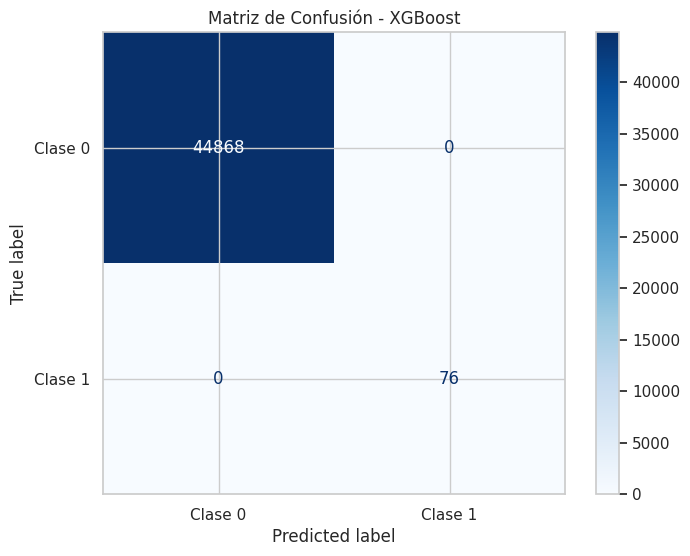

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# ============================
# Generar y Visualizar Matriz de Confusión
# ============================
print("\n📊 Visualizando la Matriz de Confusión...")

# Generar predicciones del modelo ganador
y_pred = modelo_ganador.predict(X_test)

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Clase 0", "Clase 1"])
disp.plot(cmap='Blues', ax=ax)
ax.set_title(f"Matriz de Confusión - {modelo_tipo}")
plt.show()


#### **Aplicación para probar el modelo con datos nuevos**<a name="aplicación-para-probar-el-modelo-con-datos-nuevos"></a>

Aplicación para probar el modelo con datos nuevos generados aleatoriamente.<br>

- Carga automáticamente el archivo .pkl más reciente encontrado en la carpeta. De esta manera, el modelo con fecha de última modificación más actualizada será seleccionado.

##### **Generar datos simulados en un archivo CSV**

Genera datos aleatorios consistentes con las características (features) de tu dataset original, como la variable Amount escalada y otras columnas que el modelo utiliza.


In [ ]:
# =======================================
# Generar datos simulados y exportar a CSV
# =======================================

from google.colab import files

# Configurar parámetros
n_muestras = 50  # Número de muestras aleatorias a generar
np.random.seed(42)  # Fijar la semilla para reproducibilidad

# Crear la estructura con las mismas columnas y orden del dataframe clean_data
columnas_originales = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
                       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                       'V26', 'V27', 'V28', 'Amount']  # Ajusta según clean_data

# Generar valores aleatorios para cada columna
data_simulada = pd.DataFrame({
    col: np.random.uniform(-5, 5, n_muestras) if col != 'Amount' else np.random.uniform(0, 2000, n_muestras)
    for col in columnas_originales
})

# =============================
# Guardar los datos simulados
# =============================
output_csv = "datos_nuevos_simulados.csv"
data_simulada.to_csv(output_csv, index=False)
print(f"✅ Archivo generado y guardado como '{output_csv}'")

# =============================
# Visualizar los datos
# =============================
print("\n📊 Primeras filas de los datos generados:")
display(data_simulada.head(5))

# =============================
# Descargar el archivo CSV
# =============================
files.download(output_csv)  # Descargar automáticamente el archivo generado en tu ordenador


V1         V2          V3          V4          V5          V6  \
0 -1.25459881 4.69584628 -4.68570814  4.08265886  1.42031646 -2.05551108   
1  4.50714306 2.75132823  1.36410411 -2.60438109 -4.15860035 -1.14902271   
2  2.31993942 4.39498942 -1.85644019 -3.55105128 -3.38371286  3.51136672   
3  0.98658484 3.94827350  0.08570691 -0.10547240  3.98554189 -1.83077995   
4 -3.43981360 0.97899979  4.07566474  4.85650454  1.06429060 -3.30507253   

           V7          V8          V9         V10         V11        V12  \
0 -4.48318279  0.03136259 -3.96876131  2.77146916  1.98161714 0.20163501   
1  0.31354632  3.56489841  4.02552907  0.58404250  0.36096366 3.52181500   
2  0.40635122  1.58693632  0.05252372 -0.75777991 -1.90472384 0.51906839   
3  1.37429901 -3.37065573  3.26457466  4.06354385  3.13795020 0.60937972   
4  2.26091334 -4.29431253 -1.79950399 -3.88802518  1.84731173 3.76653603   

          V13         V14         V15         V16         V17         V18  \
0 -3.31064937 -4.13079712  0.32589433 -3.83101959  2.07238634 -4.32923523   
1 -2.21409661  0.37106542 -4.48176463  4.39832124 -3.47460957  2.49960470   
2 -3.22989516  0.86841118 -1.63395722  1.27708053  0.76288360 -2.90094407   
3 -4.11297466  2.45439474 -3.65585323 -1.65094385  1.06715046  3.98054289   
4 -3.79364129 -0.68340454 -4.36625030 -3.60727927 -0.75869329 -2.94860360   

          V19         V20         V21        V22         V23        V24  \
0 -2.92113745  1.00516860 -3.14867071 3.74701673 -4.42157323 2.08362977   
1 -4.73467796  1.65036675  0.41900947 0.28937134  4.69102630 3.37013328   
2 -3.18564565 -3.24628721  3.72945836 4.39067699  3.83785885 1.97471462   
3  0.83041561  4.14411946  2.32224886 2.98783236  4.27752283 1.80140772   
4 -0.78575449 -0.81229475  3.06561148 4.97934111  4.94907823 1.18611378   

          V25         V26         V27         V28        Amount  
0  2.58263196  2.96537291 -4.68413855  3.67031496  334.08381580  
1 -4.75413084 -0.18477648  4.36212246  0.78675409  335.23843258  
2 -4.77876448 -3.82691811 -4.48028716 -0.61384581   73.34285387  
3 -1.76389781 -3.74814208  0.41296335  2.25257660 1472.80403013  
4 -0.11356810  1.85565287  2.09060519 -0.13331059 1327.60905524

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### **Predicción interactiva : Importar CSV y predecir nuevos datos**

Cargar el archivo CSV con datos nuevos generados en el paso anterior y generar predicciones usando tu modelo .pkl

- El archivo .CSV debe estar descargado en una carpeta de su ordenador, normalmente se genera directamente en la carpeta de Descargas.

In [ ]:
# ============================
# 1. Configurar Columnas Esperadas
# ============================
columnas_originales = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
                       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                       'V26', 'V27', 'V28', 'Amount']

# ============================
# 2. Subir el archivo CSV
# ============================
print("🔄 Suba su archivo CSV con los datos para predecir:")
uploaded = files.upload()

# ============================
# 3. Validar el archivo cargado y su estructura
# ============================
for filename in uploaded.keys():
    try:
        print(f"\n✅ Archivo cargado: {filename}")
        data_nueva = pd.read_csv(filename)

        # Validar si el archivo contiene todas las columnas esperadas
        columnas_faltantes = [col for col in columnas_originales if col not in data_nueva.columns]
        if columnas_faltantes:
            raise ValueError(f"❌ Faltan las siguientes columnas en el archivo: {columnas_faltantes}")

        # Reordenar las columnas para asegurar la consistencia
        data_nueva = data_nueva[columnas_originales]

        # Mostrar las primeras filas después de la validación
        print("\n📊 Primeras filas del archivo validado:")
        display(data_nueva.head(3))  # Mostrar 3 primeras líneas

        # ============================
        # 4. Cargar el modelo ganador
        # ============================
        try:
            modelos_pkl = [f for f in os.listdir() if f.endswith("_final.pkl")]
            if not modelos_pkl:  # Verificar si la lista está vacía
                raise FileNotFoundError("❌ No se encontró ningún archivo '_final.pkl' en el directorio.")

            modelo_pkl = modelos_pkl[0]  # Tomar el primer archivo encontrado
            print(f"\n🔍 Cargando el modelo: {modelo_pkl}")
            modelo_ganador = joblib.load(modelo_pkl)

        except FileNotFoundError as fnf_error:
            print(fnf_error)
            print("⚠️ Asegúrese de que el modelo esté guardado con el nombre correcto en el directorio.")
            raise

        # ============================
        # 5. Realizar predicciones
        # ============================
        print("\n🚀 Realizando predicciones con el modelo ganador...")
        predicciones = modelo_ganador.predict(data_nueva)

        # ============================
        # 6. Añadir predicciones al DataFrame
        # ============================
        data_nueva['Class'] = predicciones  # Añadir columna con predicciones

        # Mostrar resultados
        print("\n📈 Resultados de la predicción (con columna 'Class'):")
        display(data_nueva.head(3))  # Mostrar 3 primeras líneas

        # ============================
        # 7. Resumen de las predicciones
        # ============================
        num_fraude = (data_nueva['Class'] == 1).sum()
        num_no_fraude = (data_nueva['Class'] == 0).sum()

        print("\n🔍 Resumen de Predicciones:")
        print(f"🔸 Transacciones predichas como FRAUDE (1): {num_fraude}")
        print(f"🔸 Transacciones predichas como NO FRAUDE (0): {num_no_fraude}")

        # ============================
        # 8. Guardar y Descargar el archivo con predicciones
        # ============================
        output_filename = "predicciones_resultados.csv"
        data_nueva.to_csv(output_filename, index=False)
        print(f"\n✅ Archivo con predicciones guardado como '{output_filename}'")

        files.download(output_filename)  # Descargar archivo

    except Exception as e:
        print(f"❌ Error: {e}")


🔄 Suba su archivo CSV con los datos para predecir:


Saving datos_nuevos_simulados.csv to datos_nuevos_simulados (1).csv

✅ Archivo cargado: datos_nuevos_simulados (1).csv

📊 Primeras filas del archivo validado:


V1         V2          V3          V4          V5          V6  \
0 -1.25459881 4.69584628 -4.68570814  4.08265886  1.42031646 -2.05551108   
1  4.50714306 2.75132823  1.36410411 -2.60438109 -4.15860035 -1.14902271   
2  2.31993942 4.39498942 -1.85644019 -3.55105128 -3.38371286  3.51136672   

           V7         V8          V9         V10         V11        V12  \
0 -4.48318279 0.03136259 -3.96876131  2.77146916  1.98161714 0.20163501   
1  0.31354632 3.56489841  4.02552907  0.58404250  0.36096366 3.52181500   
2  0.40635122 1.58693632  0.05252372 -0.75777991 -1.90472384 0.51906839   

          V13         V14         V15         V16         V17         V18  \
0 -3.31064937 -4.13079712  0.32589433 -3.83101959  2.07238634 -4.32923523   
1 -2.21409661  0.37106542 -4.48176463  4.39832124 -3.47460957  2.49960470   
2 -3.22989516  0.86841118 -1.63395722  1.27708053  0.76288360 -2.90094407   

          V19         V20         V21        V22         V23        V24  \
0 -2.92113745  1.00516860 -3.14867071 3.74701673 -4.42157323 2.08362977   
1 -4.73467796  1.65036675  0.41900947 0.28937134  4.69102630 3.37013328   
2 -3.18564565 -3.24628721  3.72945836 4.39067699  3.83785885 1.97471462   

          V25         V26         V27         V28       Amount  
0  2.58263196  2.96537291 -4.68413855  3.67031496 334.08381580  
1 -4.75413084 -0.18477648  4.36212246  0.78675409 335.23843258  
2 -4.77876448 -3.82691811 -4.48028716 -0.61384581  73.34285387


🔍 Cargando el modelo: xgboost_final.pkl

🚀 Realizando predicciones con el modelo ganador...

📈 Resultados de la predicción (con columna 'Class'):


V1         V2          V3          V4          V5          V6  \
0 -1.25459881 4.69584628 -4.68570814  4.08265886  1.42031646 -2.05551108   
1  4.50714306 2.75132823  1.36410411 -2.60438109 -4.15860035 -1.14902271   
2  2.31993942 4.39498942 -1.85644019 -3.55105128 -3.38371286  3.51136672   

           V7         V8          V9         V10         V11        V12  \
0 -4.48318279 0.03136259 -3.96876131  2.77146916  1.98161714 0.20163501   
1  0.31354632 3.56489841  4.02552907  0.58404250  0.36096366 3.52181500   
2  0.40635122 1.58693632  0.05252372 -0.75777991 -1.90472384 0.51906839   

          V13         V14         V15         V16         V17         V18  \
0 -3.31064937 -4.13079712  0.32589433 -3.83101959  2.07238634 -4.32923523   
1 -2.21409661  0.37106542 -4.48176463  4.39832124 -3.47460957  2.49960470   
2 -3.22989516  0.86841118 -1.63395722  1.27708053  0.76288360 -2.90094407   

          V19         V20         V21        V22         V23        V24  \
0 -2.92113745  1.00516860 -3.14867071 3.74701673 -4.42157323 2.08362977   
1 -4.73467796  1.65036675  0.41900947 0.28937134  4.69102630 3.37013328   
2 -3.18564565 -3.24628721  3.72945836 4.39067699  3.83785885 1.97471462   

          V25         V26         V27         V28       Amount  Class  
0  2.58263196  2.96537291 -4.68413855  3.67031496 334.08381580      1  
1 -4.75413084 -0.18477648  4.36212246  0.78675409 335.23843258      0  
2 -4.77876448 -3.82691811 -4.48028716 -0.61384581  73.34285387      0


🔍 Resumen de Predicciones:
🔸 Transacciones predichas como FRAUDE (1): 31
🔸 Transacciones predichas como NO FRAUDE (0): 19

✅ Archivo con predicciones guardado como 'predicciones_resultados.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### **Visualizaciones**

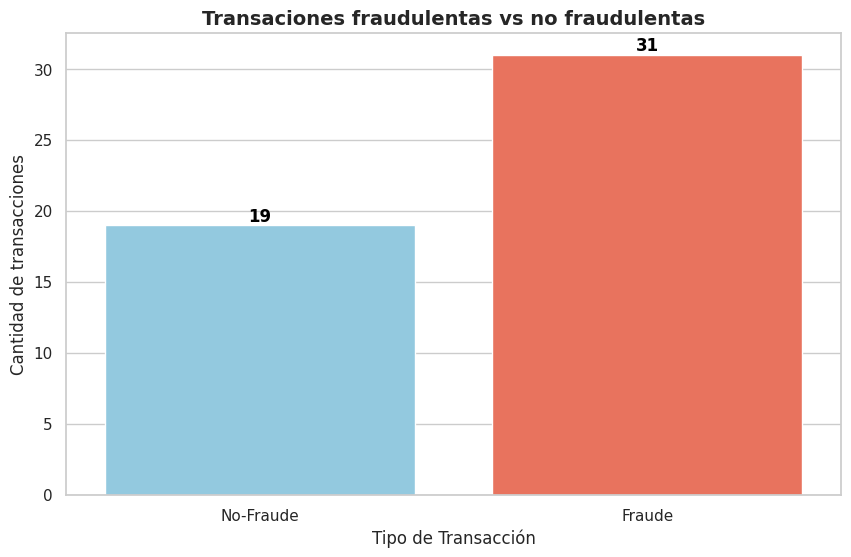

In [ ]:
# Muestra la distribución de las transacciones fraudulentas con respecto de las
# no fraudulentas

#colors = ["blue", "red"]
colors = ["#87CEEB", "#FF6347"]

# Configurar la visualización en una fila
fig, axes = plt.subplots(1, figsize=(10, 6))

# Función para agregar etiquetas dentro de las barras
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2,
                                               p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black',
                    weight='bold')

# Cuenta las veces que ocurre cada clase (0: no fraude, 1: fraude)
ax1 = sns.countplot(x='Class', data=data_nueva, palette=colors)
ax1.set_title('Transaciones fraudulentas vs no fraudulentas', fontsize=14,
              fontweight='bold')

ax1.set_xlabel("Tipo de Transacción")
ax1.set_ylabel("Cantidad de transacciones")
add_labels(ax1)

plt.xticks([0, 1], ['No-Fraude', 'Fraude'])
plt.show()

## **Conclusiones**<a name="conclusiones"></a>

### 📊 Conclusiones del Análisis de Modelos

**Objetivo del Proyecto:**<a name="objetivo-del-proyecto"></a> Detectar transacciones fraudulentas en un conjunto de datos desbalanceado mediante modelos de Machine Learning y técnicas avanzadas de optimización.

---

### 🔎 Estrategias Aplicadas en el Proyecto

Se implementaron técnicas específicas para abordar los **desafíos del desbalance** y maximizar el rendimiento de los modelos **XGBoost** y **CatBoost**.

1. **Tratamiento del Desbalance de Datos: SMOTE**  
   - El dataset original presentaba un **desbalance significativo**, con muy pocos registros de fraude en comparación con transacciones no fraudulentas.  
   - **SMOTE (Synthetic Minority Over-sampling Technique):**  
     - Aplicado exclusivamente al **conjunto de entrenamiento** para generar ejemplos sintéticos de la clase minoritaria (fraude).  
     - Esto permitió al modelo aprender patrones más robustos de la clase minoritaria sin eliminar información, como ocurriría con **undersampling**.  
   - **Razón para no usar el dataset original:**  
     Entrenar sin ninguna técnica de balanceo habría sesgado el modelo hacia la clase mayoritaria, resultando en un Recall bajo para los fraudes.

2. **Validación Cruzada (Stratified K-Fold):**  
   - Se aplicó una división en **5 pliegues** para evaluar de manera robusta el rendimiento de los modelos, asegurando que la distribución de clases fuera equilibrada en cada pliegue.  
   - Esta técnica ayudó a evitar que los resultados dependieran de una única división del dataset, obteniendo métricas **más generalizables**.

3. **Optimización de Hiperparámetros:**  
   - Se utilizaron dos técnicas avanzadas para afinar los hiperparámetros:  
     - **GridSearchCV:** Exploró combinaciones predefinidas de hiperparámetros de manera exhaustiva.  
     - **Optuna:** Automatizó la búsqueda mediante una optimización bayesiana eficiente, reduciendo tiempos de cómputo.  

---

### 🛠️ Desafíos Abordados
1. **Desbalance del Dataset:** Resuelto mediante **SMOTE** aplicado al conjunto de entrenamiento.  
2. **Validación Generalizada:** Garantizada mediante **Validación Cruzada**.  
3. **Ajuste de Hiperparámetros:** Optimizados mediante **GridSearchCV** y **Optuna**.  
4. **Comparación de Algoritmos:** Evaluación de **XGBoost** y **CatBoost** en métricas clave (Recall, Precision, AUPRC).

---

### ⚠️ Consideraciones sobre la Métrica Accuracy  
Aunque la **Accuracy** del modelo ganador fue del **99.62%**, esta métrica no es adecuada en datasets desbalanceados, como es el caso de fraudes.  
- Un modelo que predijera todo como "No Fraude" tendría una Accuracy alta, pero su capacidad de identificar fraudes sería **nula**.  
- Por esta razón, se priorizaron **Recall** y **AUPRC**, métricas que son más relevantes para evaluar el rendimiento en la clase minoritaria (fraude).

---

### 🚀 Próximos Pasos y Mejoras Futuras
Debido a **limitaciones de tiempo**, no se implementaron algunas estrategias adicionales que podrían mejorar aún más el rendimiento del modelo:
  
1. **Feature Engineering Avanzado:** Crear características nuevas y más informativas que ayuden a detectar patrones complejos.  
2. **Optimización del Umbral de Clasificación:** Ajustar el umbral de decisión para equilibrar Recall y Precision.  
3. **Despliegue del Modelo:** Implementar el modelo en producción y realizar pruebas con datos en tiempo real.  


## Generar informe dinámico en formato PDF del modelo ganador
Este código crea un informe dinámico en formato PDF con contenido basado en tus datos y resultados.

In [ ]:
%%capture output
import pandas as pd
from weasyprint import HTML
from datetime import datetime
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# 1. Extraer Datos Dinámicos
# =============================
# Supongamos que resultados_maestro es tu DataFrame final
best_model = resultados_maestro.loc[resultados_maestro["AUPRC_Test"].idxmax()]

# Extraer valores del modelo ganador
best_model_name = best_model["Modelo"]
best_technique = best_model["Tecnica"]
recall = best_model["Recall_Test"]
precision = best_model["Precision_Test"]
auprc = best_model["AUPRC_Test"]
f1_score = best_model["F1-Score_Test"]
accuracy = best_model["Accuracy_Test"]

# =============================
# 2. Generar Gráficos
# =============================
# Gráfico de comparación de modelos
plt.figure(figsize=(10, 6))
sns.barplot(x=resultados_maestro["Modelo"], y=resultados_maestro["AUPRC_Test"], palette="viridis")
plt.title("Comparación de Modelos: AUPRC")
plt.ylabel("AUPRC (%)")
plt.xlabel("Modelo")
plt.tight_layout()
plt.savefig("comparacion_modelos.png")  # Guardar gráfico
plt.close()

# =============================
# 3. Crear el Contenido del Informe
# =============================
html_content = f"""
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <title>Informe Final - Proyecto de Detección de Fraude</title>
    <style>
        body {{ font-family: Arial, sans-serif; margin: 20px; }}
        h1, h2 {{ color: #2E4053; }}
        table {{ border-collapse: collapse; width: 100%; }}
        th, td {{ border: 1px solid #ddd; padding: 8px; text-align: center; }}
        th {{ background-color: #4CAF50; color: white; }}
        img {{ display: block; margin: 20px auto; max-width: 80%; }}
        ul {{ margin: 10px; }}
        li {{ margin: 5px 0; }}
    </style>
</head>
<body>
    <h1>Informe Final - Proyecto de Detección de Fraude</h1>
    <p>Fecha de Generación: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}</p>

    <h2>🏆 Modelo Ganador: {best_model_name} ({best_technique})</h2>
    <table>
        <tr>
            <th>Métrica</th><th>Valor</th>
        </tr>
        <tr><td>Recall</td><td>{recall:.2f}%</td></tr>
        <tr><td>Precision</td><td>{precision:.2f}%</td></tr>
        <tr><td>AUPRC</td><td>{auprc:.2f}%</td></tr>
        <tr><td>F1-Score</td><td>{f1_score:.2f}%</td></tr>
        <tr><td>Accuracy</td><td>{accuracy:.2f}%</td></tr>
    </table>

    <h2>Comparación de Modelos</h2>
    <img src="comparacion_modelos.png" alt="Comparación de Modelos">

    <h2>Conclusión</h2>
    <p>
        El modelo <strong>{best_model_name}</strong> optimizado mediante
        <strong>{best_technique}</strong> es el más adecuado para la detección de fraudes
        debido a su equilibrio en las métricas clave.
    </p>

    <h2>Próximos Pasos</h2>
    <ul>
        <li>Optimización del umbral de clasificación.</li>
        <li>Despliegue del modelo en producción.</li>
        <li>Monitoreo continuo del rendimiento del modelo.</li>
    </ul>
</body>
</html>
"""

# =============================
# 4. Guardar el HTML y Convertirlo a PDF
# =============================
# Guardar el contenido en un archivo HTML
html_filename = "informe_final.html"
with open(html_filename, "w", encoding="utf-8") as f:
    f.write(html_content)

# Convertir el HTML a PDF
pdf_filename = "informe_final.pdf"
HTML(html_filename).write_pdf(pdf_filename)

# Mensaje de confirmación
print(f"✅ Informe PDF generado exitosamente: {pdf_filename}")

from google.colab import files
# Descargar automáticamente el archivo PDF
files.download(pdf_filename)


## **Exportar cuaderno a formato HTML y a formato PDF**<a name="exportar-cuaderno-a-formato-html-y-a-formato-pdf"></a>

### **Descarga el archivo generado directamente desde Colab**

In [18]:
import json
import shutil
from google.colab import files

# Función para limpiar y validar el notebook
def fix_notebook_metadata(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        notebook = json.load(file)

    for cell in notebook.get('cells', []):
        if 'outputs' in cell:
            for output in cell['outputs']:
                # Agregar 'metadata' si no existe
                if 'metadata' not in output:
                    output['metadata'] = {}

    # Guardar el notebook limpio
    with open(filepath, 'w', encoding='utf-8') as file:
        json.dump(notebook, file, indent=2, ensure_ascii=False)

# Rutas de archivos
notebook_path = "/content/drive/MyDrive/Colab Notebooks/Proyecto_Final_DeteccionFraudeTarjetaCredito_ErikaSamaraAlvaresAngelim.ipynb"
html_output_path = "/content/drive/MyDrive/Colab Notebooks/Proyecto_Final_DeteccionFraudeTarjetaCredito_ErikaSamaraAlvaresAngelim.html"
pdf_output_path_viahtml = "/content/drive/MyDrive/Colab Notebooks/Proyecto_Final_DeteccionFraudeTarjetaCredito_ErikaSamaraAlvaresAngelim-pdfviahtml.pdf"

# Corregir el notebook
print("\nCorrigiendo y validando el notebook...")
fix_notebook_metadata(notebook_path)

# Exportar a HTML
print("\nExportando a formato HTML...")
!jupyter nbconvert --to html --output "$html_output_path" "$notebook_path"

# Exportar a PDF usando PDFviaHTML
print("\nExportando a formato PDF usando nbconvert con PDFviaHTML...")
!jupyter nbconvert --to pdfviahtml --output "$pdf_output_path_viahtml" "$notebook_path"

# Descargar archivos generados
print("\nDescargando los archivos generados...")
try:
    files.download(html_output_path)  # Descargar HTML
    files.download(pdf_output_path_viahtml)  # Descargar PDF generado con PDFviaHTML
except Exception as e:
    print(f"Error descargando los archivos: {e}")

print("\nExportación y descarga completadas.")



Corrigiendo y validando el notebook...

Exportando a formato HTML...
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Proyecto_Final_DeteccionFraudeTarjetaCredito_ErikaSamaraAlvaresAngelim.ipynb to html
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('metadata' was unexpected)

Failed validating 'additionalProperties' in stream:

On instance['cells'][16]['outputs'][0]:
{'metadata': {},
 'name': 'stdout',
 'output_type': 'stream',
 'text': 'xgboost ya está instalado, versión:         2.1.3\n'
         'catboost no es...'}
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 7076013 bytes to /content/drive/MyDrive/Colab Notebooks/Proyecto_Final_DeteccionFraudeTarjetaCredito_ErikaSamaraAlvaresAngelim.html

Exportando a formato PDF usando nbconvert con PDFviaHTML...
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Proyecto_Final_DeteccionFraudeTarjetaCredito_Eri

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Exportación y descarga completadas.


In [16]:
# Rutas del archivo del cuaderno y salidas generadas
notebook_path = \
      "/content/drive/MyDrive/Colab Notebooks/Proyecto_Final_DeteccionFraudeTarjetaCredito_ErikaSamaraAlvaresAngelim.ipynb"

html_output_path = \
      "/content/drive/MyDrive/Colab Notebooks/Proyecto_Final_DeteccionFraudeTarjetaCredito_ErikaSamaraAlvaresAngelim.html"

pdf_output_path_viahtml = \
      "/content/drive/MyDrive/Colab Notebooks/Proyecto_Final_DeteccionFraudeTarjetaCredito_ErikaSamaraAlvaresAngelim-pdfviahtml.pdf"
#pdf_output_path_pandoc = \
#      "/content/drive/MyDrive/Colab Notebooks/Proyecto_Final_DeteccionFraudeTarjetaCredito_ErikaSamaraAlvaresAngelim-pandoc.pdf"

# Exportar el cuaderno a formatos HTML y PDF
print("\nExportando a formato HTML...")
!jupyter nbconvert --to html "$notebook_path" --output "$html_output_path"

print("\nExportando a formato PDF usando nbconvert con PDFviaHTML...")
!jupyter nbconvert --to pdfviahtml "$notebook_path" \
                    --output "$pdf_output_path_viahtml"

#print("\nExportando a formato PDF usando Pandoc...")
#!jupyter nbconvert --to pdf "$notebook_path" --output "$pdf_output_path_pandoc"

# Descargar los archivos generados
print("\nDescargando los archivos generados...")
try:
    files.download(html_output_path)  # Descargar HTML
    files.download(pdf_output_path_viahtml)  # Descargar PDF generado con PDFviaHTML
#    files.download(pdf_output_path_pandoc)  # Descargar PDF generado con Pandoc
except Exception as e:
    print(f"Error descargando los archivos: {e}")

print("\nExportación y descarga completadas.")


Exportando a formato HTML...
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Proyecto_Final_DeteccionFraudeTarjetaCredito_ErikaSamaraAlvaresAngelim.ipynb to html
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('metadata' was unexpected)

Failed validating 'additionalProperties' in stream:

On instance['cells'][163]['outputs'][0]:
{'metadata': {'tags': None},
 'name': 'stderr',
 'output_type': 'stream',
 'text': '[I 2024-12-19 13:22:34,041] A new study created in memory with '
         'n...'}
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 7095636 bytes to /content/drive/MyDrive/Colab Notebooks/Proyecto_Final_DeteccionFraudeTarjetaCredito_ErikaSamaraAlvaresAngelim.html

Exportando a formato PDF usando nbconvert con PDFviaHTML...
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Proyecto_Final_DeteccionFraudeTarjetaCredito_ErikaSamaraAlvaresAngelim.ipynb

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Exportación y descarga completadas.
